# The modelling error is:
$$\delta e_{sys} = (e-e_{PSF}) \left( \frac{T_{PSF}}{T_{gal}} \right) \frac{\delta T_{PSF}}{T_{PSF}} - \left( \frac{T_{PSF}}{T_{gal}} \right)\delta e_{PSF}$$


## Propagate into shear errors:
$\rho$ statistics:

$$\rho_1 = \left\langle \delta e_{PSF}^*(x) \; \delta e_{PSF} (x+\theta) \right\rangle$$

$$\rho_2 = \left\langle e_{PSF}^* (x) \; \delta e_{PSF} (x+\theta) \right\rangle $$
$$\rho_3 = \left\langle \left( e_{PSF}^*   \frac{\delta T_{PSF}}{T_{PSF}}\right)(x) \; \left(e_{PSF}   \frac{\delta T_{PSF}}{T_{PSF}}\right)(x+\theta)\right\rangle $$
$$\rho_4 = \left\langle \delta e_{PSF}^* (x)\;\left( e_{PSF} \frac{\delta T_{PSF}}{T_{PSF}}\right)(x+\theta)\right\rangle $$
$$\rho_5 = \left\langle e_{PSF}^* (x)\; \left(e_{PSF} \frac{\delta T_{PSF}}{T_{PSF}}\right)(x+\theta) \right\rangle $$

Then

$$\delta \xi_+ (\theta) = 2 \left\langle \frac{T_{PSF}}{T_{gal}} \frac{\delta T_{PSF}}{T_{PSF}} \right\rangle \xi_+(\theta)
 + \left\langle \frac{T_{PSF}}{T_{gal}} \right\rangle^2 \rho_1(\theta)
 - \alpha\left\langle\frac{T_{PSF}}{T_{gal}}\right\rangle \rho_2(\theta) 
 + \left\langle \frac{T_{PSF}}{T_{gal}} \right\rangle^2 \rho_3(\theta)
 + \left\langle \frac{T_{PSF}}{T_{gal}} \right\rangle^2 \rho_4(\theta)
 - \alpha\left\langle\frac{T_{PSF}}{T_{gal}}\right\rangle \rho_5(\theta) 
$$

## Dither pattern we're using:

In [ ]:
import seaborn as sns; sns.set_style('darkgrid')
sns.set_context('talk')

In [64]:
myBundles = {}
nside = 128
runName = 'minion_1012'
metric = metrics.CountMetric('expMJD')
slicer0 = slicers.HealpixSlicer(lonCol='fieldRA', latCol='fieldDec', nside=nside)  
sqlconstraint = 'filter="r"'
stackerList = [stackers.SpiralDitherFieldPerNightStacker(nCoils=7)]
slicer3 = slicers.HealpixSlicer(lonCol='spiralDitherFieldPerNightRa', latCol='spiralDitherFieldPerNightDec', nside=nside)
myBundles['spiral dither'] = metricBundles.MetricBundle(metric, slicer3, sqlconstraint, 
                                                       stackerList=stackerList, runName=runName,
                                                       metadata='spiral dither')

opsdb = db.OpsimDatabase('/Users/myhome/Downloads/minion_1016_sqlite.db')
outDir = 'dither_test'
resultsDb = db.ResultsDb(outDir=outDir)
bgroup = metricBundles.MetricBundleGroup(myBundles, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()  

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r"
Found 538713 visits
Running:  ['spiral dither']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [145]:
!open .

In [73]:
slicer2 = slicers.HealpixSlicer(lonCol='randomDitherFieldPerVisitRa', latCol='randomDitherFieldPerVisitDec', nside=nside)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [74]:
myBundles['random dither'] = metricBundles.MetricBundle(metric, slicer2, sqlconstraint, runName=runName,
                                                       metadata='random dither')


In [78]:
runName = '/Users/myhome/Downloads/minion_1012'
opsdb = db.OpsimDatabase(runName + '_sqlite.db')
outDir = 'dither_test'
resultsDb = db.ResultsDb(outDir=outDir)
bgroup = metricBundles.MetricBundleGroup(myBundles, opsdb, outDir=outDir, resultsDb=resultsDb)


In [81]:
bgroup.runAll()

Querying database with constraint filter="r"
Found 530627 visits
Running:  ['spiral dither']
Completed metric generation.
Running:  ['random dither']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [199]:
del bgroup

In [205]:
slicers.HealpixSlicer??

In [200]:

slicer = slicers.HealpixSlicer(nside=64, lonCol='randomDitherFieldPerNightRa', latCol='randomDitherFieldPerNightDec')
sqlconstraint = 'filter="r" and night<3000'
metric = metrics.CountMetric(col='night')
stackerList = [stackers.RandomDitherFieldPerNightStacker()]


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [201]:
bundle = metricBundles.MetricBundle(metric, slicer, sqlconstraint, runName=runName, 
                                    stackerList=stackerList)
bgroup = metricBundles.MetricBundleGroup({'dither':bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)

In [202]:
bgroup.runAll()

Querying database with constraint filter="r" and night<3000
Found 444146 visits
Running:  ['dither']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


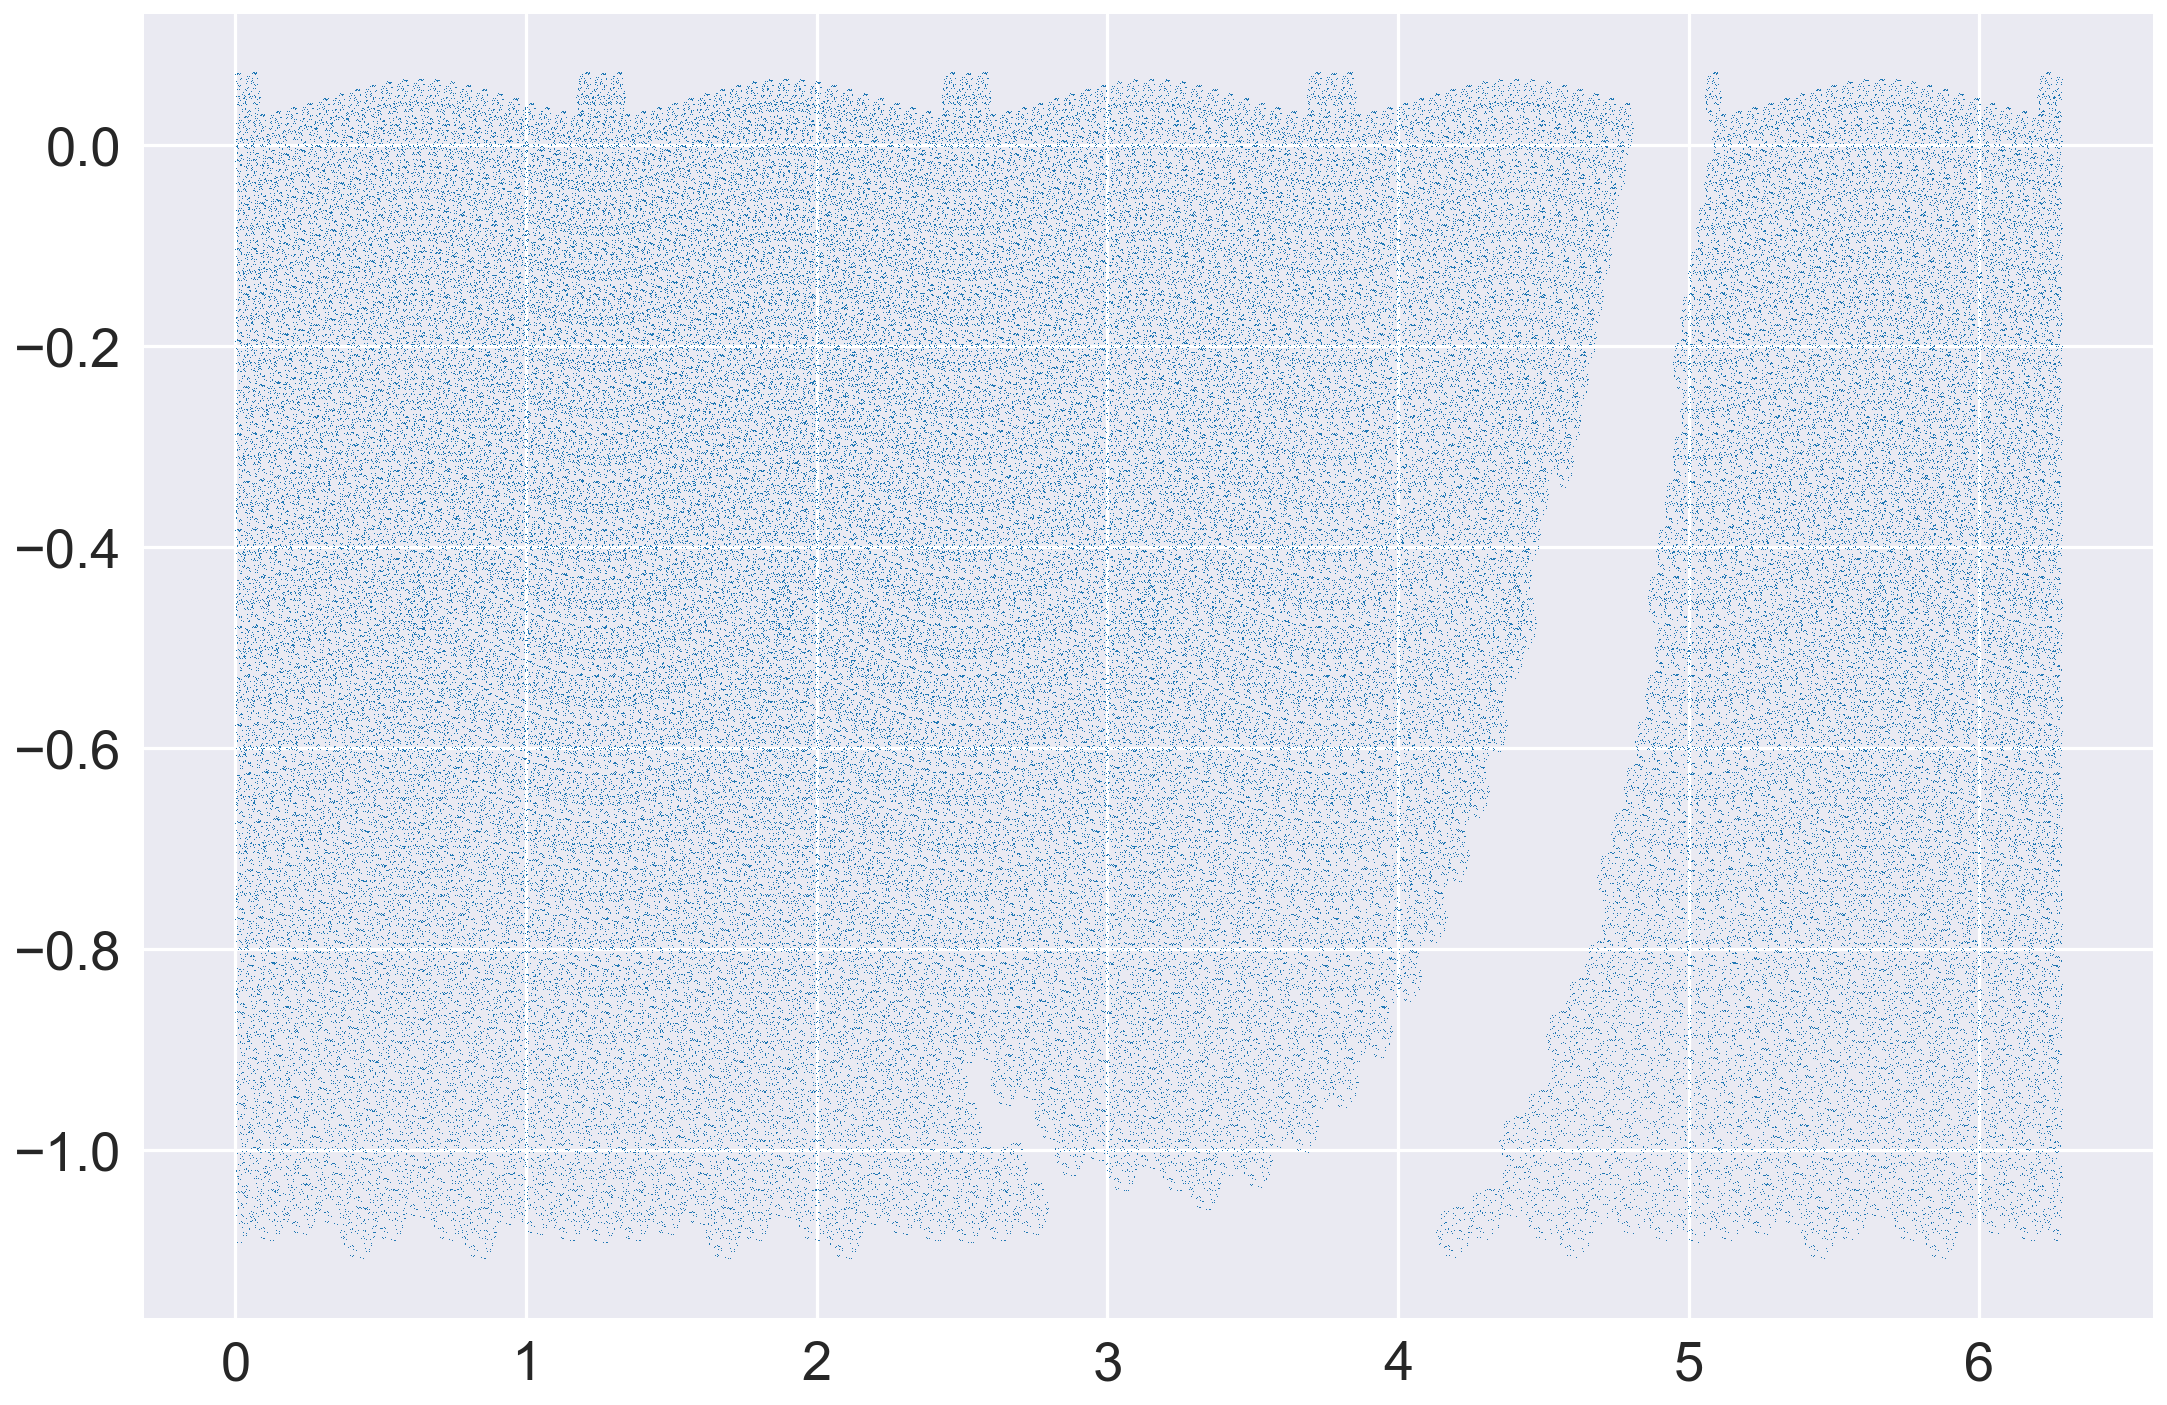

In [203]:
plt.plot(bgroup.simData['randomDitherFieldPerNightRa'],bgroup.simData['randomDitherFieldPerNightDec'],',')

In [188]:
bgroup.plotCurrent??

In [116]:
ra = [bgroup.simData[i][3] for i in range(216008)]

In [117]:
dec = [bgroup.simData[i][5] for i in range(216008)]

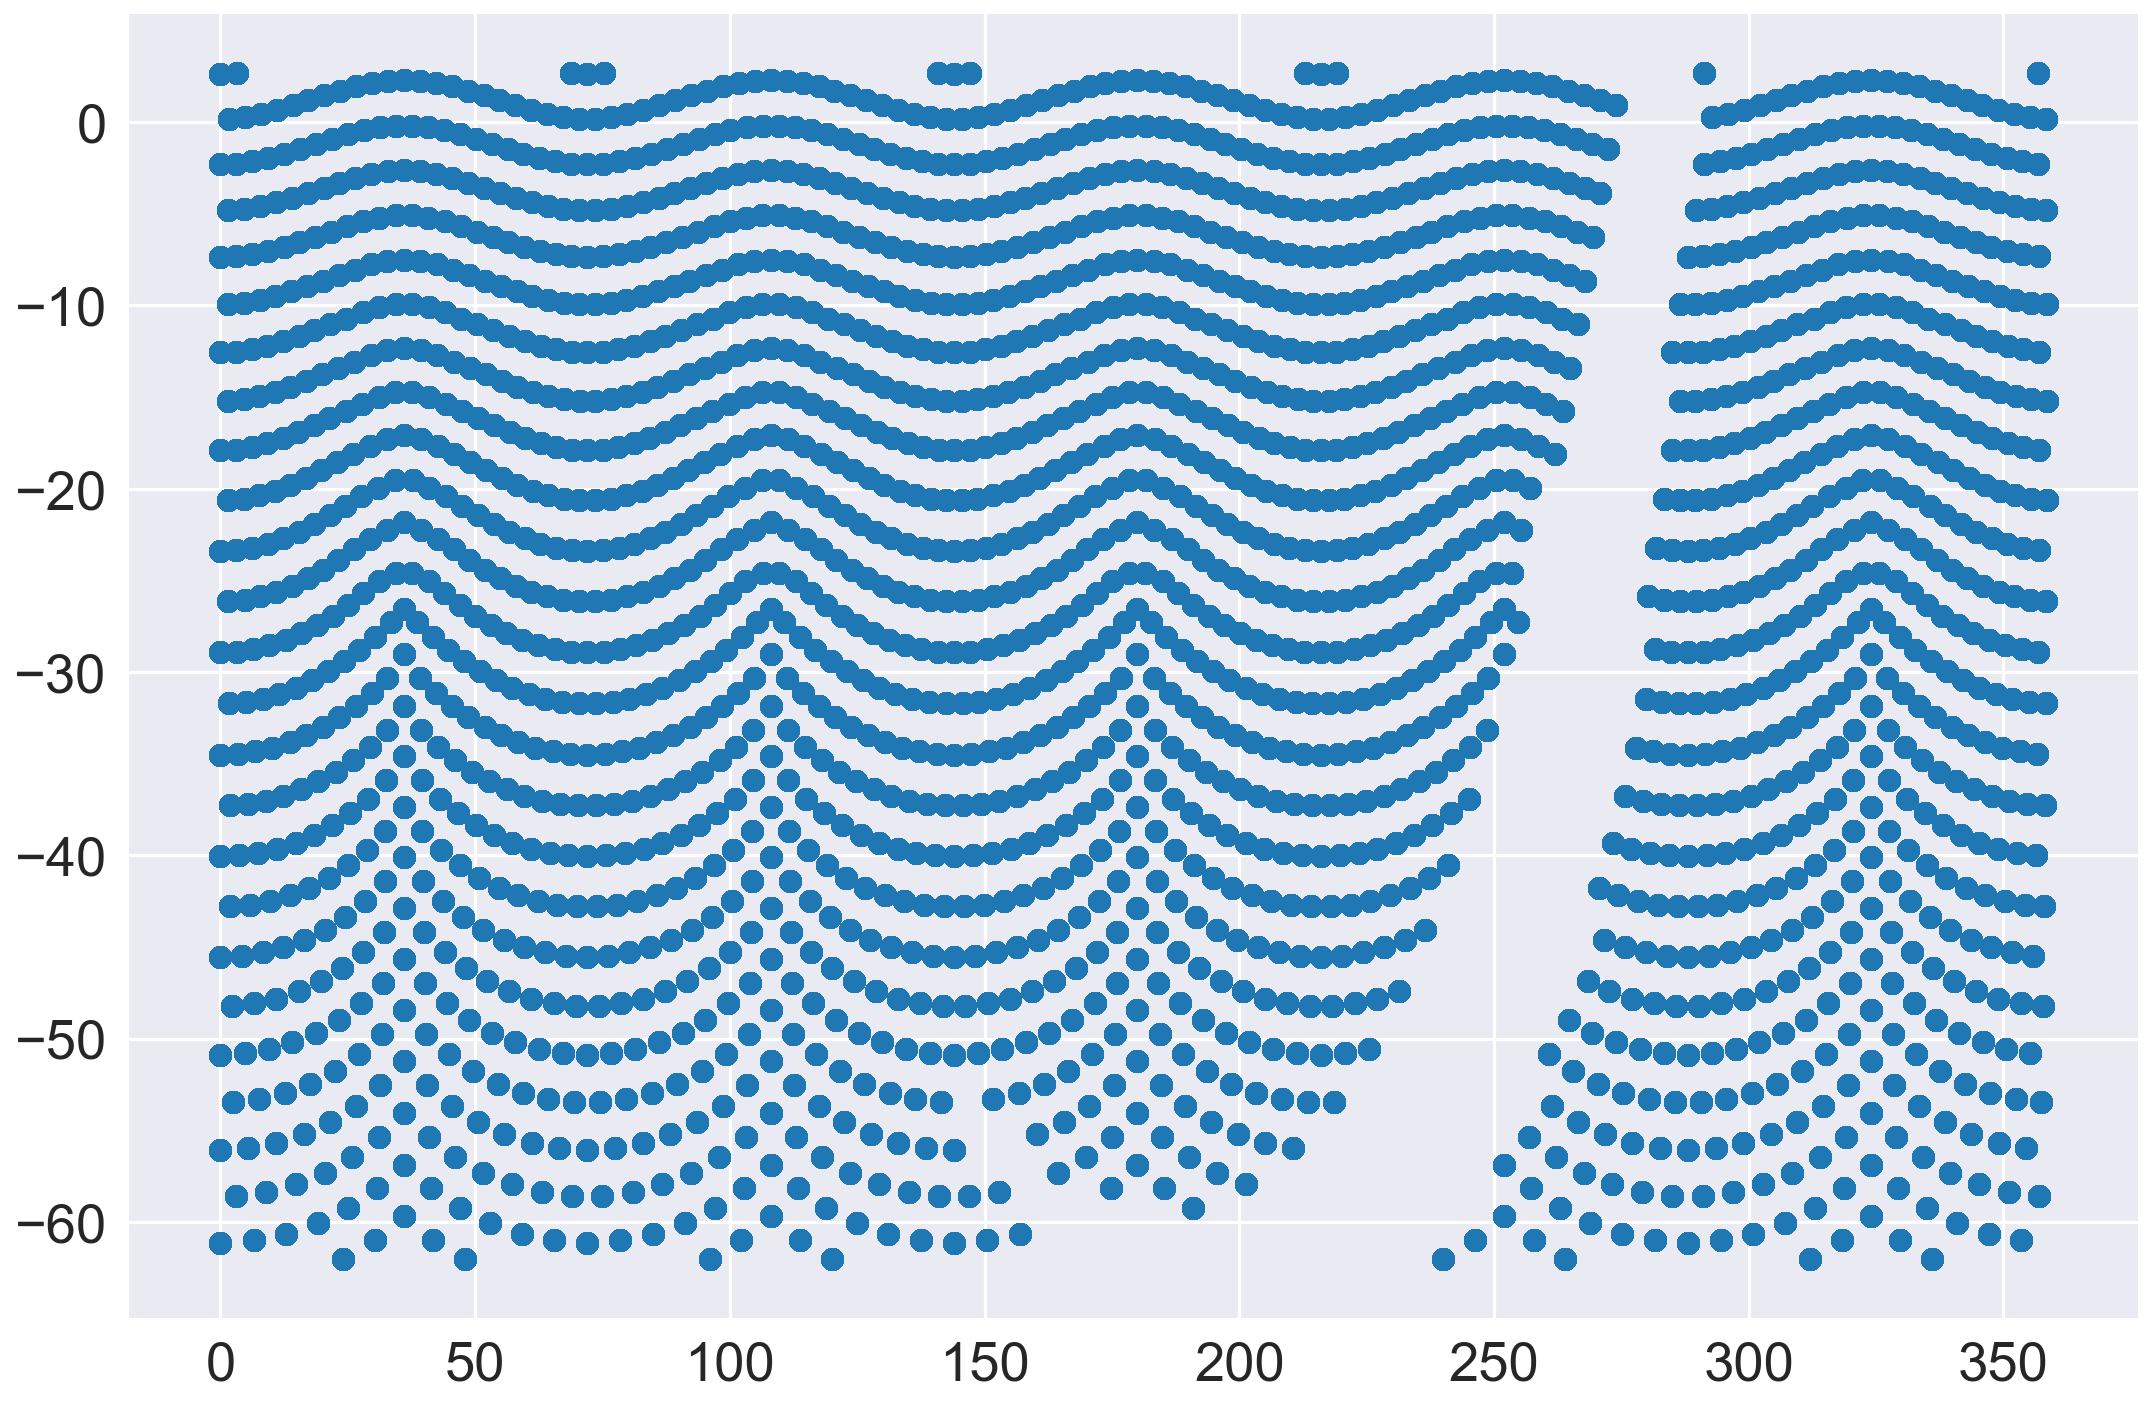

In [118]:
plt.plot(np.array(dec)*180/np.pi,np.array(ra)*180/np.pi,'o')

In [66]:
!open .

In [136]:
bundle1 = myBundles['random dither']

In [142]:
len(ra)

196608

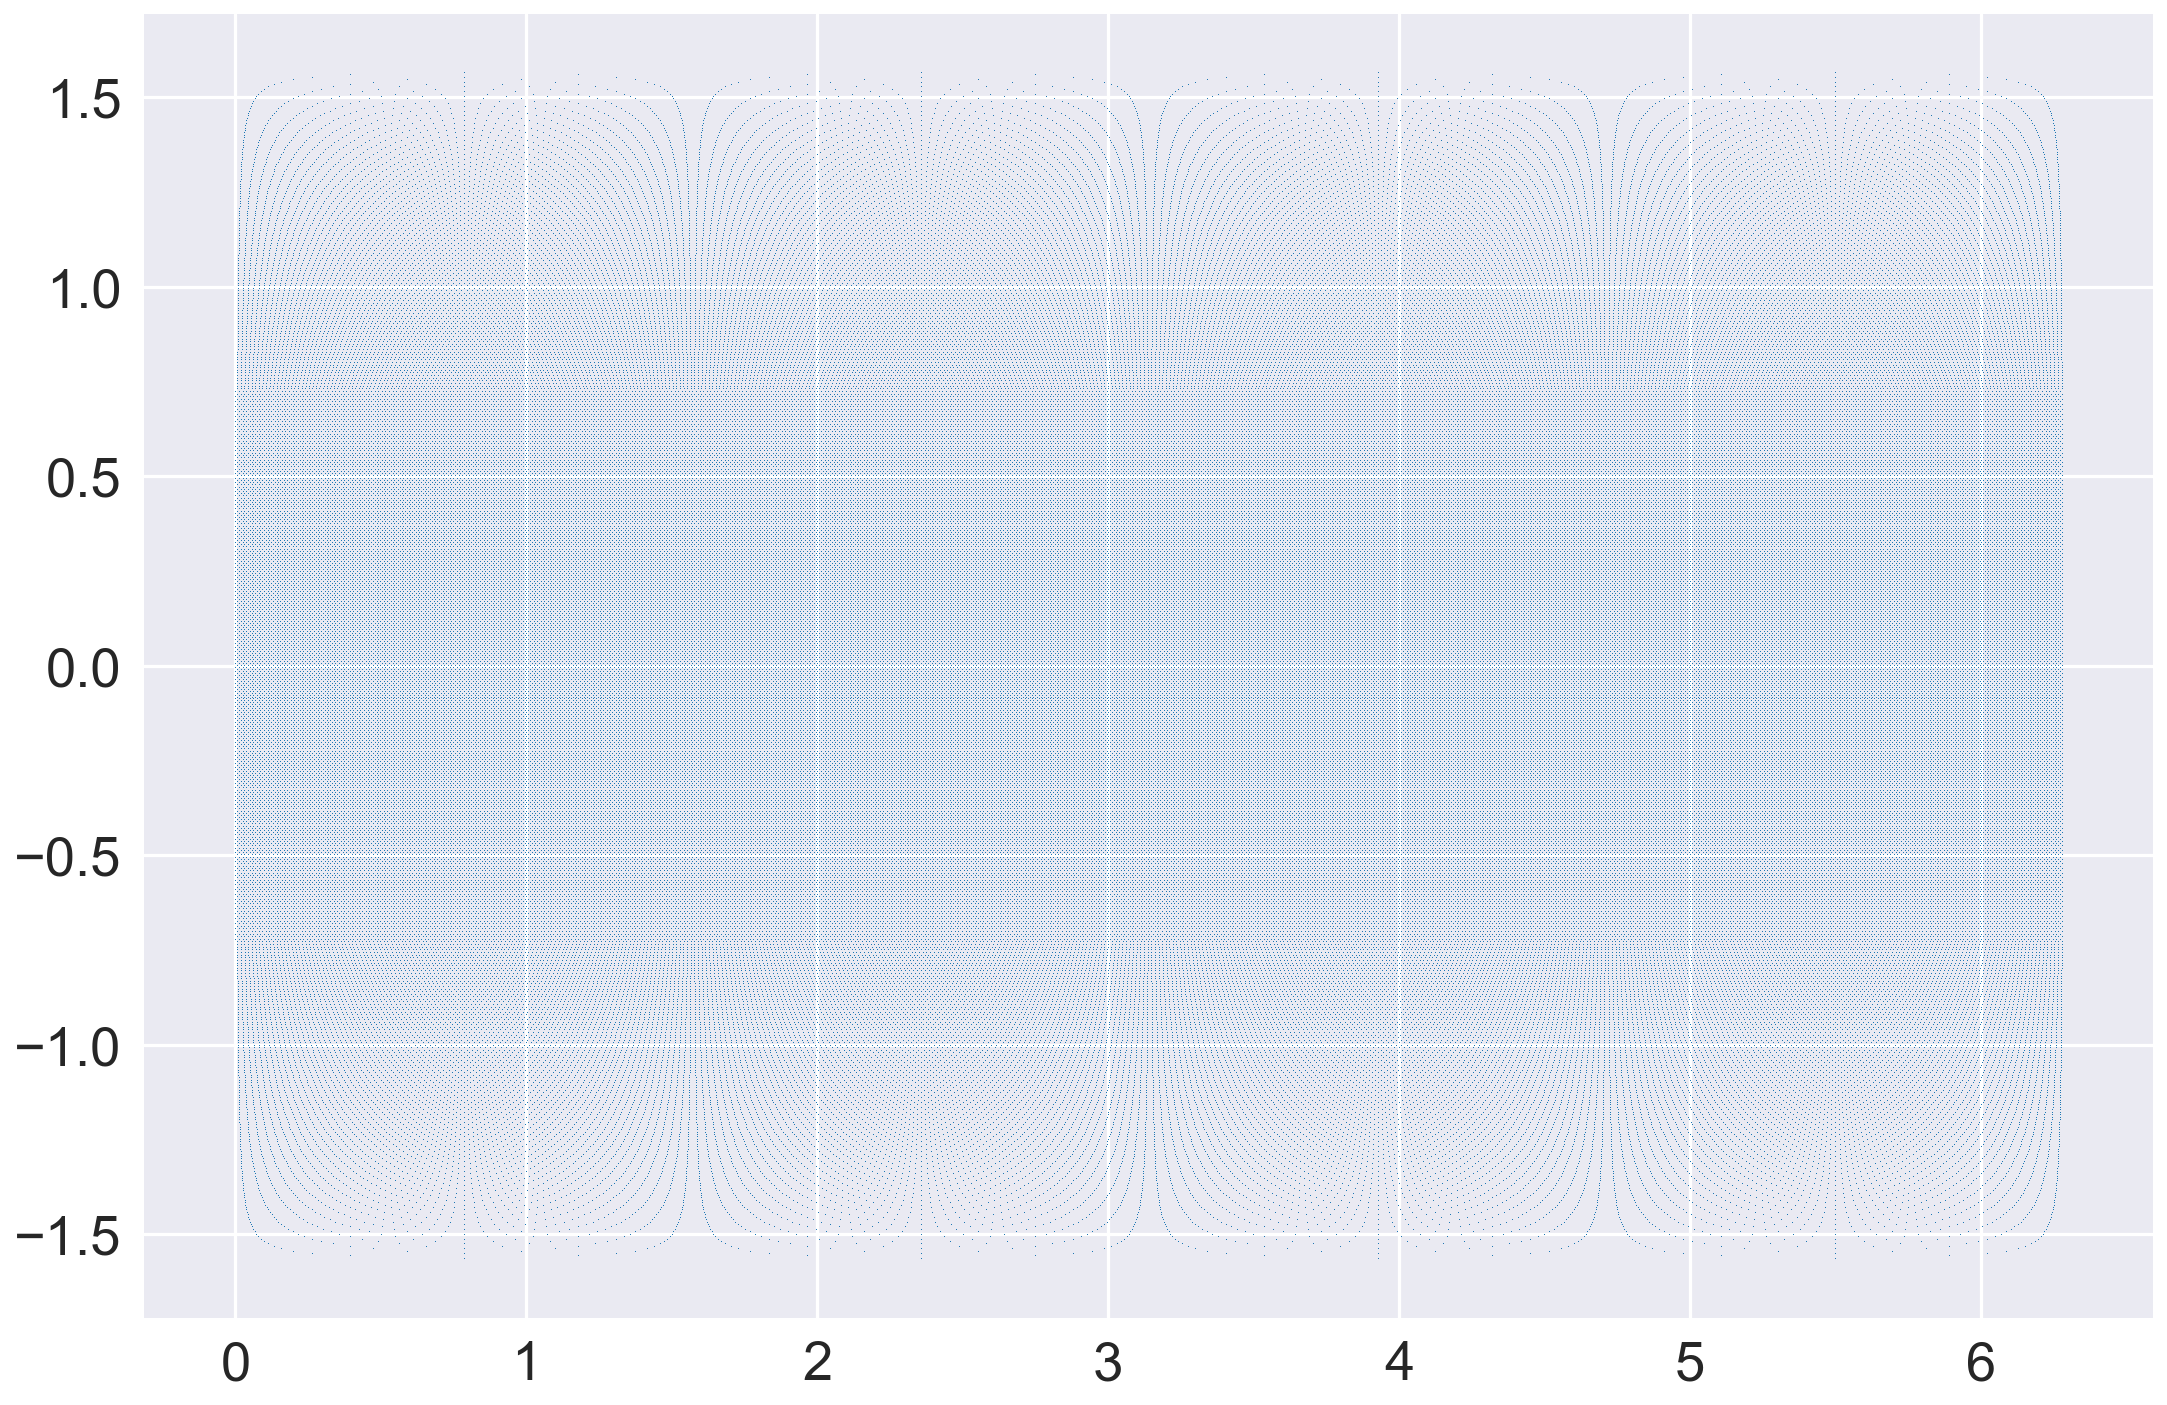

In [144]:
dec = bundle1.slicer.slicePoints['dec']
ra = bundle1.slicer.slicePoints['ra']
plt.plot(ra,dec,',')

In [161]:
print bgroup.getData(constraint='')

Querying database with no constraint.
Found 2421933 visits
None


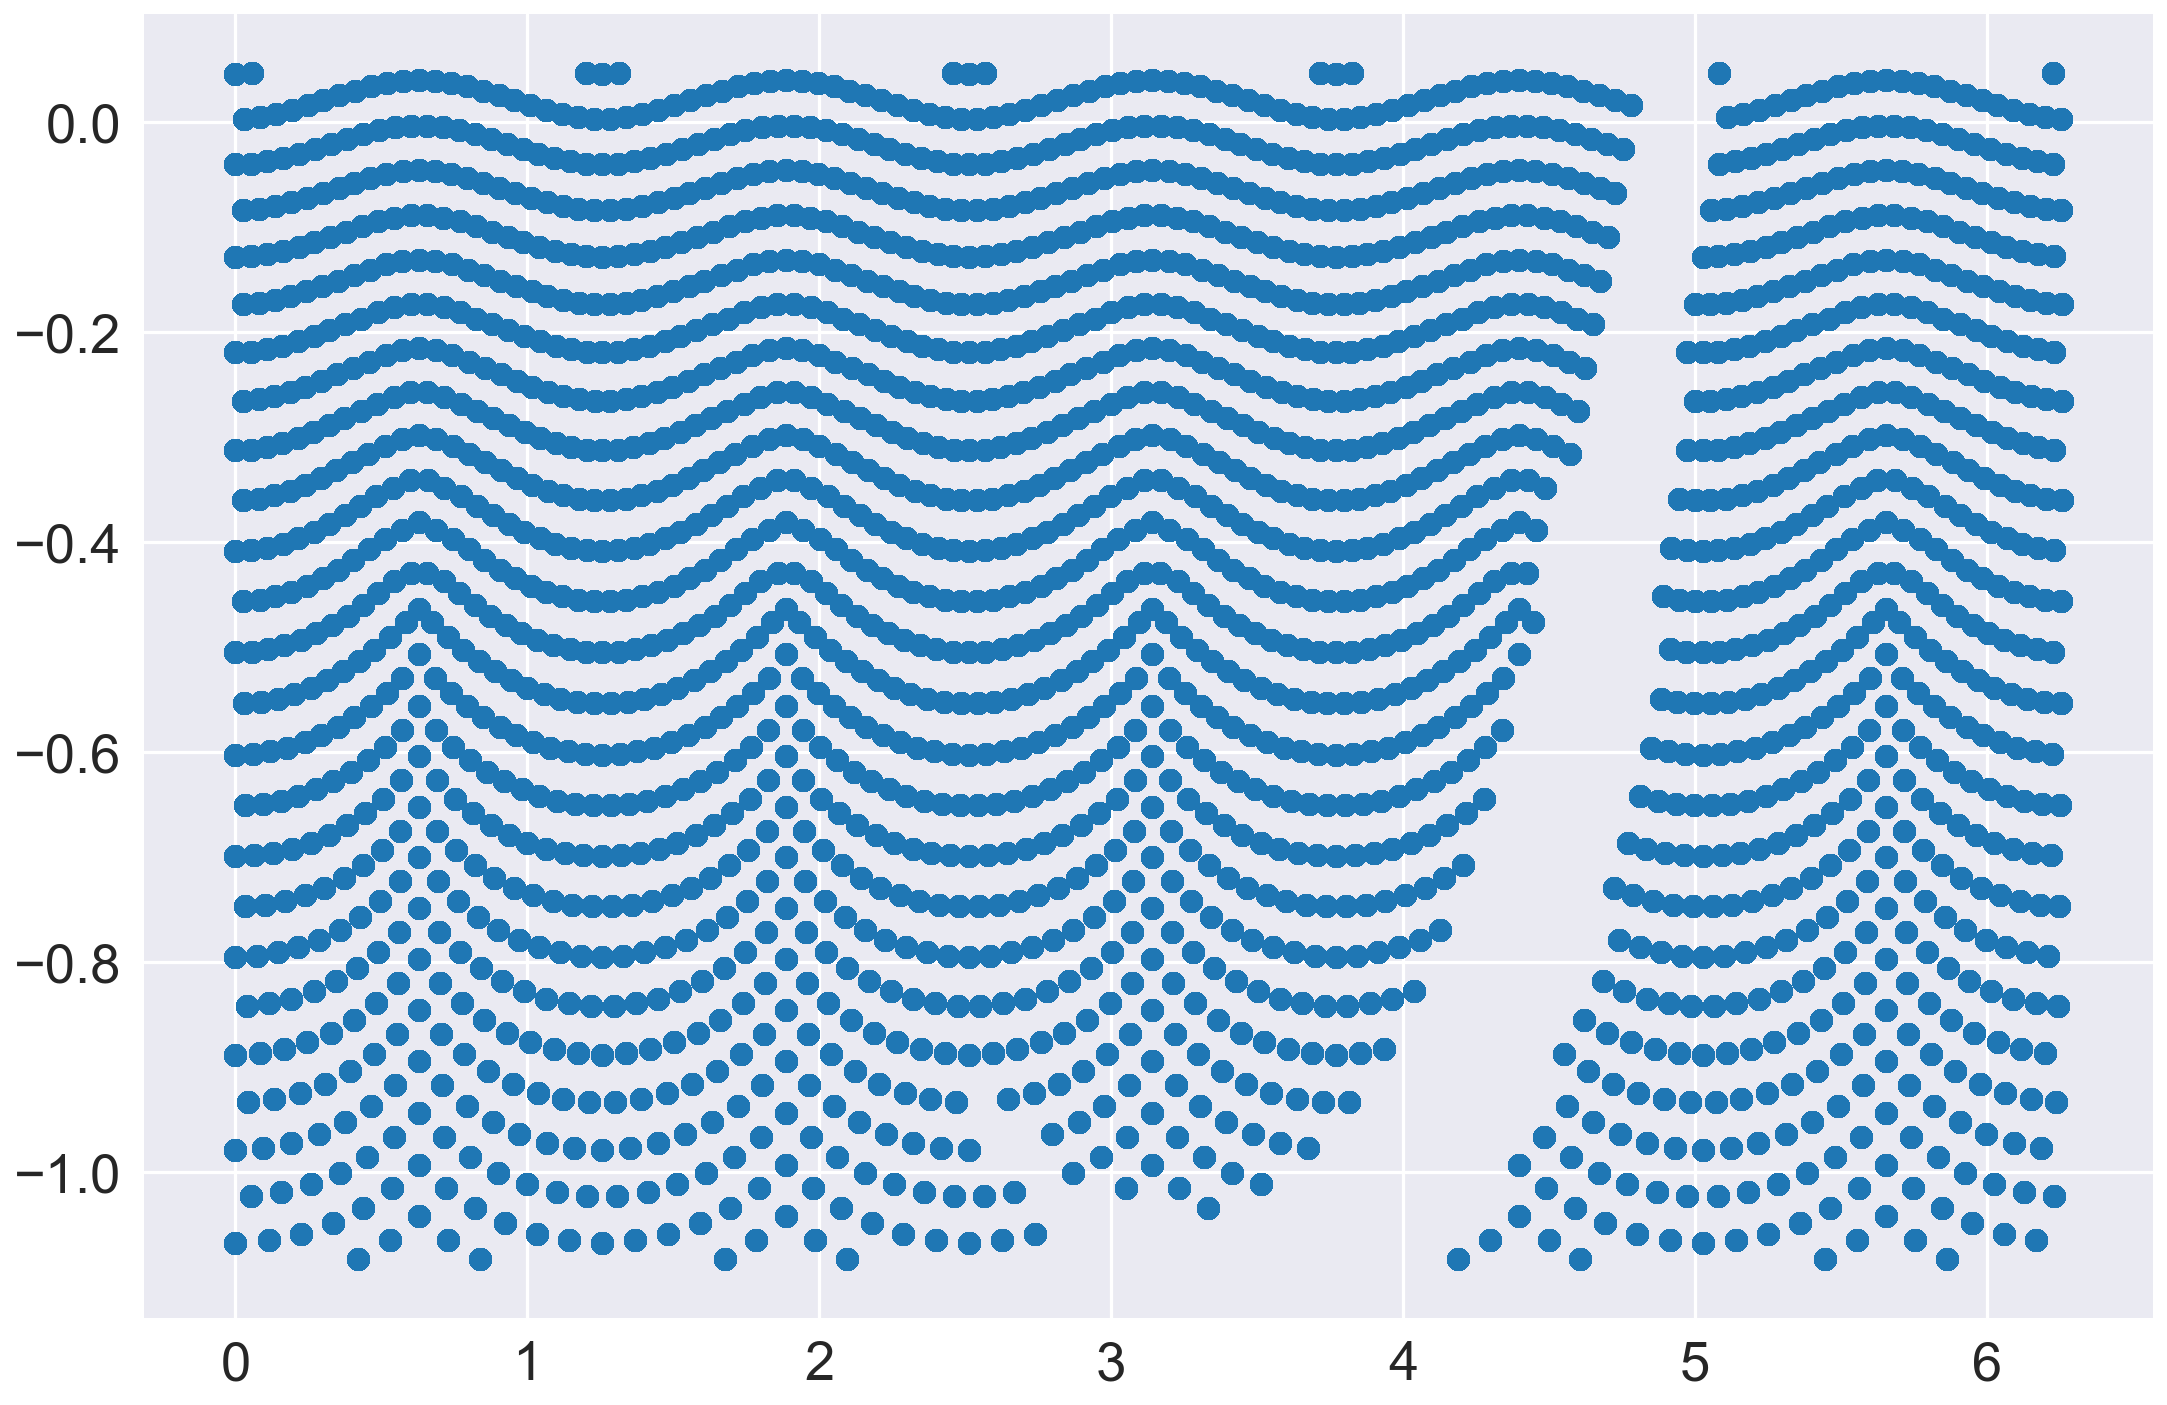

In [170]:
plt.plot([bgroup.simData[i][5] for i in range(2421933)],[bgroup.simData[j][3] for j in range(2421933)],'o')

In [183]:
resultsDb.getMetricDisplayInfo()

array([ (1, 'Count expMJD', 'Count expMJD', 'HealpixSlicer', 'filter="r"', 'spiral dither', 'random_Count_expMJD_spiral_dither_HEAL.npz', 'NULL', 'NULL',  0., 'Count expMJD calculated on a HealpixSlicer basis, using a subset of data selected via filter="r".'),
       (2, 'Count expMJD', 'Count expMJD', 'HealpixSlicer', 'filter="r"', 'spiral dither', 'minion_10120_Count_expMJD_spiral_dither_HEAL.npz', 'NULL', 'NULL',  0., 'Count expMJD calculated on a HealpixSlicer basis, using a subset of data selected via filter="r".'),
       (3, 'Count expMJD', 'Count expMJD', 'HealpixSlicer', 'filter="r"', 'random dither', 'minion_10120_Count_expMJD_random_dither_HEAL.npz', 'NULL', 'NULL',  0., 'Count expMJD calculated on a HealpixSlicer basis, using a subset of data selected via filter="r".')],
      dtype=[('metricId', '<i8'), ('metricName', 'S1024'), ('baseMetricNames', 'S1024'), ('slicerName', 'S1024'), ('sqlConstraint', 'S1024'), ('metricMetadata', 'S1024'), ('metricDataFile', 'S1024'), ('disp

In [184]:
bgroup.resultsDb.getSummaryStats()

array([],
      dtype=[('metricId', '<i8'), ('metricName', 'S1024'), ('slicerName', 'S1024'), ('metricMetadata', 'S1024'), ('summaryName', 'S1024'), ('summaryValue', '<f8')])

In [69]:
database = 'dither_test/random_Count_expMJD_spiral_dither_HEAL.npz'
opsdb = db.OpsimDatabase(database)

sqlWhere = 'filter = "r" and night < 3650 and fieldRA < {} \
and fieldDec > {} and fieldRA > 0 and fieldDec < 0'.format(np.radians(200), np.radians(-50))
sns.set_style('darkgrid')
pos = opsdb.fetchMetricData(('ditheredRA', 'ditheredDec'), sqlconstraint=sqlWhere)
pos = np.array(pos)
if any(row[1] == x for row in pos):
    pos2 = zip(*pos)[1]
if any(row[2] == x for row in pos):
    pos3 = zip(*pos)[2]
pos2,pos3 = np.array(map(lambda x: np.array(x)*180/np.pi,(pos2,pos3)))
plt.plot(pos2,pos3,',')
plt.xlim(-50,250)
plt.xlabel('RA (degrees)')
plt.ylabel('dec (degrees)')
#plt.title('minion_1012 (WFD only) hex-dithers')
#plt.savefig('/Users/myhome/Desktop/miniondithersdark.png')

DatabaseError: (sqlite3.DatabaseError) file is not a database [SQL: u'PRAGMA table_info("Seeing")']

In [185]:
metric = configureMetric('Coaddm5Metric') 
slicer = configureSlicer('HealpixSlicer', kwargs={'nside':nside, 
'spatialkey1':'ditheredRA', 
'spatialkey2':'ditheredDec'},  metricDict=makeDict(metric), constraints=['filter="r"'])

NameError: name 'configureMetric' is not defined

In [72]:
database = '/Users/myhome/Downloads/minion_1012_sqlite.db'
opsdb = db.OpsimDatabase(database)

sqlWhere = 'filter = "r" and night < 3650 and fieldRA < {} \
and fieldDec > {} and fieldRA > 0 and fieldDec < 0'.format(np.radians(200), np.radians(-50))
sns.set_style('darkgrid')
pos = opsdb.fetchMetricData(('randomDitherFieldPerVisitRa', 'randomDitherFieldPerVisitDec'), sqlconstraint=sqlWhere)
pos = np.array(pos)
if any(row[1] == x for row in pos):
    pos2 = zip(*pos)[1]
if any(row[2] == x for row in pos):
    pos3 = zip(*pos)[2]
pos2,pos3 = np.array(map(lambda x: np.array(x)*180/np.pi,(pos2,pos3)))
plt.plot(pos2,pos3,'o')
plt.xlim(-50,250)
plt.xlabel('RA (degrees)')
plt.ylabel('dec (degrees)')
#plt.title('minion_1012 (WFD only) hex-dithers')
plt.savefig('/Users/myhome/Desktop/miniondithersdark.png')

randomDitherFieldPerVisitRa not in columnMap
randomDitherFieldPerVisitDec not in columnMap


ValueError: ('entries in colnames must be in self.columnMap', OrderedDict([('obsHistID', 'obsHistID'), ('sessionID', 'sessionID'), ('propID', 'propID'), ('fieldID', 'fieldID'), ('fieldRA', 'fieldRA'), ('fieldDec', 'fieldDec'), ('filter', 'filter'), ('expDate', 'expDate'), ('expMJD', 'expMJD'), ('night', 'night'), ('visitTime', 'visitTime'), ('visitExpTime', 'visitExpTime'), ('finRank', 'finRank'), ('FWHMeff', 'FWHMeff'), ('FWHMgeom', 'FWHMgeom'), ('transparency', 'transparency'), ('airmass', 'airmass'), ('vSkyBright', 'vSkyBright'), ('filtSkyBrightness', 'filtSkyBrightness'), ('rotSkyPos', 'rotSkyPos'), ('rotTelPos', 'rotTelPos'), ('lst', 'lst'), ('altitude', 'altitude'), ('azimuth', 'azimuth'), ('dist2Moon', 'dist2Moon'), ('solarElong', 'solarElong'), ('moonRA', 'moonRA'), ('moonDec', 'moonDec'), ('moonAlt', 'moonAlt'), ('moonAZ', 'moonAZ'), ('moonPhase', 'moonPhase'), ('sunAlt', 'sunAlt'), ('sunAz', 'sunAz'), ('phaseAngle', 'phaseAngle'), ('rScatter', 'rScatter'), ('mieScatter', 'mieScatter'), ('moonIllum', 'moonIllum'), ('moonBright', 'moonBright'), ('darkBright', 'darkBright'), ('rawSeeing', 'rawSeeing'), ('wind', 'wind'), ('humidity', 'humidity'), ('slewDist', 'slewDist'), ('slewTime', 'slewTime'), ('fiveSigmaDepth', 'fiveSigmaDepth'), ('ditheredRA', 'ditheredRA'), ('ditheredDec', 'ditheredDec')]))

In [2]:
def ditherplot(obj, statistic='median',**kwargs):
    if 'DELTA' in str(obj):
        title = 'median residual elipticity: {:.5f}'
    elif 'STAR in str(obj)':
        title = 'median star elipticity : {:.5f}'
    else:
        raise NameError('''obj should have STAR or DELTA.''')
    X = np.array(obj.e.keys())[:,0]
    Y = np.array(obj.e.keys())[:,1]
    e1 = np.array(obj.e.values())[:,0]
    e2 = np.array(obj.e.values())[:,1]
    lengths = np.sqrt(e1**2+e2**2)
    angles = np.array([r2d(0.5*np.arctan2(ei2,ei1)) for ei1,ei2 in zip(e1,e2)])
    pixel_scale = r2d(1)
    U = lengths*np.cos(angles)
    V = lengths*np.sin(angles)
    Q = plt.quiver(pixel_scale*X,Y*pixel_scale,U,V,angles=angles,
                   headlength=0,headaxislength=0,units='height',**kwargs);
    plt.xlabel('RA (degrees)')
    plt.ylabel('dec (degrees)')
    if statistic=='median':
        plt.title(title.format(np.median(lengths)))
    elif statistic=='mean':
        title.replace('median','mean')
        plt.title(title.format(np.mean(lengths)))

In [3]:
import seaborn
def corrplot(r, xi, sigma=np.array([None]),color='b',scale='log'):
    if sigma.all()!=None:
#         def _plot_std_bars(std=None, central_data=None, ci=None, data=None,*args, **kwargs):
#             std = sigma
#             ci = np.asarray((central_data - std, central_data + std))
#             kwargs.update({"central_data": central_data, "ci": ci, "data": data})
#             seaborn.timeseries._plot_ci_band(*args, **kwargs)
#         seaborn.timeseries._plot_std_bars = _plot_std_bars
        ax = sns.tsplot(xi,r,color=color, n_boot=0)
        ax.errorbar(r, xi, yerr=sigma, fmt=None,color=color)


    else:
        sns.tsplot(xi,r,color=color)
    plt.xlabel(r'$\theta$ (degrees)')
    # plt.ylabel(r'$\xi_+$')
    plt.xscale('log')
    plt.yscale(scale)


In [53]:
from __future__ import division
%pylab inline
from scipy import stats
from angles import r2d, r2arcs, d2arcs, arcs2r
def arcm2r(theta):
    return arcs2r(theta*60)
import seaborn as sns;sns.set_style('darkgrid')
import lsst.sims.maf.stackers as stackers
import treecorr as tr, healpy as hp
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 18,12
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
from lsst.sims.maf.plots import PlotHandler
from collections import defaultdict
import treecorr
from itertools import chain
sns.set_context('poster',font_scale=1.7)

class ModelErrors():
    
    def __init__(self,ModelType,WorstCase):
        self.fwhm = 0.7 #arcsec
        self.sigma = self.fwhm/(2*np.sqrt(2*np.log(2)))
        self.TrM = 2*self.sigma**2
        self.T_gal = self.TrM
        self.T_PSF = self.TrM
        self.PSF.TrM = self.TrM
        self.STAR.TrM = self.TrM
        self.alpha = 0.01
        self.ModelType = ModelType
        self.survey_area = (np.radians(200),np.radians(50)) # in radians
        self.star_num = 1000
        stars_X = np.random.rand(int(self.star_num))*self.survey_area[0] 
        Y = 0.77*np.random.rand(int(self.star_num))/2 +0.5  #*self.survey_area[1] - self.survey_area[1]
        stars_Y = np.arccos(2*Y-1)-np.pi/2
        stars = np.array((stars_X,stars_Y))
        self.stars = stars.swapaxes(1,0)
        self.DELTA.e = defaultdict(np.array)
        self.DELTA.M = defaultdict(np.array)
        self.STAR.M = defaultdict(np.array)
        self.STAR.e = defaultdict(np.array)
        self.PSF.M = defaultdict(np.array)
        self.PSF.e = defaultdict(np.array)
        self.counter = defaultdict(int)
        self.ksstatistic = []
        self.pvalues = []
        self.Worst = WorstCase
        self.savedStarsAngles = {tuple(k):[0] for k in self.stars}
        
        # Getting requirements on rho and xi_+ from HSC data. 
        HSCCosmicShear = np.loadtxt('HSCS16A_combinedarea_1000rea_full_xi_p.mean_sqrtvar')
        self.reqs_r = arcm2r(1)*HSCCosmicShear[:,0]
        self.HSCCosmicShear_xip = HSCCosmicShear[:,1]/2.6
        rho_reqs = np.loadtxt('rho_requirements.txt')
        lsst_area = 18000.
        hsc_area = 136.
        self.rho25_reqs = 0.02/self.alpha * np.sqrt(hsc_area/lsst_area) * rho_reqs[:,2]/(self.T_PSF/self.T_gal)**2
        self.rho134_reqs = np.sqrt(hsc_area/lsst_area) * rho_reqs[:,1]/(self.T_PSF/self.T_gal)
        
        
    class PSF:
        '''empty namespace to organise results into
        '''
        pass
    
    class STAR:
        '''empty namespace to organise results into
        '''
        pass
    
    class DELTA:
        '''empty namespace to organise results into
        '''
        pass

    def getModels(self):
        '''calls one of the model methods to create an overly simplified model, 
        or (N/A yet) imports one
        '''
        print 'creating the models at every dither, this will take a while'
        if self.Worst==False:
            for i in range(len(self.stars)):
                self.BestCase(position_num=i)
        else:
            for i in range(len(self.positions)):
                self.WorstCase(position_num=i)
                if len(self.DELTA.M.keys())==self.star_num:
                    return None
                
    def getPositions(self,sqlWhere,database='/Users/myhome/Downloads/minion_1012_sqlite.db'):
        '''uses OpSim to find all dithered positions given some constraint sqlWhere
        '''
        print 'getting the dither positions from the database'
        opsdb = db.OpsimDatabase(database)
        pos = opsdb.fetchMetricData(('ditheredRA', 'ditheredDec'), sqlconstraint=sqlWhere)
        pos = np.array(pos)
        if any(row[1] == x for row in pos):
            posRA = zip(*pos)[1]
        if any(row[2] == x for row in pos):
            posDec = zip(*pos)[2]
        pos = np.array((posRA,posDec))
        self.positions = pos.swapaxes(1,0)
        print 'number of stars dither positions: ', len(self.positions)
        
    def avgOver(self):
        ''' averages the shapes in 2nd moment-space 
        '''
        if self.Worst==False:
            print 'averaging down and calculating residuals'
            self.PSF.M = {k:self.PSF.M[k]/self.counter[k] for k in self.PSF.M.keys()}
            self.STAR.M = {k:self.STAR.M[k]/self.counter[k] for k in self.STAR.M.keys()}
            self.DELTA.M = {k:self.DELTA.M[k]/self.counter[k] for k in self.counter.keys()}
        elif self.Worst==True:
            print 'calculating residuals'
            self.DELTA.M = {k:self.STAR.M[k]-self.PSF.M[k] for k in self.PSF.M.keys()}
        else:
            raise ValueError('self.Worst is not defined appropriately')
            
    def M2e(self):
        ''' go back from 2nd moment space to elipticities
        '''
        print 'moving back from moment space to elipticities'
        for pos in self.PSF.M.keys():
            Mxx, Mxy, Myy = self.DELTA.M[pos]
            self.DELTA.e[pos] = np.array([(Mxx-Myy)/self.PSF.TrM, Mxy*2/self.PSF.TrM])
            Mxx, Mxy, Myy = self.STAR.M[pos]
            self.STAR.e[pos] = np.array([(Mxx-Myy)/self.STAR.TrM, Mxy*2/self.STAR.TrM])
            Mxx, Mxy, Myy = self.PSF.M[pos]
            self.PSF.e[pos] = np.array([(Mxx-Myy)/self.PSF.TrM, Mxy*2/self.PSF.TrM])
    
    def process(self,sqlWhere):
        ''' runs all analysis methods 
        '''
        self.getPositions(sqlWhere)
        self.getModels()
        self.avgOver()
        self.M2e()
        self.getRhos()
        self.rhos2errors()
        
        
    def getRhos(self):
        ''' method to get the rho statistics, needs a model, and traces for rhos 2 through 5.
        '''
        print 'finding rhos'
        X, Y = np.array(map(lambda i: np.array([key[i] for key in self.DELTA.e.keys()]), (0,1)))
        de1, de2 = np.array(map(lambda i:np.array([val[i] for val in self.DELTA.e.values()]), (0,1)))
        psfe1, psfe2 = np.array(map(lambda i: np.array([val[i] for val in self.PSF.e.values()]), (0,1)))
        stare1, stare2 = np.array(map(lambda i: np.array([val[i] for val in self.STAR.e.values()]), (0,1)))
        condition= np.logical_and(np.logical_and(np.degrees(X)>10,np.degrees(Y)<-8), np.logical_and(np.degrees(X)<190,np.degrees(Y)>-42))
        X = X[condition]
        Y = Y[condition]
        de1 = de1[condition]
        de2 = de2[condition]
        psfe1 = psfe1[condition]
        psfe2 = psfe2[condition]
        stare1 = stare1[condition]
        stare2 = stare2[condition]
        
        decat = treecorr.Catalog(g1=de1, g2=de2, ra=X, dec=Y, ra_units='radians', dec_units='radians')
        psfcat = treecorr.Catalog(g1=psfe1, g2=psfe2, ra=X, dec=Y, ra_units='radians', dec_units='radians')
        starcat = treecorr.Catalog(g1=stare1, g2=stare2, ra=X, dec=Y, ra_units='radians', dec_units='radians')
        
        min_sep=0.1 # in degrees
        max_sep=50 # in degrees
        nbins=20 # number of bins
        
        dedecorr = treecorr.GGCorrelation(min_sep=min_sep, max_sep=max_sep, nbins=nbins, sep_units='degrees')
        dedecorr.process(decat)
        dede_xip = dedecorr.xip
        dede_xim = dedecorr.xim
        self.rho1_sigma = dedecorr.varxi**0.5
        self.r = np.exp(dedecorr.meanlogr)
        self.rho1 = dede_xip
        self.rho1_im = dede_xim

        edecorr = treecorr.GGCorrelation(min_sep=min_sep, max_sep=max_sep, nbins=nbins, sep_units='degrees')
        edecorr.process(psfcat, decat)
        ede_xip = edecorr.xip
        ede_xim = edecorr.xim
        
        self.rho2 = ede_xip
        self.rho2_im = ede_xim
        self.rho2_sigma = edecorr.varxi**0.5
        
        if 0:
            self.size_error_ratio = 0.01

            edtedtcorr = treecorr.GGCorrelation(min_sep=min_sep, max_sep=max_sep, nbins=nbins, sep_units='degrees')
            edtedtcorr.process(psfcat*self.size_error_ratio, psfcat*self.size_error_ratio)
            edtedt_xip = edtedtcorr.xip
            edtedt_xim = edtedtcorr.xim

            self.rho3 = edtedt_xip
            self.rho3_im = edtedt_xim

            deedtcorr = treecorr.GGCorrelation(min_sep=min_sep, max_sep=max_sep, nbins=nbins, sep_units='degrees')
            deedtcorr.process(decat, psfcat*self.size_error_ratio)
            deedt_xip = deedtcorr.xip
            deedt_xim = deedtcorr.xim

            self.rho4 = deedt_xip
            self.rho4_im = deedt_xim

            eedtcorr = treecorr.GGCorrelation(min_sep=min_sep, max_sep=max_sep, nbins=nbins, sep_units='degrees')
            eedtcorr.process(psfcat, psfcat*self.size_error_ratio)
            eedt_xip = eedtcorr.xip
            eedt_xim = eedtcorr.xim

            self.rho5 = eedt_xip
            self.rho5_im = eedt_xim
            
        # star shape correlation:
        starcorr = treecorr.GGCorrelation(min_sep=min_sep, max_sep=max_sep, nbins=nbins, sep_units='degrees')
        starcorr.process(starcat)
        self.xip_sigma = starcorr.varxi**0.5
        self.xip = starcorr.xip
        self.xim = starcorr.xim
            
    def rhos2errors(self):
        ''' propagates rho statistics into shear errors 
        '''
        self.delta_T_psf = 0
        self.rho3 = 0
        self.rho4 = 0
        self.rho5 = 0
        self.delta_xip = 2 * (self.delta_T_psf/self.T_gal) * self.xip\
                    + (self.T_PSF/self.T_gal)**2 * self.rho1\
                    - self.alpha * (self.T_PSF/self.T_gal) * self.rho2\
                    + (self.T_PSF/self.T_gal)**2 * self.rho3\
                    + (self.T_PSF/self.T_gal)**2 * self.rho4\
                    - self.alpha * (self.T_PSF/self.T_gal) * self.rho5
        
        self.delta_xip_sigma = np.sqrt( self.rho1_sigma**2 + self.alpha**2 * self.rho2_sigma**2 )
                                        
    def BestCase(self,position_num):
        ''' method to create a radial pattern (one of the overly simplified models),
            e = 0.05* distance from origin.
            New algorithm loops over each star, finding the dither positions at which it would
            be visible -- then 
        '''
        from angles import r2d, r2arcs, d2arcs
        star_pos = self.stars[position_num]
        innerDithers = self.positions[np.where(((self.positions[:,0]-star_pos[0])**2+(self.positions[:,1]-star_pos[1])**2)<np.radians(1.2))[0]]
        rel_X, rel_Y = star_pos[0] - innerDithers[:,0], star_pos[1] - innerDithers[:,1]
        r = np.sqrt(rel_X**2+rel_Y**2)
        theta = np.arctan((rel_Y)/(rel_X))
        stare1 = r*np.cos(2*theta)/2
        stare2 = r*np.sin(2*theta)/2
        psfe1 = stare1/1.03
        psfe2 = stare2/1.03
        star_pos = tuple(star_pos)
        starMxx = 0.5*self.STAR.TrM*(stare1+1)
        starMxy = 0.5*self.STAR.TrM*stare2
        starMyy = 0.5*self.STAR.TrM*(-stare1+1)
        psfMxx = 0.5*self.PSF.TrM*(psfe1+1)
        psfMxy = 0.5*self.PSF.TrM*psfe2
        psfMyy = 0.5*self.PSF.TrM*(-psfe1+1)
        angles = np.array([r2d(0.5*np.arctan2(e2,e1)) for e2,e1 in zip(stare2,stare1)])
        self.savedStarsAngles[star_pos] = angles

        deltaMxx = starMxx - psfMxx
        deltaMxy = starMxy - psfMxy
        deltaMyy = starMyy - psfMyy

        self.counter[star_pos] = len(innerDithers)
        self.STAR.M[star_pos] = np.array([np.sum(starMxx), np.sum(starMxy), np.sum(starMyy)])
        self.PSF.M[star_pos] = np.array([np.sum(psfMxx), np.sum(psfMxy), np.sum(psfMyy)])
        self.DELTA.M[star_pos] = np.array([np.sum(deltaMxx), np.sum(deltaMxy), np.sum(deltaMyy)])


    def WorstCase(self,position_num):
        '''still using the old algorithm for the worst case -- still testing whether it is faster for this case or not'''
        from angles import r2d, r2arcs, d2arcs
        center = self.positions[position_num]
        innerStars = self.stars[np.where(((self.stars[:,0]-center[0])**2+(self.stars[:,1]-center[1])**2)<np.radians(1.2))[0]]
        rel_X, rel_Y = innerStars[:,0] - center[0], innerStars[:,1] - center[1]
        r = np.sqrt(rel_X**2+rel_Y**2)
        theta = np.arctan((rel_Y)/(rel_X))
        stare1 = r*np.cos(2*theta)/2
        stare2 = r*np.sin(2*theta)/2
        psfe1 = stare1/1.03
        psfe2 = stare2/1.03
        innerStars = [tuple(i) for i in innerStars]
        starMxx = 0.5*self.STAR.TrM*(stare1+1)
        starMxy = 0.5*self.STAR.TrM*stare2
        starMyy = 0.5*self.STAR.TrM*(-stare1+1)
        psfMxx = 0.5*self.PSF.TrM*(psfe1+1)
        psfMxy = 0.5*self.PSF.TrM*psfe2
        psfMyy = 0.5*self.PSF.TrM*(-psfe1+1)
        angles = np.array([r2d(0.5*np.arctan2(e2,e1)) for e2,e1 in zip(stare2,stare1)])
        for i,aStar in enumerate(innerStars):
            if aStar in self.savedStarsAngles.keys():
                self.savedStarsAngles[aStar].append(angles[i])

        deltaMxx = starMxx - psfMxx
        deltaMxy = starMxy - psfMxy
        deltaMyy = starMyy - psfMyy

        for i, pos in enumerate(innerStars):
            if pos not in self.STAR.M.keys():
                self.STAR.M[pos] = np.array([starMxx[i],starMxy[i],starMyy[i]])
                self.PSF.M[pos] = np.array([psfMxx[i],psfMxy[i],psfMyy[i]])
                self.DELTA.M[pos] = np.array([deltaMxx[i],deltaMxy[i],deltaMyy[i]])


Populating the interactive namespace from numpy and matplotlib


In [49]:
best_case = ModelErrors('radial',WorstCase=False)

In [50]:
%%time
best_case.process(sqlWhere='filter = "r" and night < 3653 \
and fieldRA < {} and fieldDec > {} \
and fieldRA > 0 and fieldDec < 0'.format(np.radians(200), np.radians(-50)))

getting the dither positions from the database
number of stars dither positions:  260016
creating the models at every dither, this will take a while
averaging down and calculating residuals
moving back from moment space to elipticities
finding rhos
CPU times: user 35.5 s, sys: 3.74 s, total: 39.2 s
Wall time: 50.6 s


In [60]:
sts = []
pvalues = []
for angles in best_case.savedStarsAngles.values():
    #plt.hist(angles,alpha=0.2)
    sts.append(stats.kstest(angles,'uniform',args=(-90,180),N=10000).statistic)
    pvalues.append(stats.kstest(angles,'uniform',args=(-90,180),N=10000).pvalue)

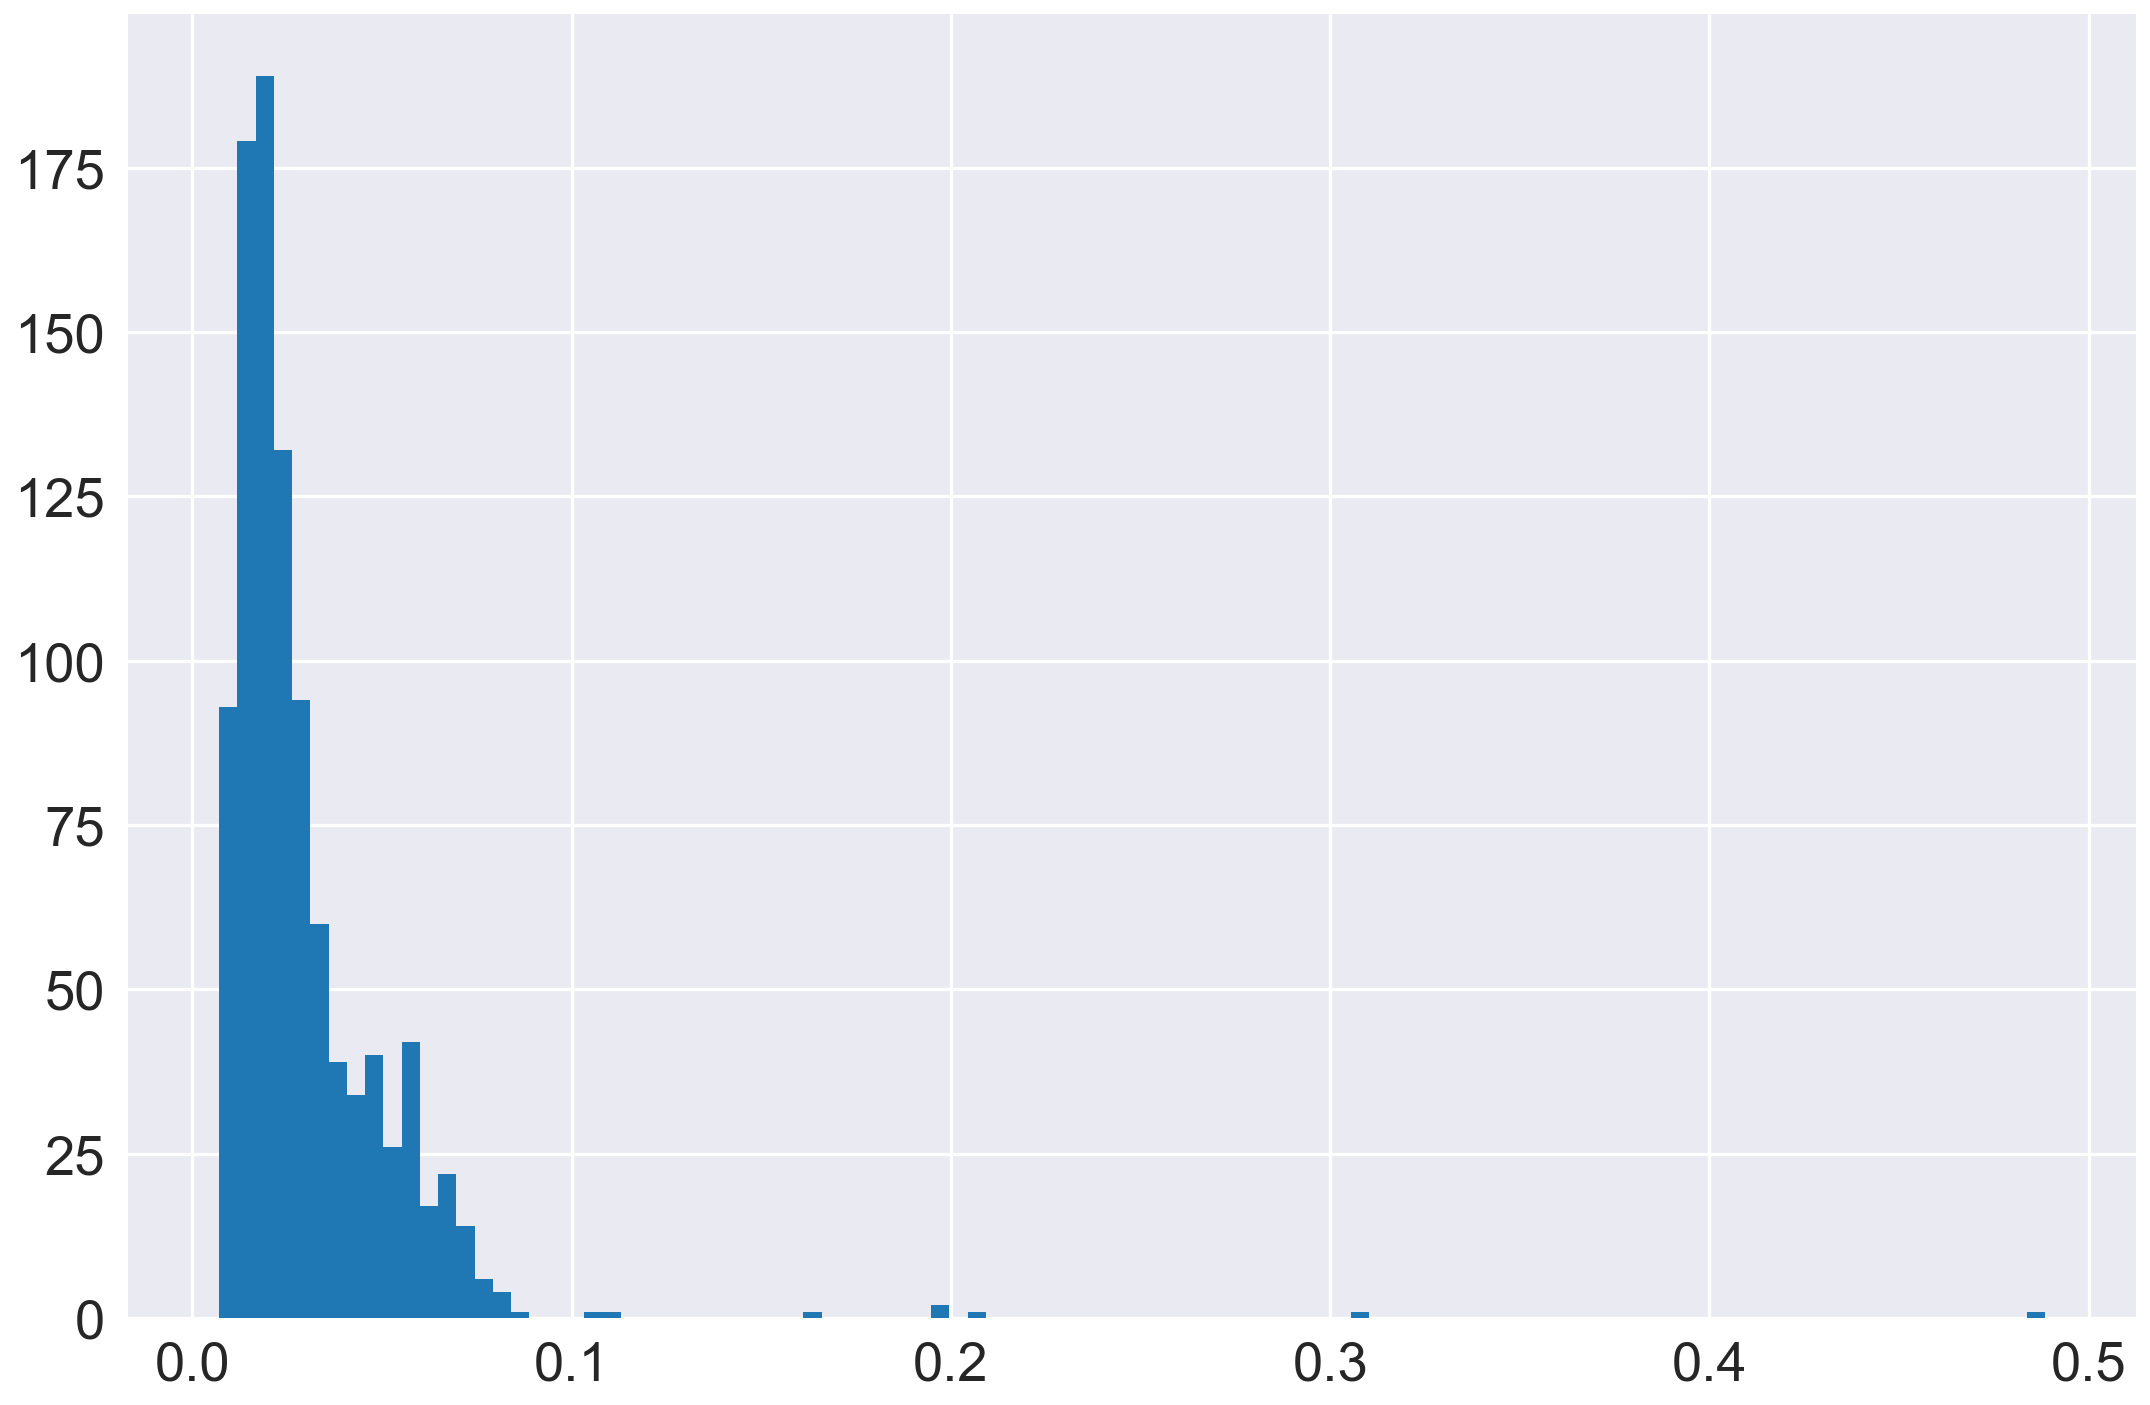

In [61]:
plt.hist(sts,bins=100);

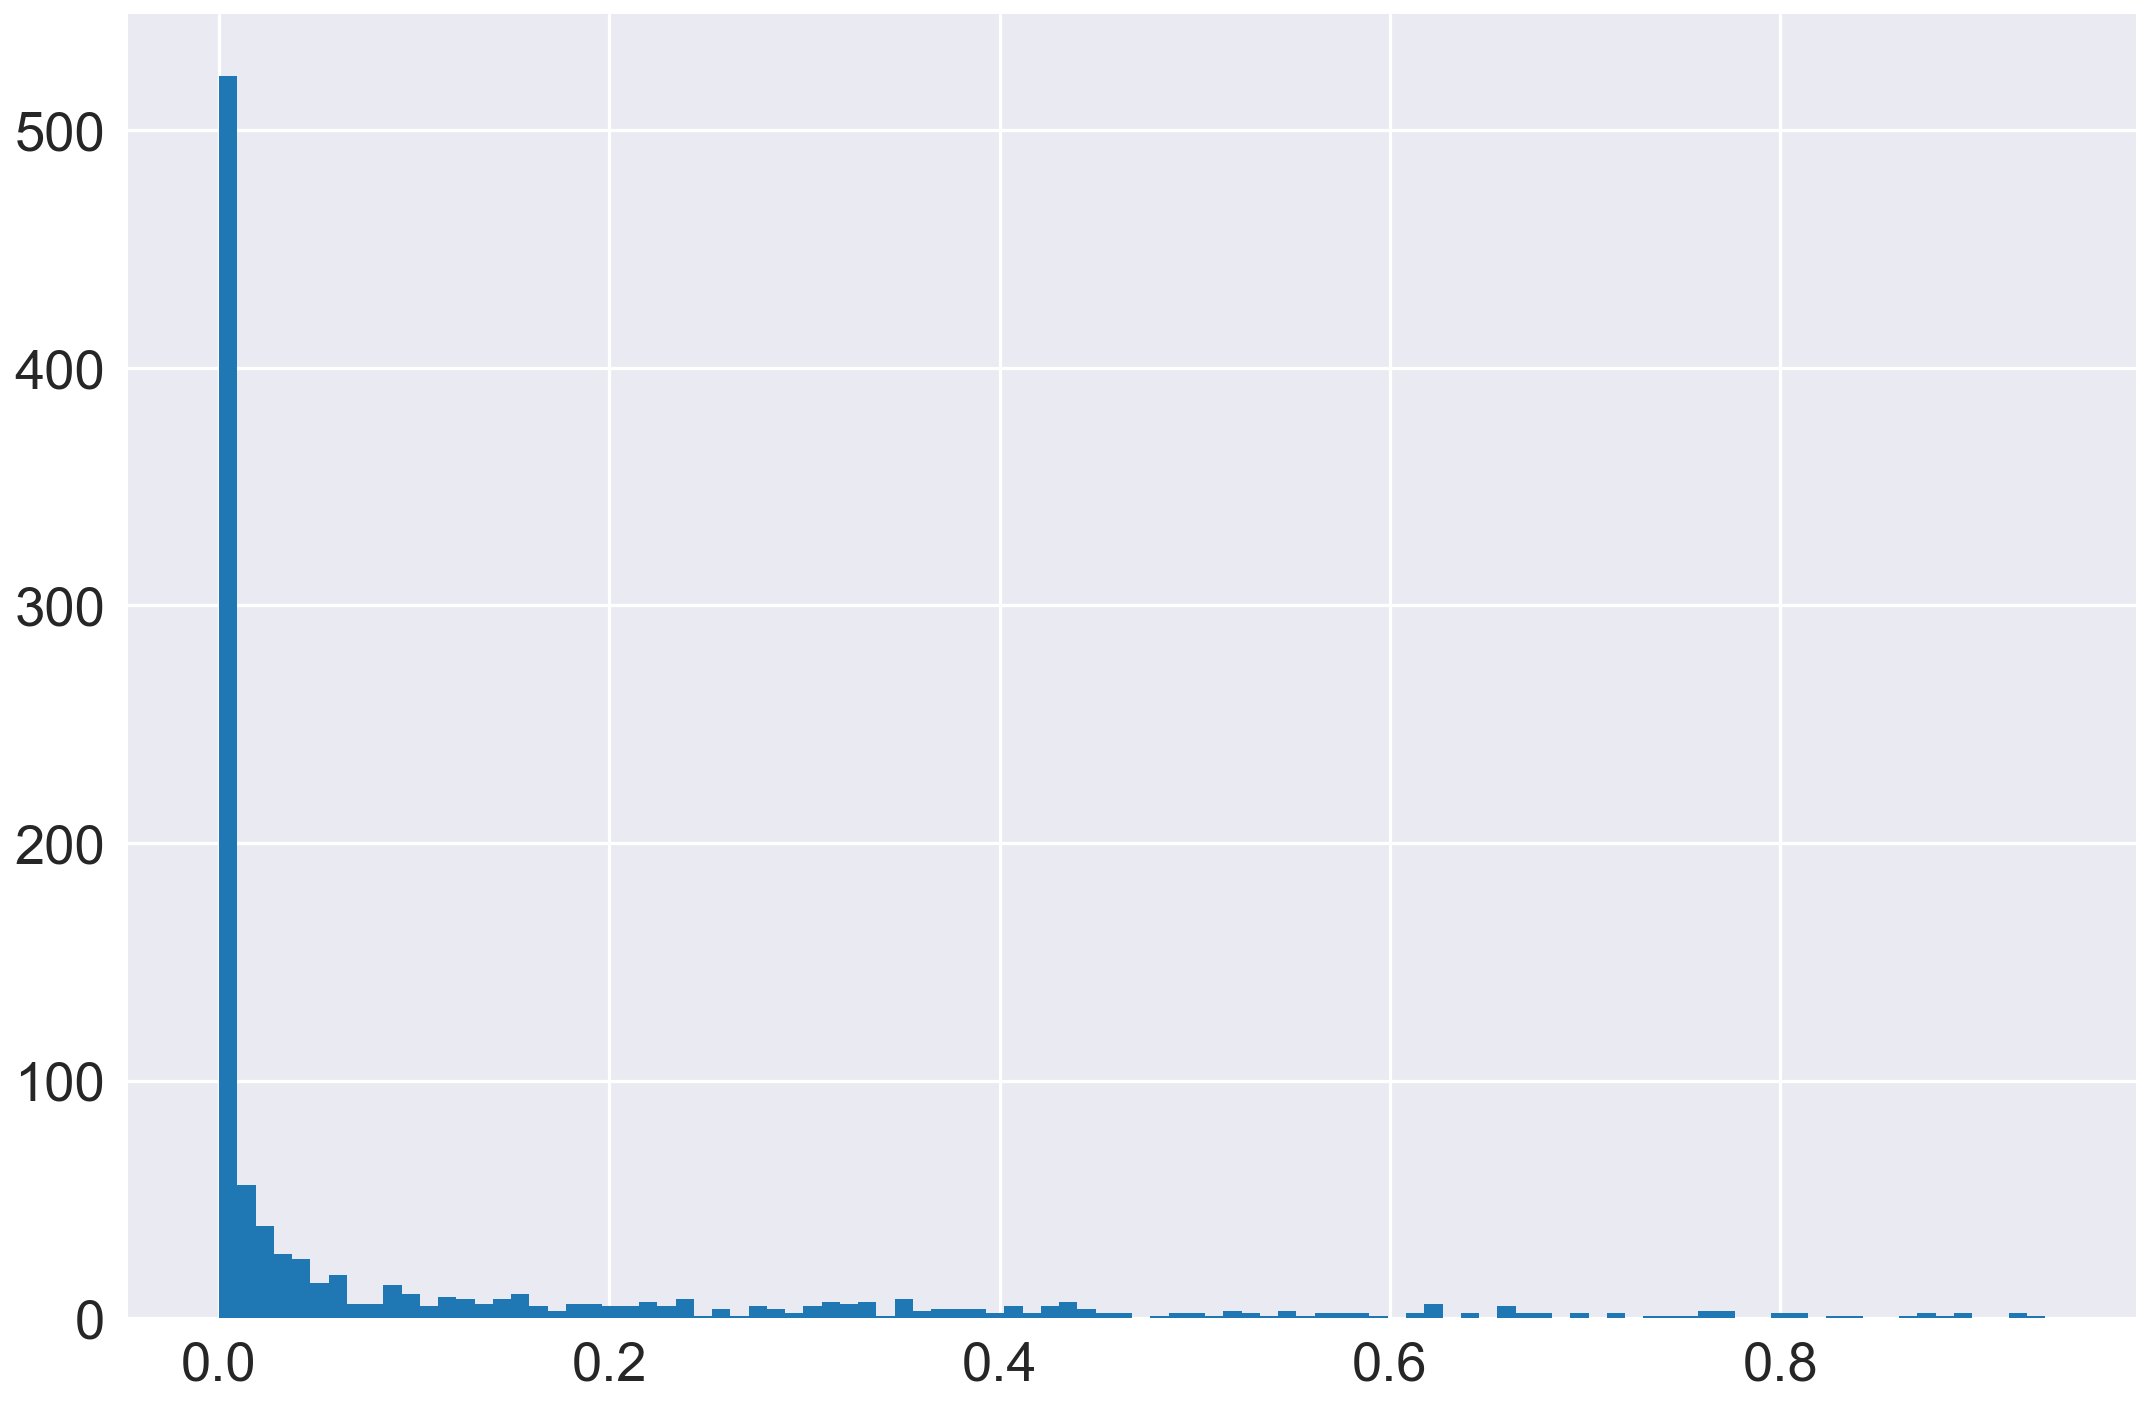

In [62]:
plt.hist(pvalues,bins=100);

### Stars whisker plot at y10

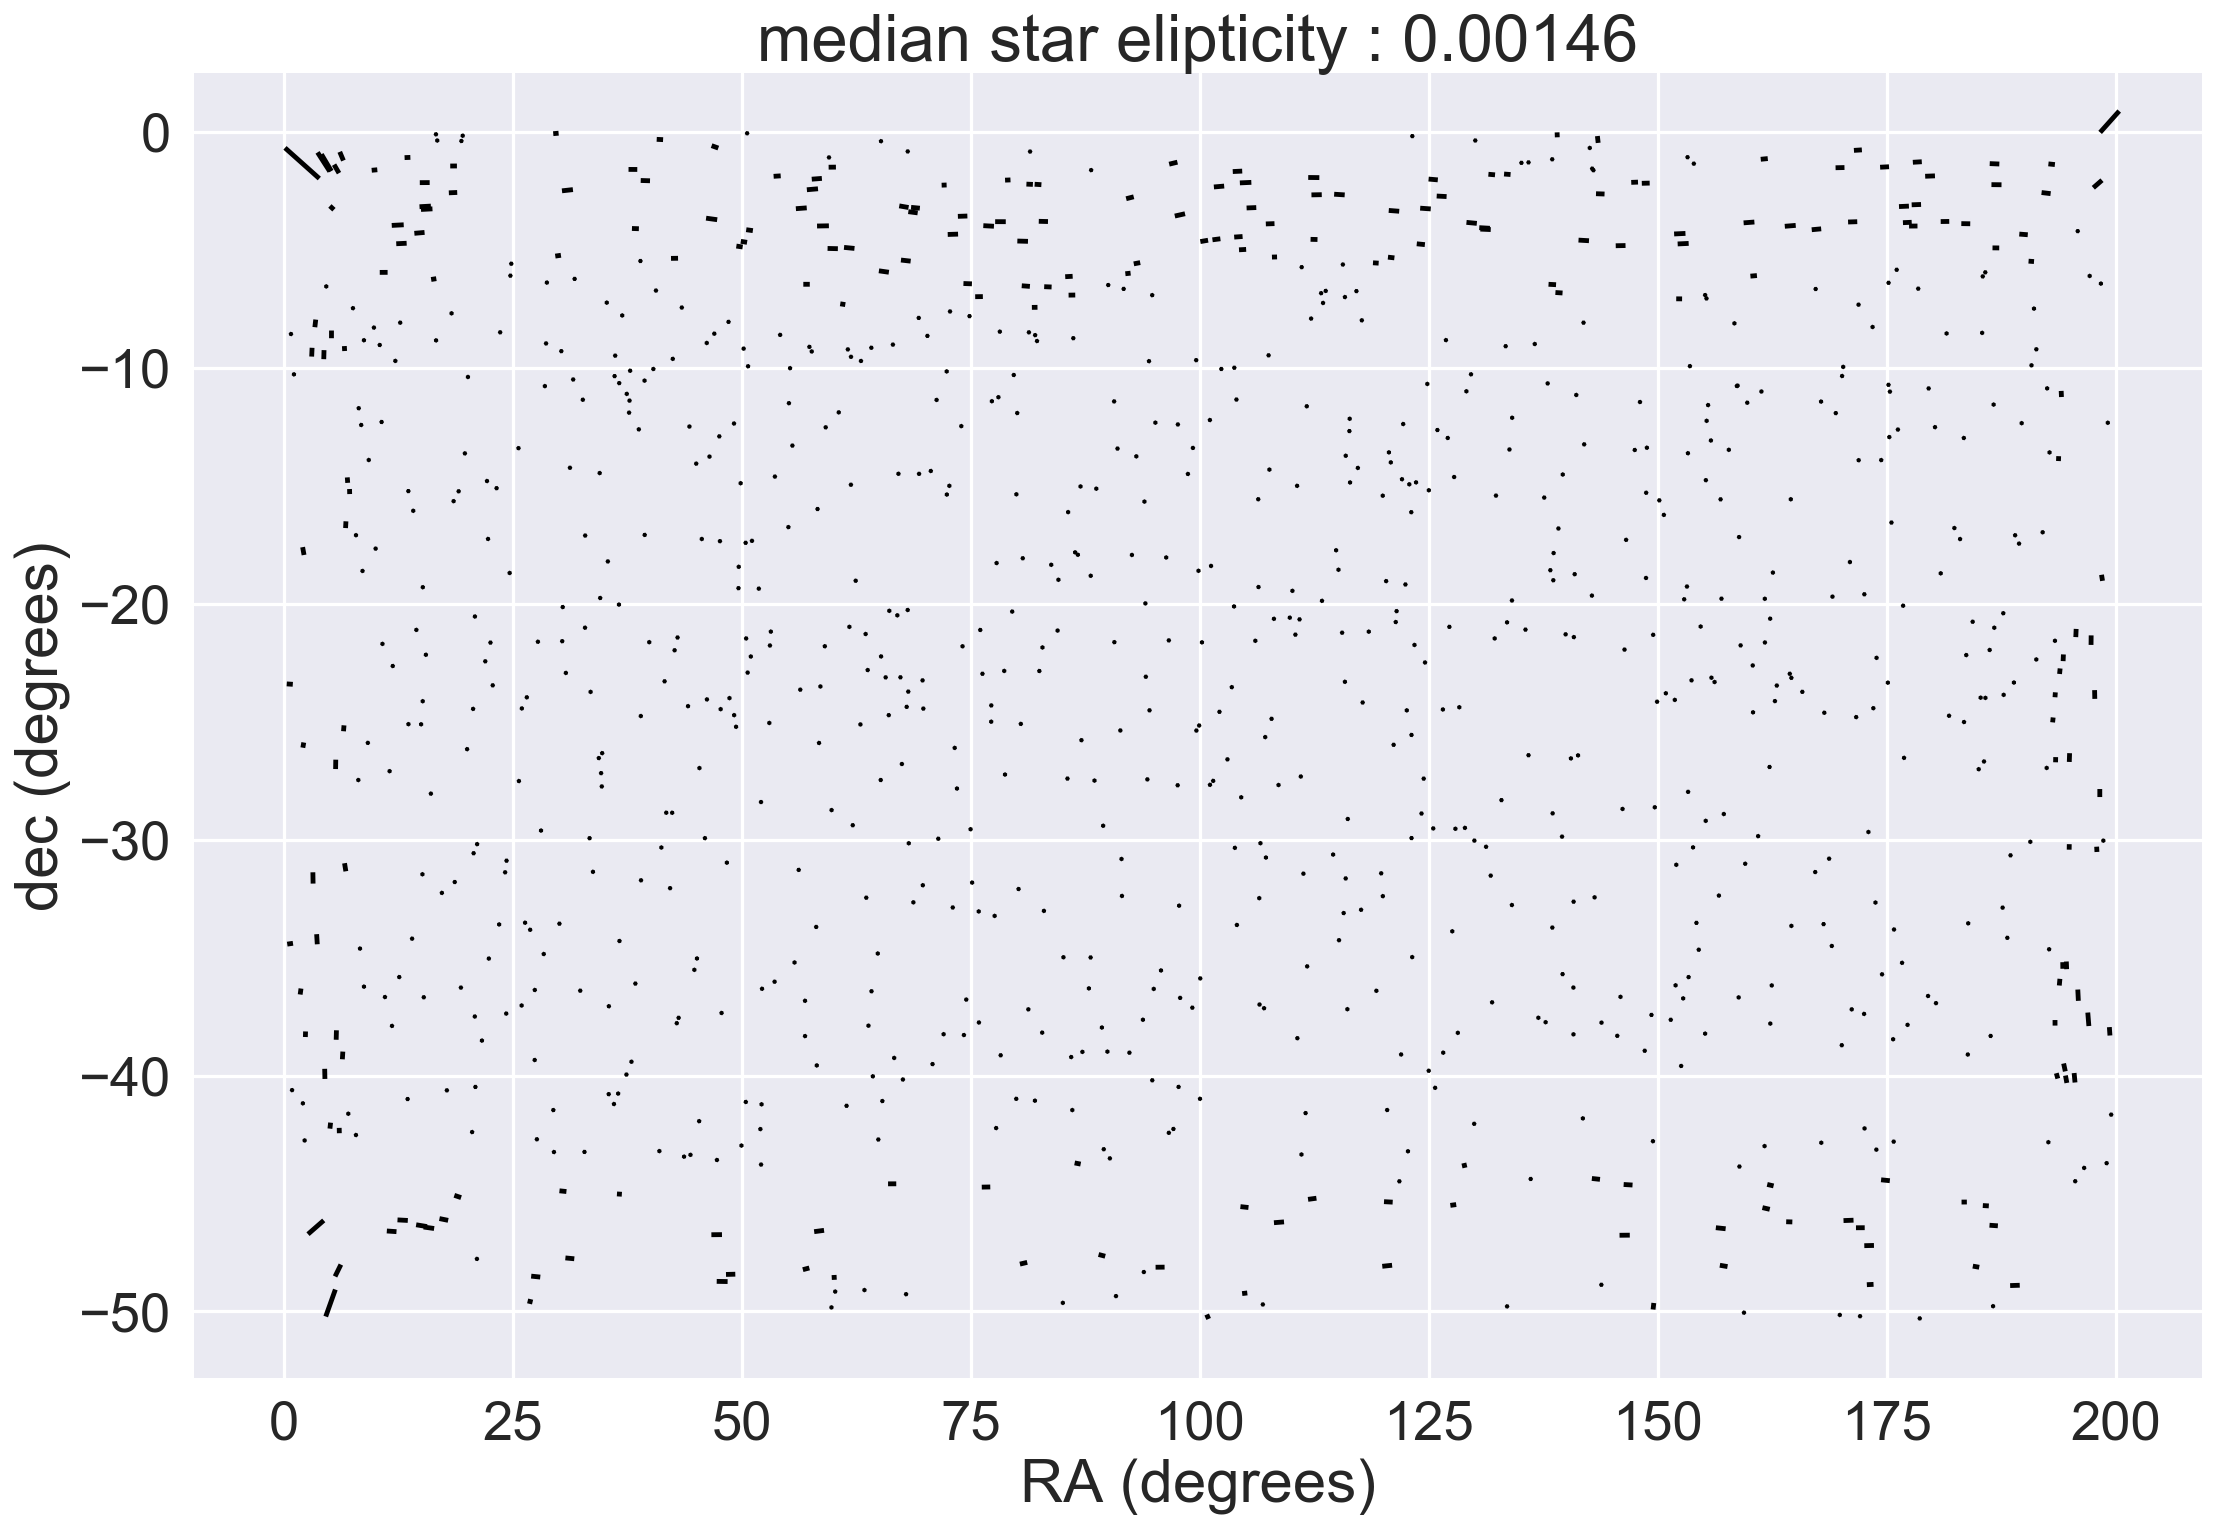

In [51]:
ditherplot(best_case.STAR, statistic='median', scale=1)
# qk = plt.quiverkey(Q, 0.8, 0.85, 0.005, r'$|e|=0.01$', labelpos='E', coordinates='figure')

### Residuals whisker plot at y10

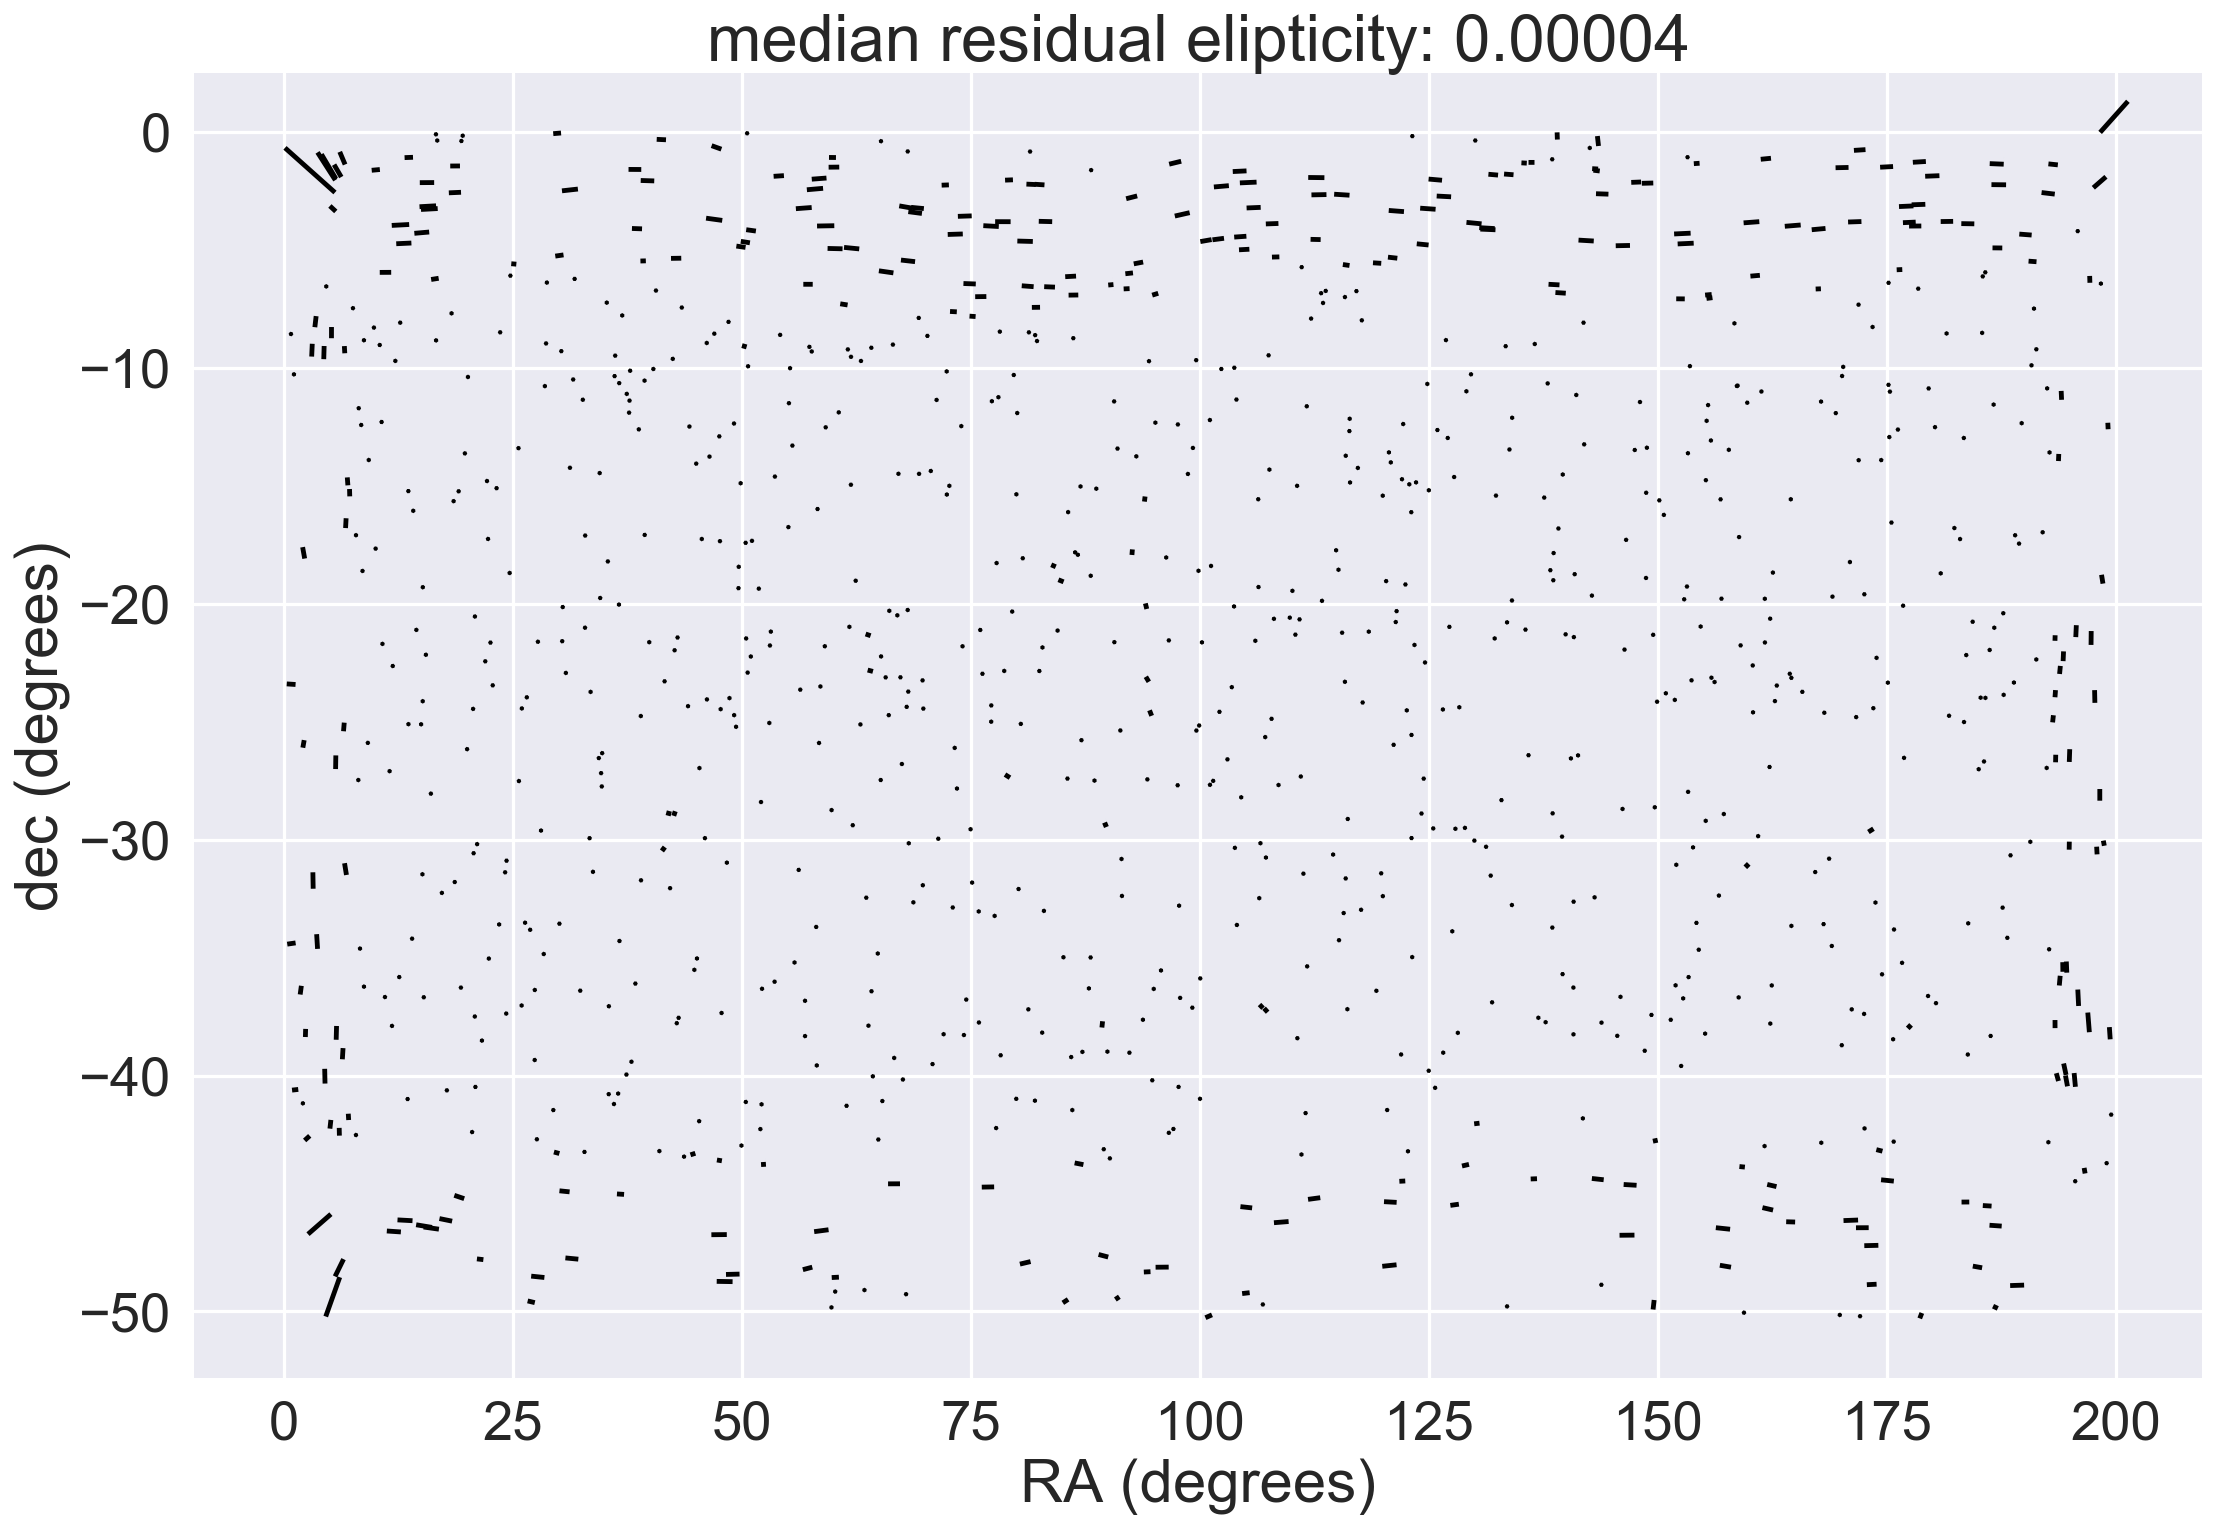

In [52]:
ditherplot(best_case.DELTA, statistic='median',scale=0.02)

In [35]:
mean(best_case.counter.values())

5204.9214000000002

In [90]:
best_case.rho2_sigma[1:]

array([  0.00000000e+00,   1.58583416e-08,   7.92917078e-09,
         4.57790888e-09,   3.63815307e-09,   2.13833834e-09,
         1.72007865e-09,   1.26162191e-09,   1.05958001e-09,
         7.29939336e-10,   5.30679166e-10,   3.91474499e-10,
         3.09700156e-10,   2.30509864e-10,   1.74785373e-10,
         1.41221306e-10,   1.15441061e-10,   1.01679018e-10,
         9.35127604e-11])

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:2876: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


NameError: name 'worst_case' is not defined

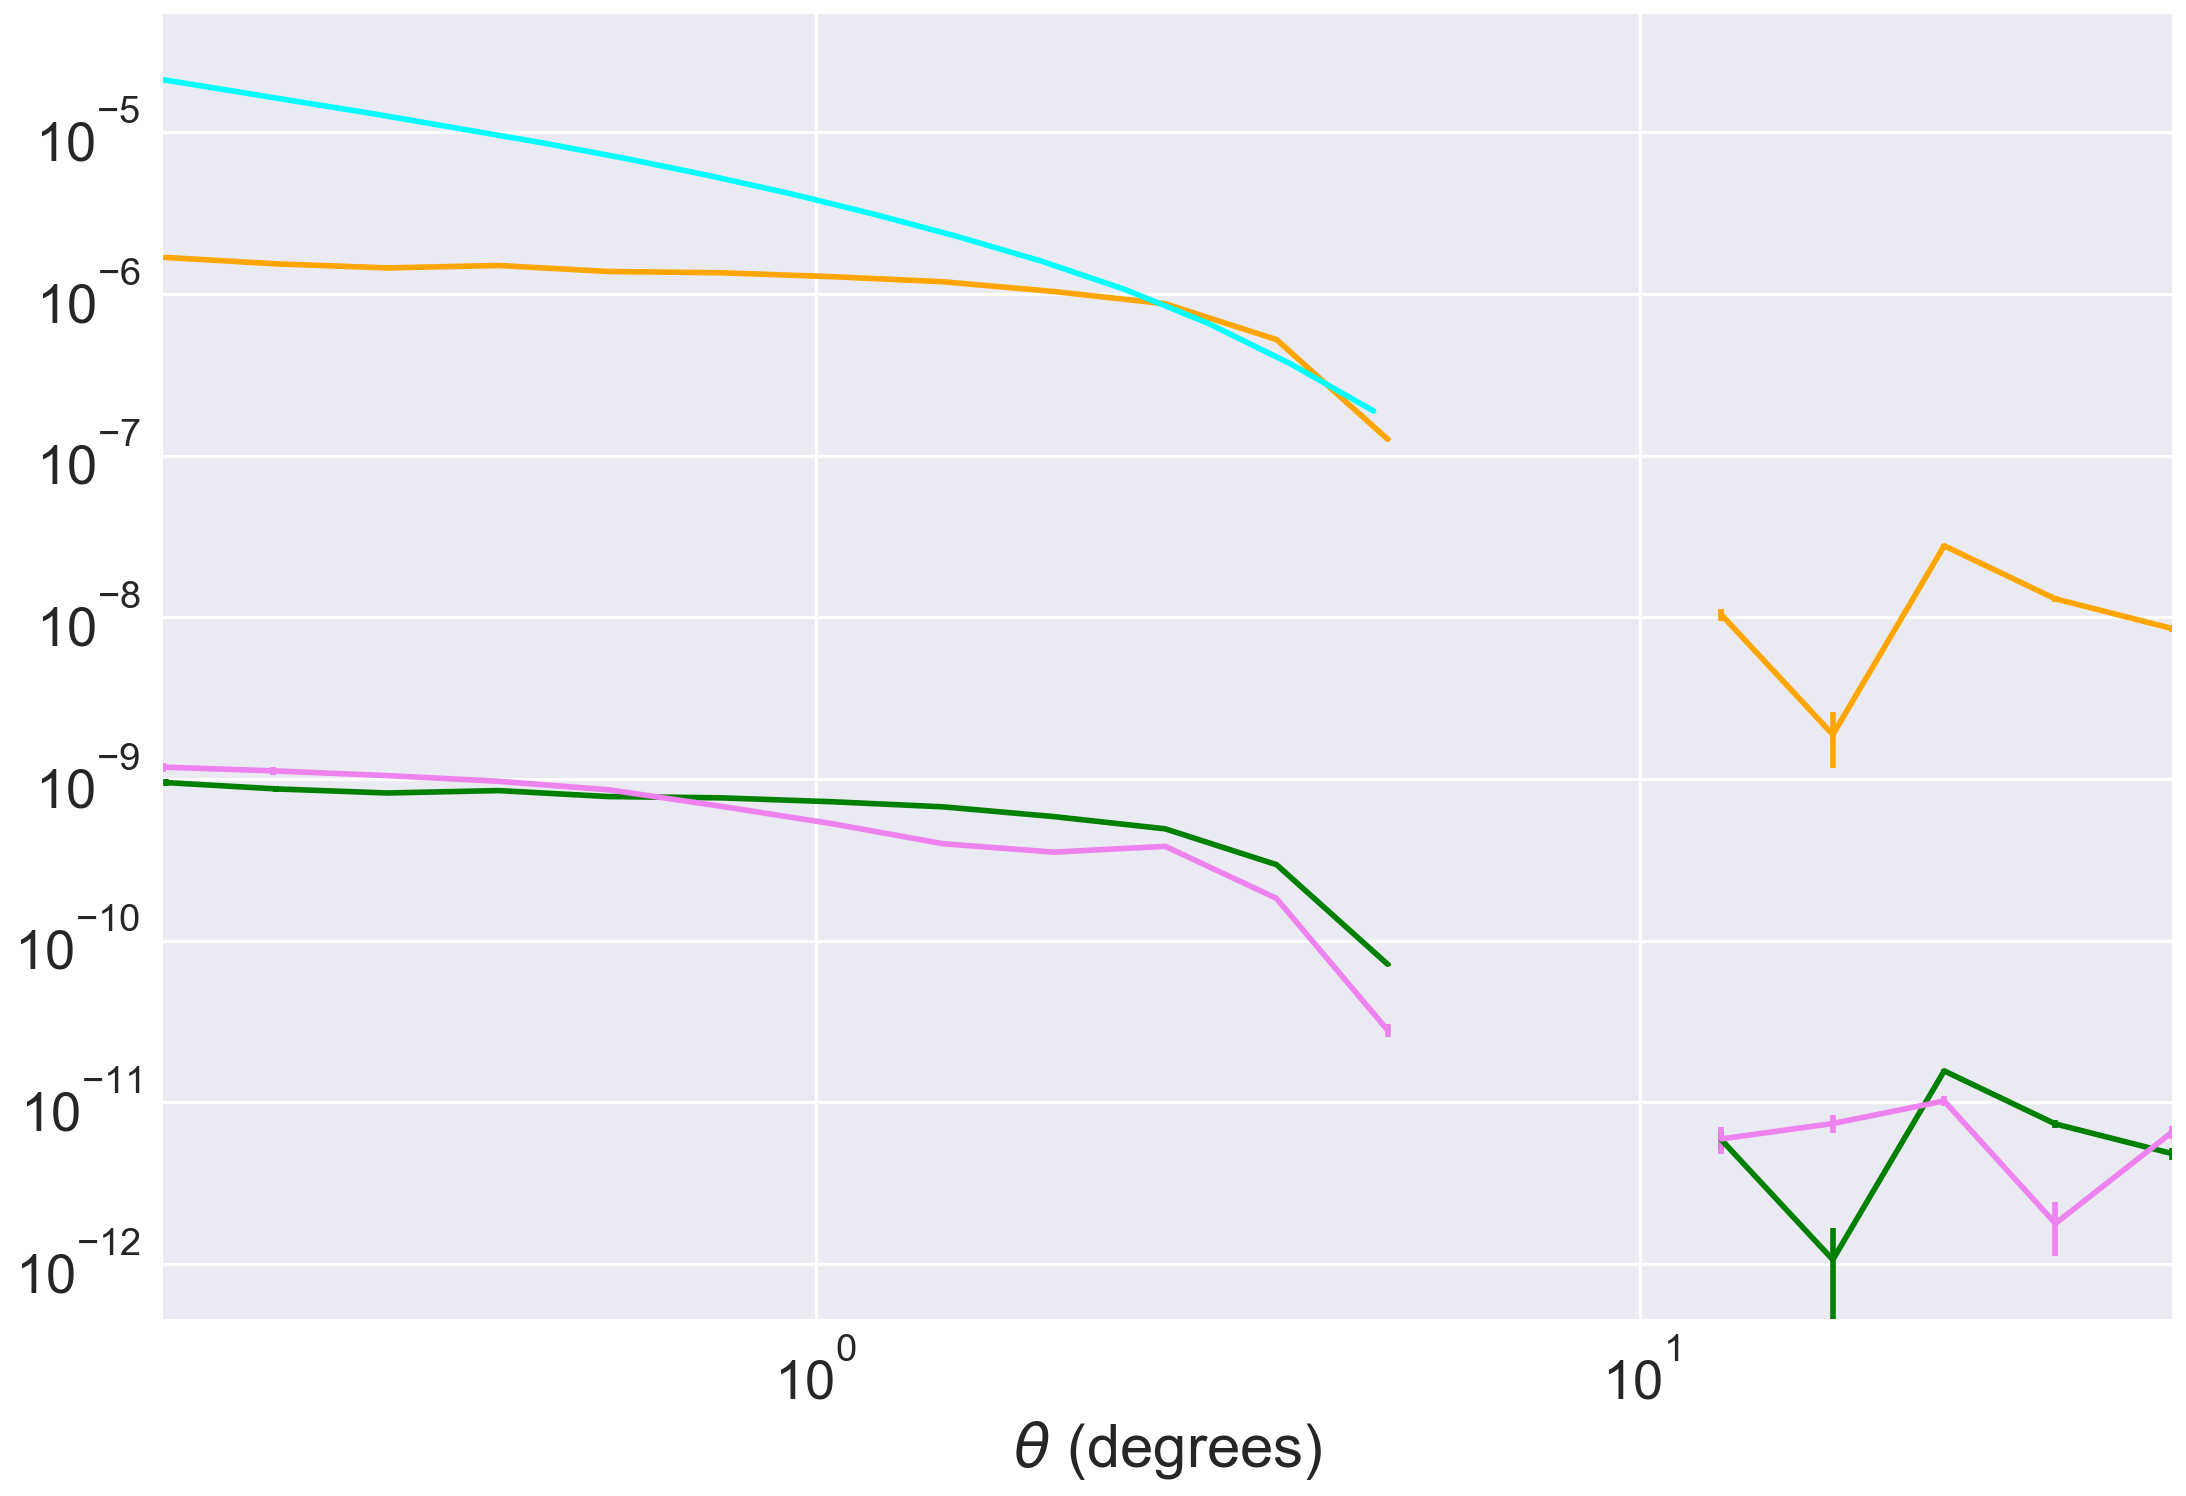

In [41]:
corrplot(best_case.r[1:], best_case.xip[1:], best_case.xip_sigma[1:],color='orange',scale='log')
corrplot(best_case.reqs_r[14:]*r2d(1), best_case.HSCCosmicShear_xip[14:], color='cyan')
# corrplot(best_case.r, best_case.rho1, abs(best_case.rho1_sigma),color='b',scale='log')
# corrplot(best_case.r, best_case.rho2, best_case.rho2_sigma,color='violet',scale='log')
corrplot(best_case.r[1:], best_case.delta_xip[1:], best_case.delta_xip_sigma[1:], color='green')
corrplot(y1.r[1:], y1.delta_xip[1:], y1.delta_xip_sigma[1:], color='violet')
corrplot(worst_case.r[1:], worst_case.delta_xip[1:],worst_case.delta_xip_sigma[1:], color='blue')
corrplot(r2d(1)*best_case.reqs_r[14:], best_case.rho134_reqs[14:], color='black', scale='log')
plt.legend([r'$\xi_+$ star shapes',r'Cosmic shear (HSC)',r'$\delta \xi_+ @y10$',r'$\delta \xi_+$ @y1',r'$\delta \xi_+$ @1st exp','Est LSST Req'],bbox_to_anchor=(0.34, 1), loc='upper right', borderaxespad=0.)
plt.xlim((0.01, 50))
#plt.yscale('symlog')
# plt.title('Figure 1. Comparison between PSF modelling errors, star shapes correlations, cosmic shear and estimated LSST requirements (from HSC)')

# Doing the same but at y1

In [54]:
y1 = ModelErrors('radial',WorstCase=False)

In [55]:
%%time
y1.process(sqlWhere='filter = "r" and night < 365 \
and fieldRA < {} and fieldDec > {} \
and fieldRA > 0 and fieldDec < 0'.format(np.radians(200), np.radians(-50)))

getting the dither positions from the database
number of stars dither positions:  27668
creating the models at every dither, this will take a while
averaging down and calculating residuals
moving back from moment space to elipticities
finding rhos
CPU times: user 4.77 s, sys: 2.5 s, total: 7.27 s
Wall time: 18.2 s


In [56]:
y1.DELTA.e==best_case.DELTA.e

False

In [9]:
sts = []
pvalues = []
for angles in y1.savedStarsAngles.values():
    #plt.hist(angles,alpha=0.2)
    sts.append(stats.kstest(angles,'uniform',args=(-90,180),N=10000).statistic)
    pvalues.append(stats.kstest(angles,'uniform',args=(-90,180),N=10000).pvalue)

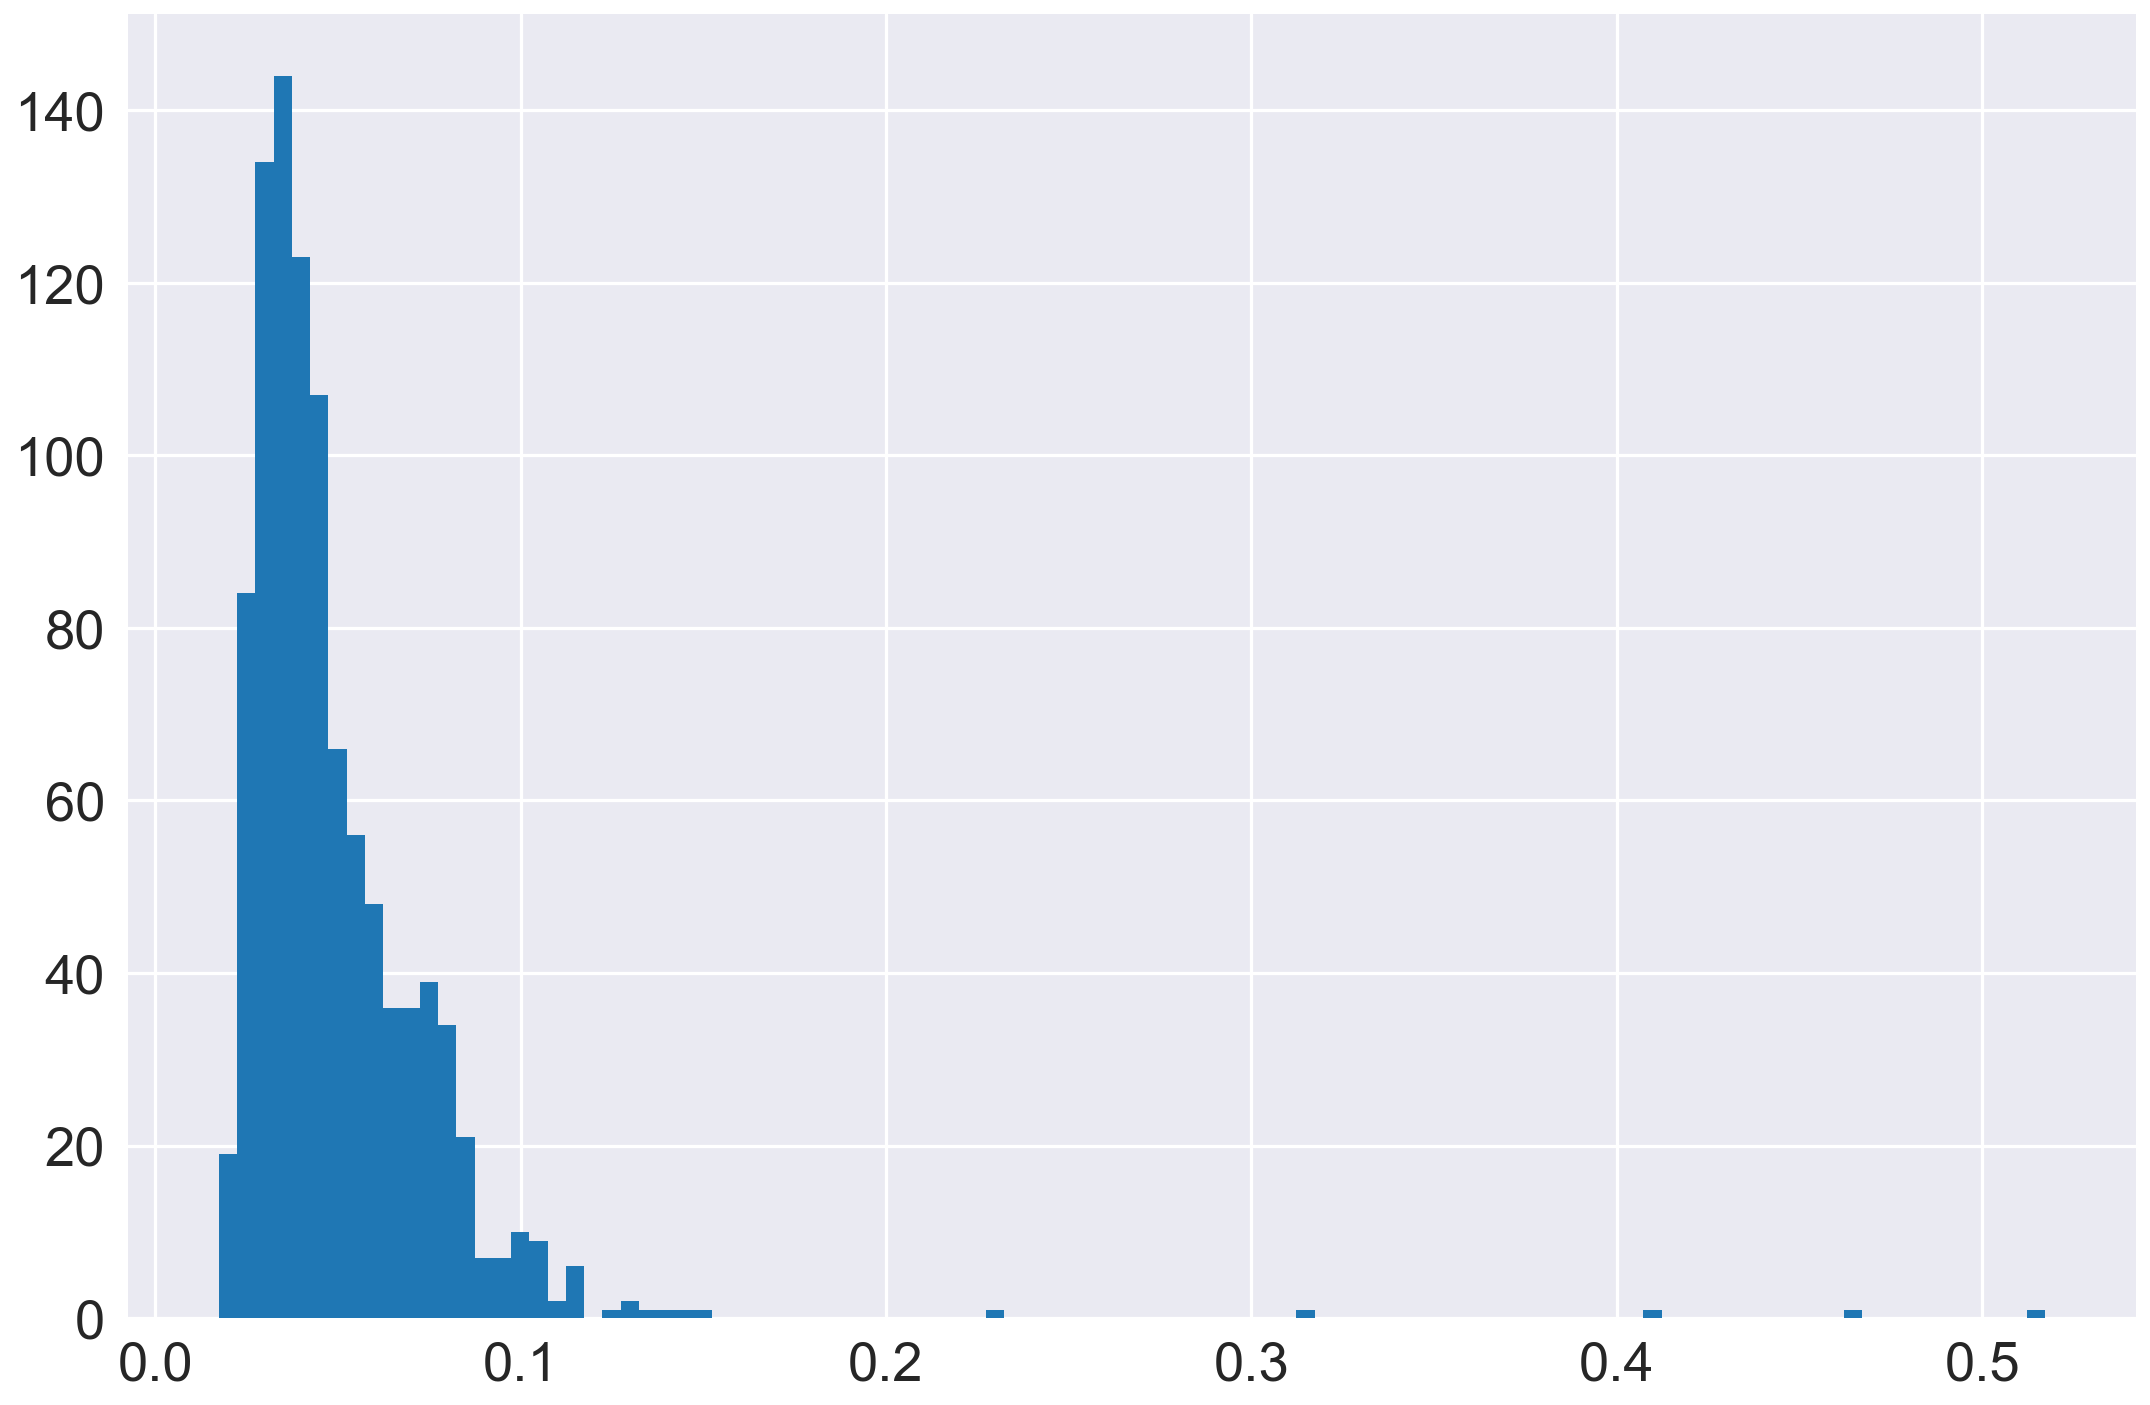

In [10]:
plt.hist(sts,bins=100);

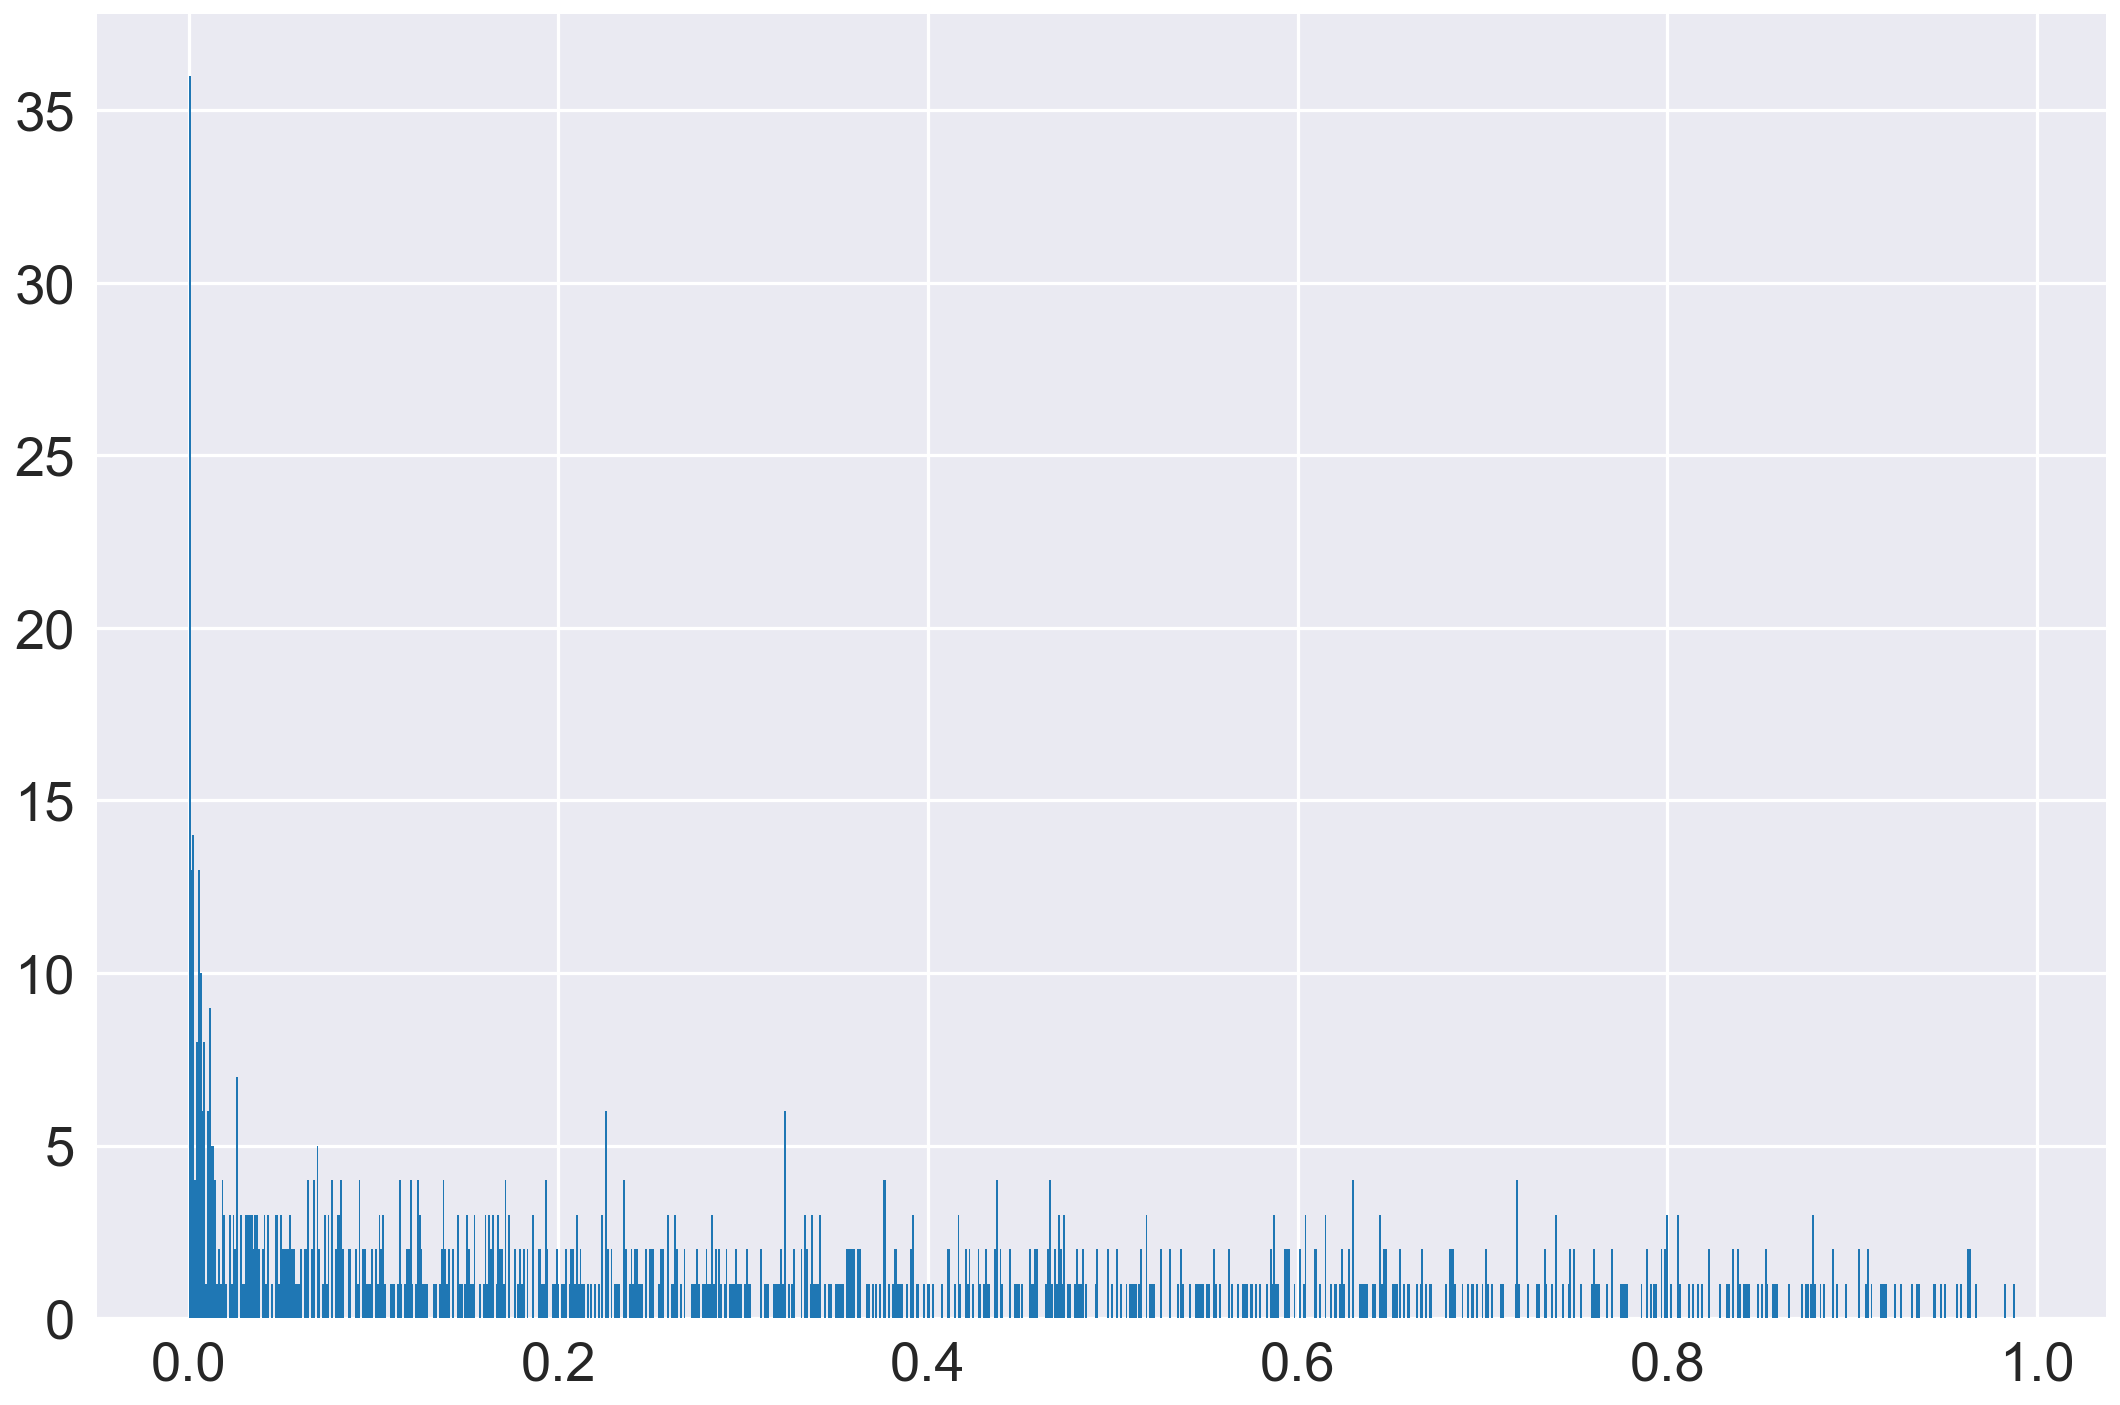

In [12]:
plt.hist(pvalues,bins=1000);

### Star whisker plot at y1

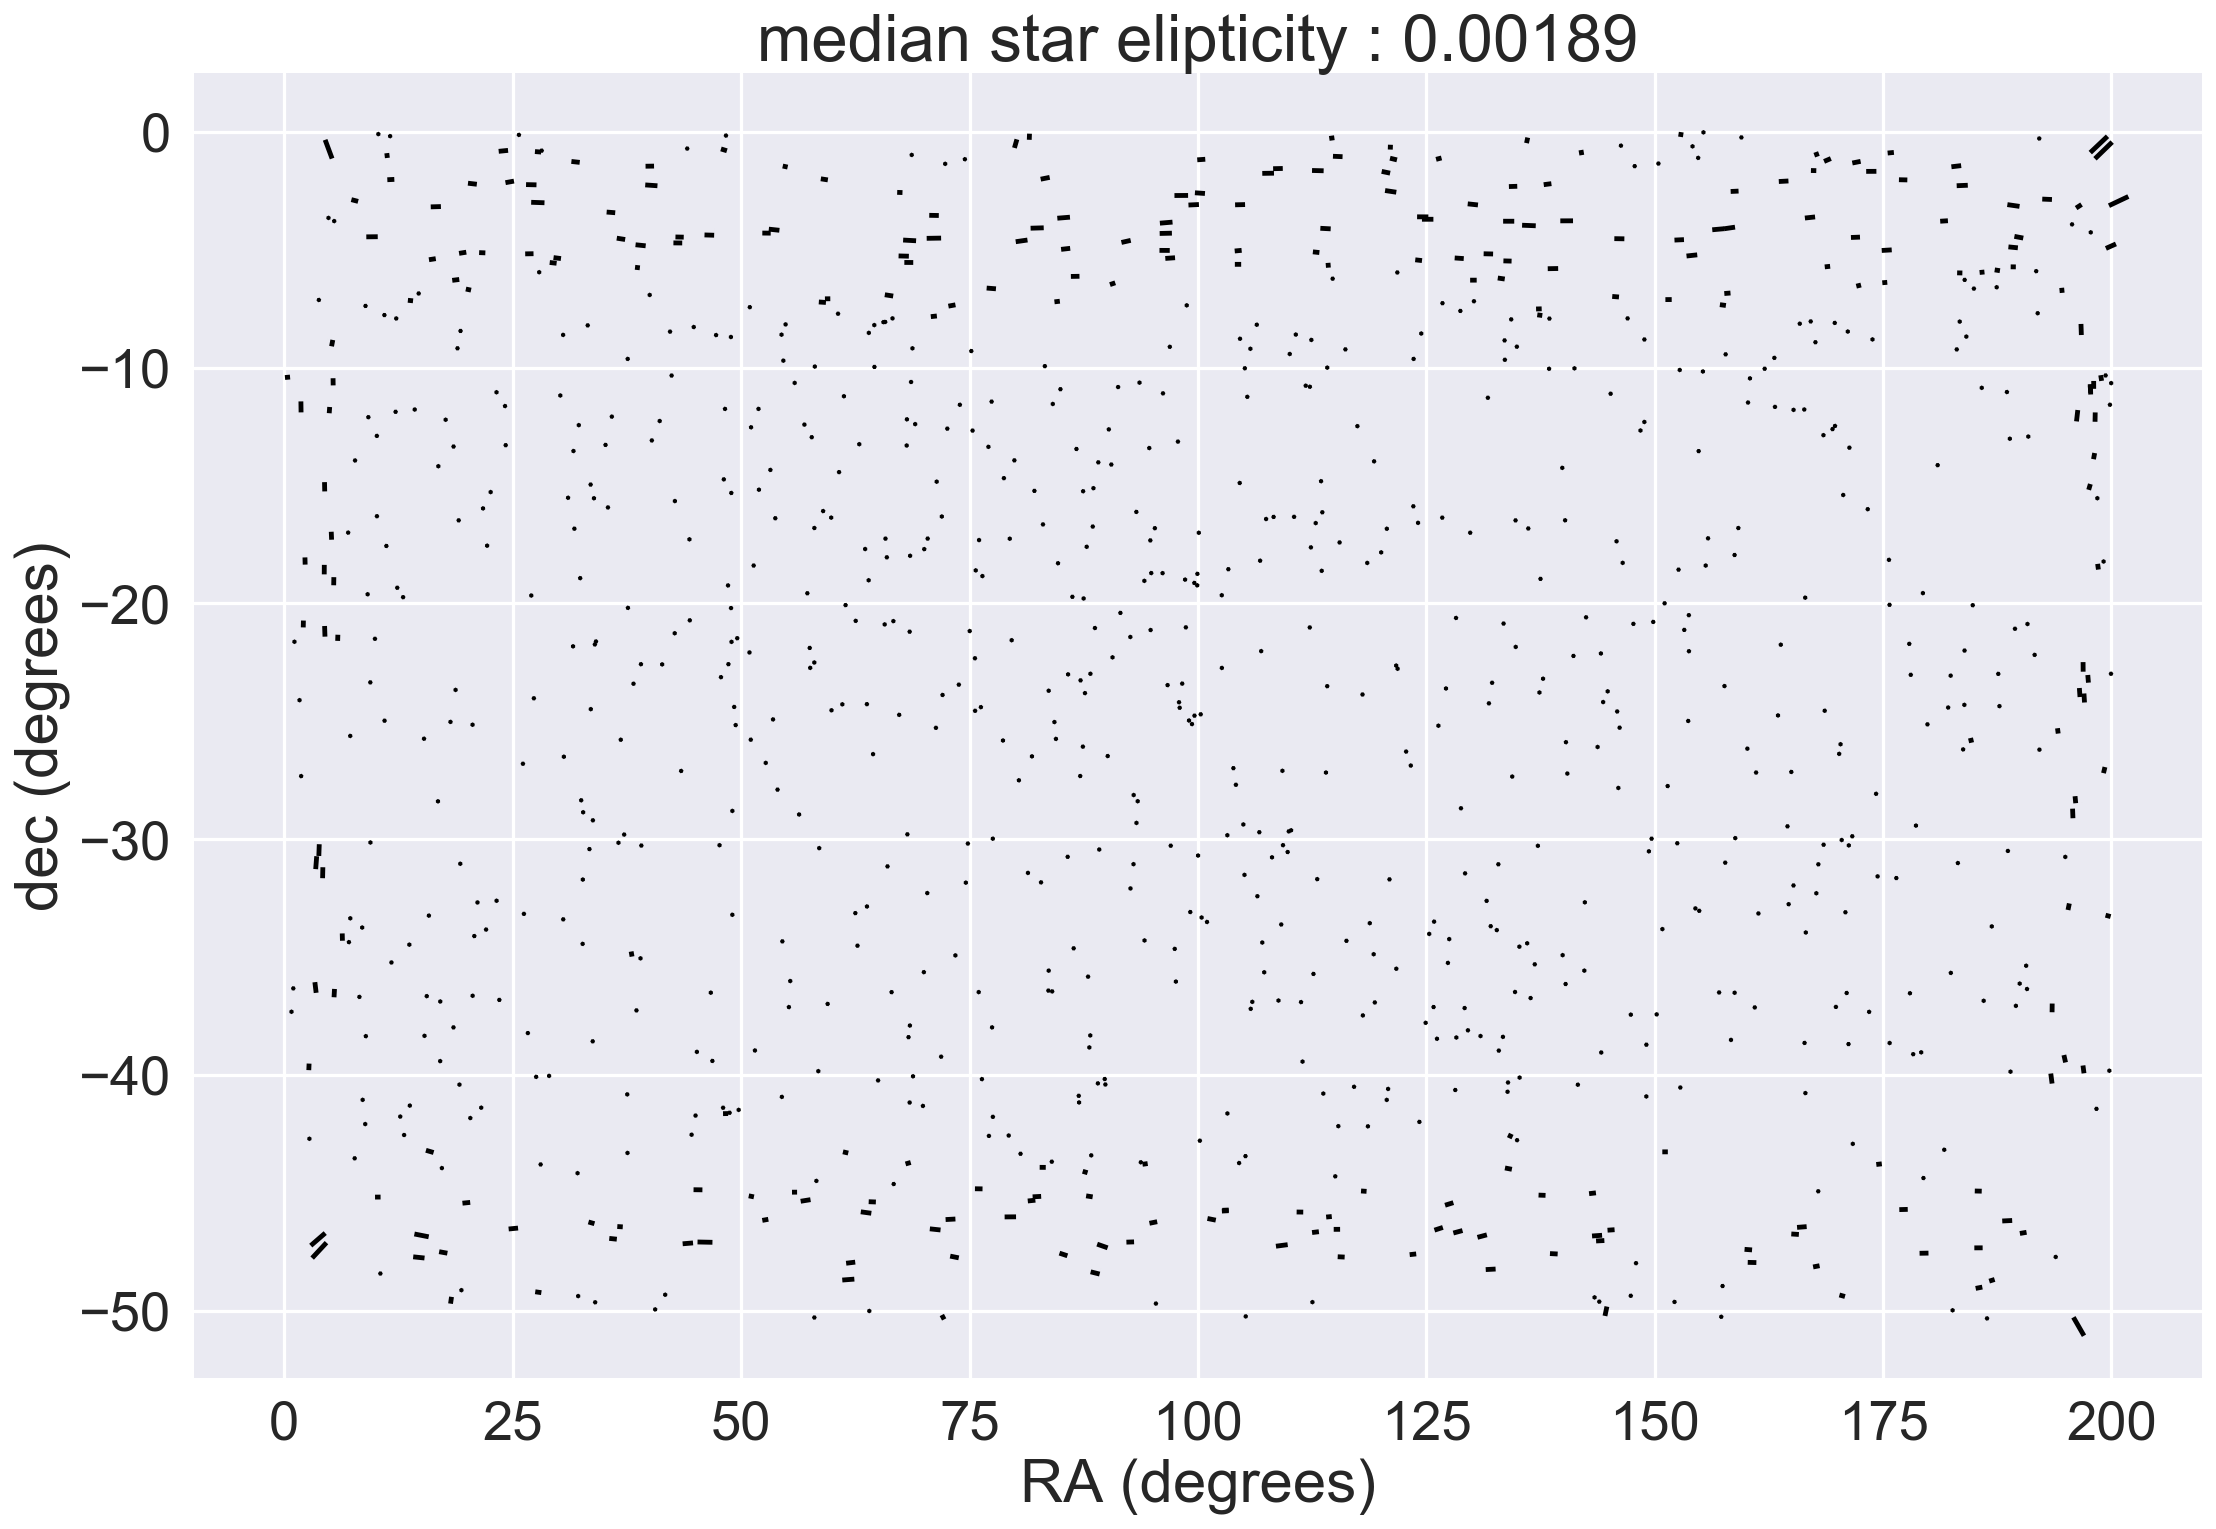

In [57]:
ditherplot(y1.STAR, statistic='median',scale=1)

### Residuals whisker plot at y1

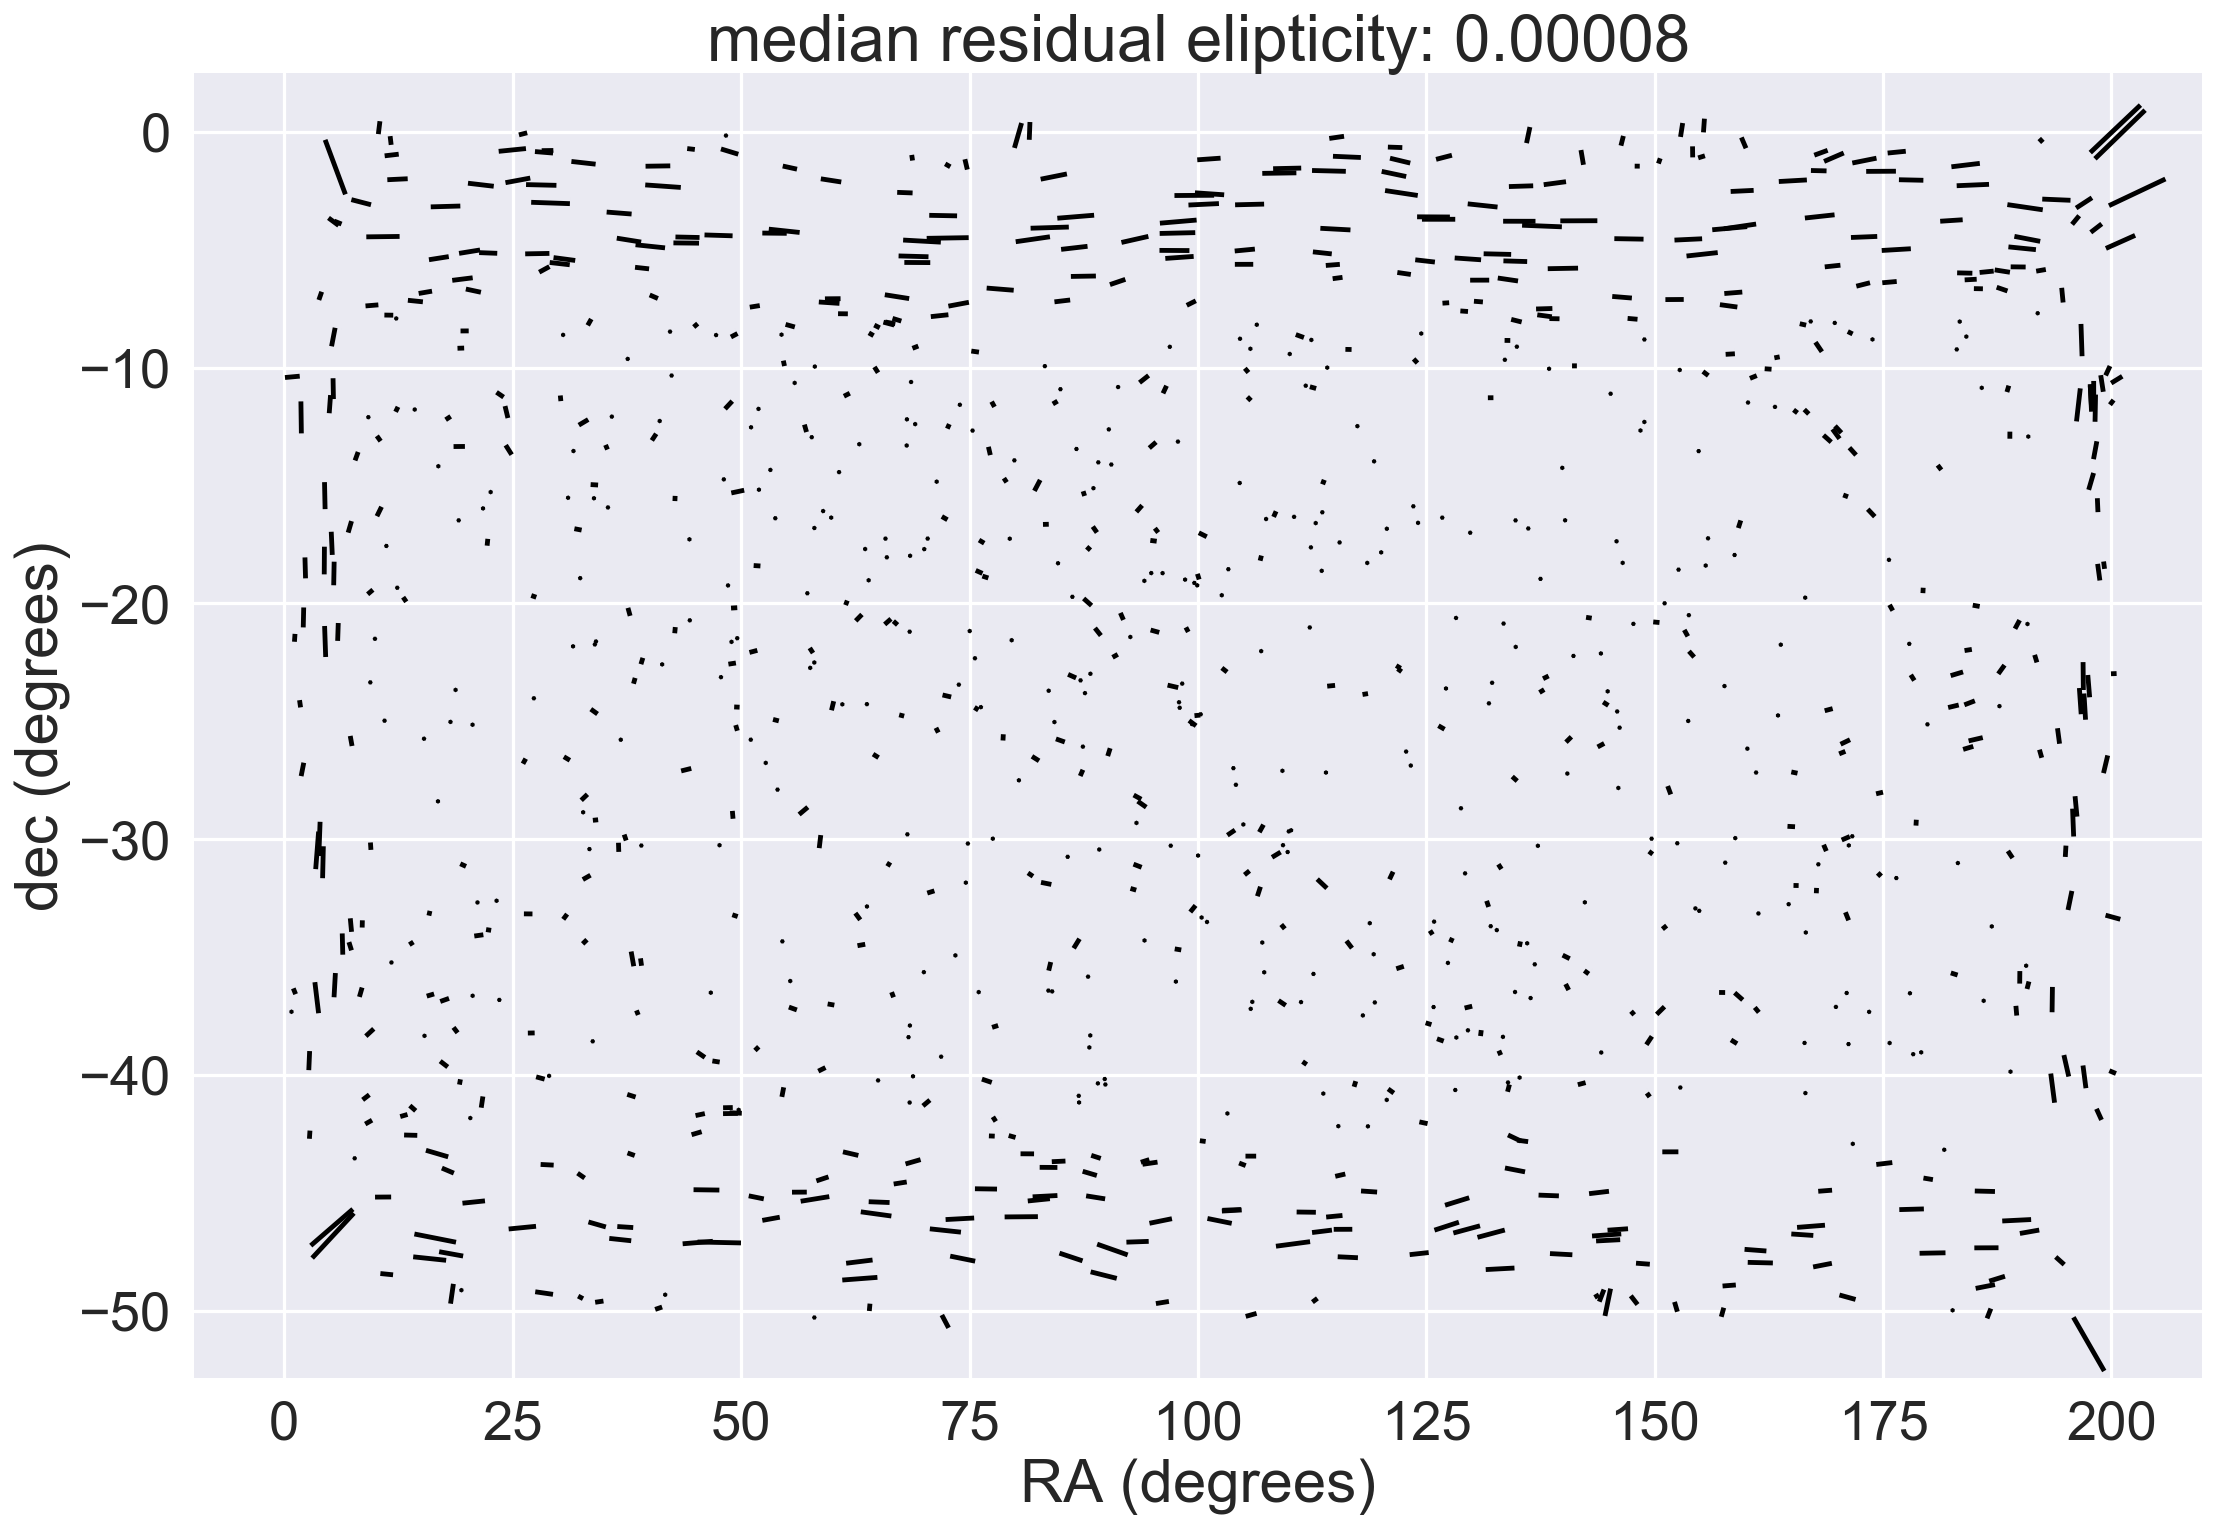

In [58]:
ditherplot(y1.DELTA, statistic='mean',scale=0.01)

In [45]:
y1.DELTA.e.values()==best_case.DELTA.e.values()

True

Text(0.5,1,u'KS-test vs uniform distribution p-values ')

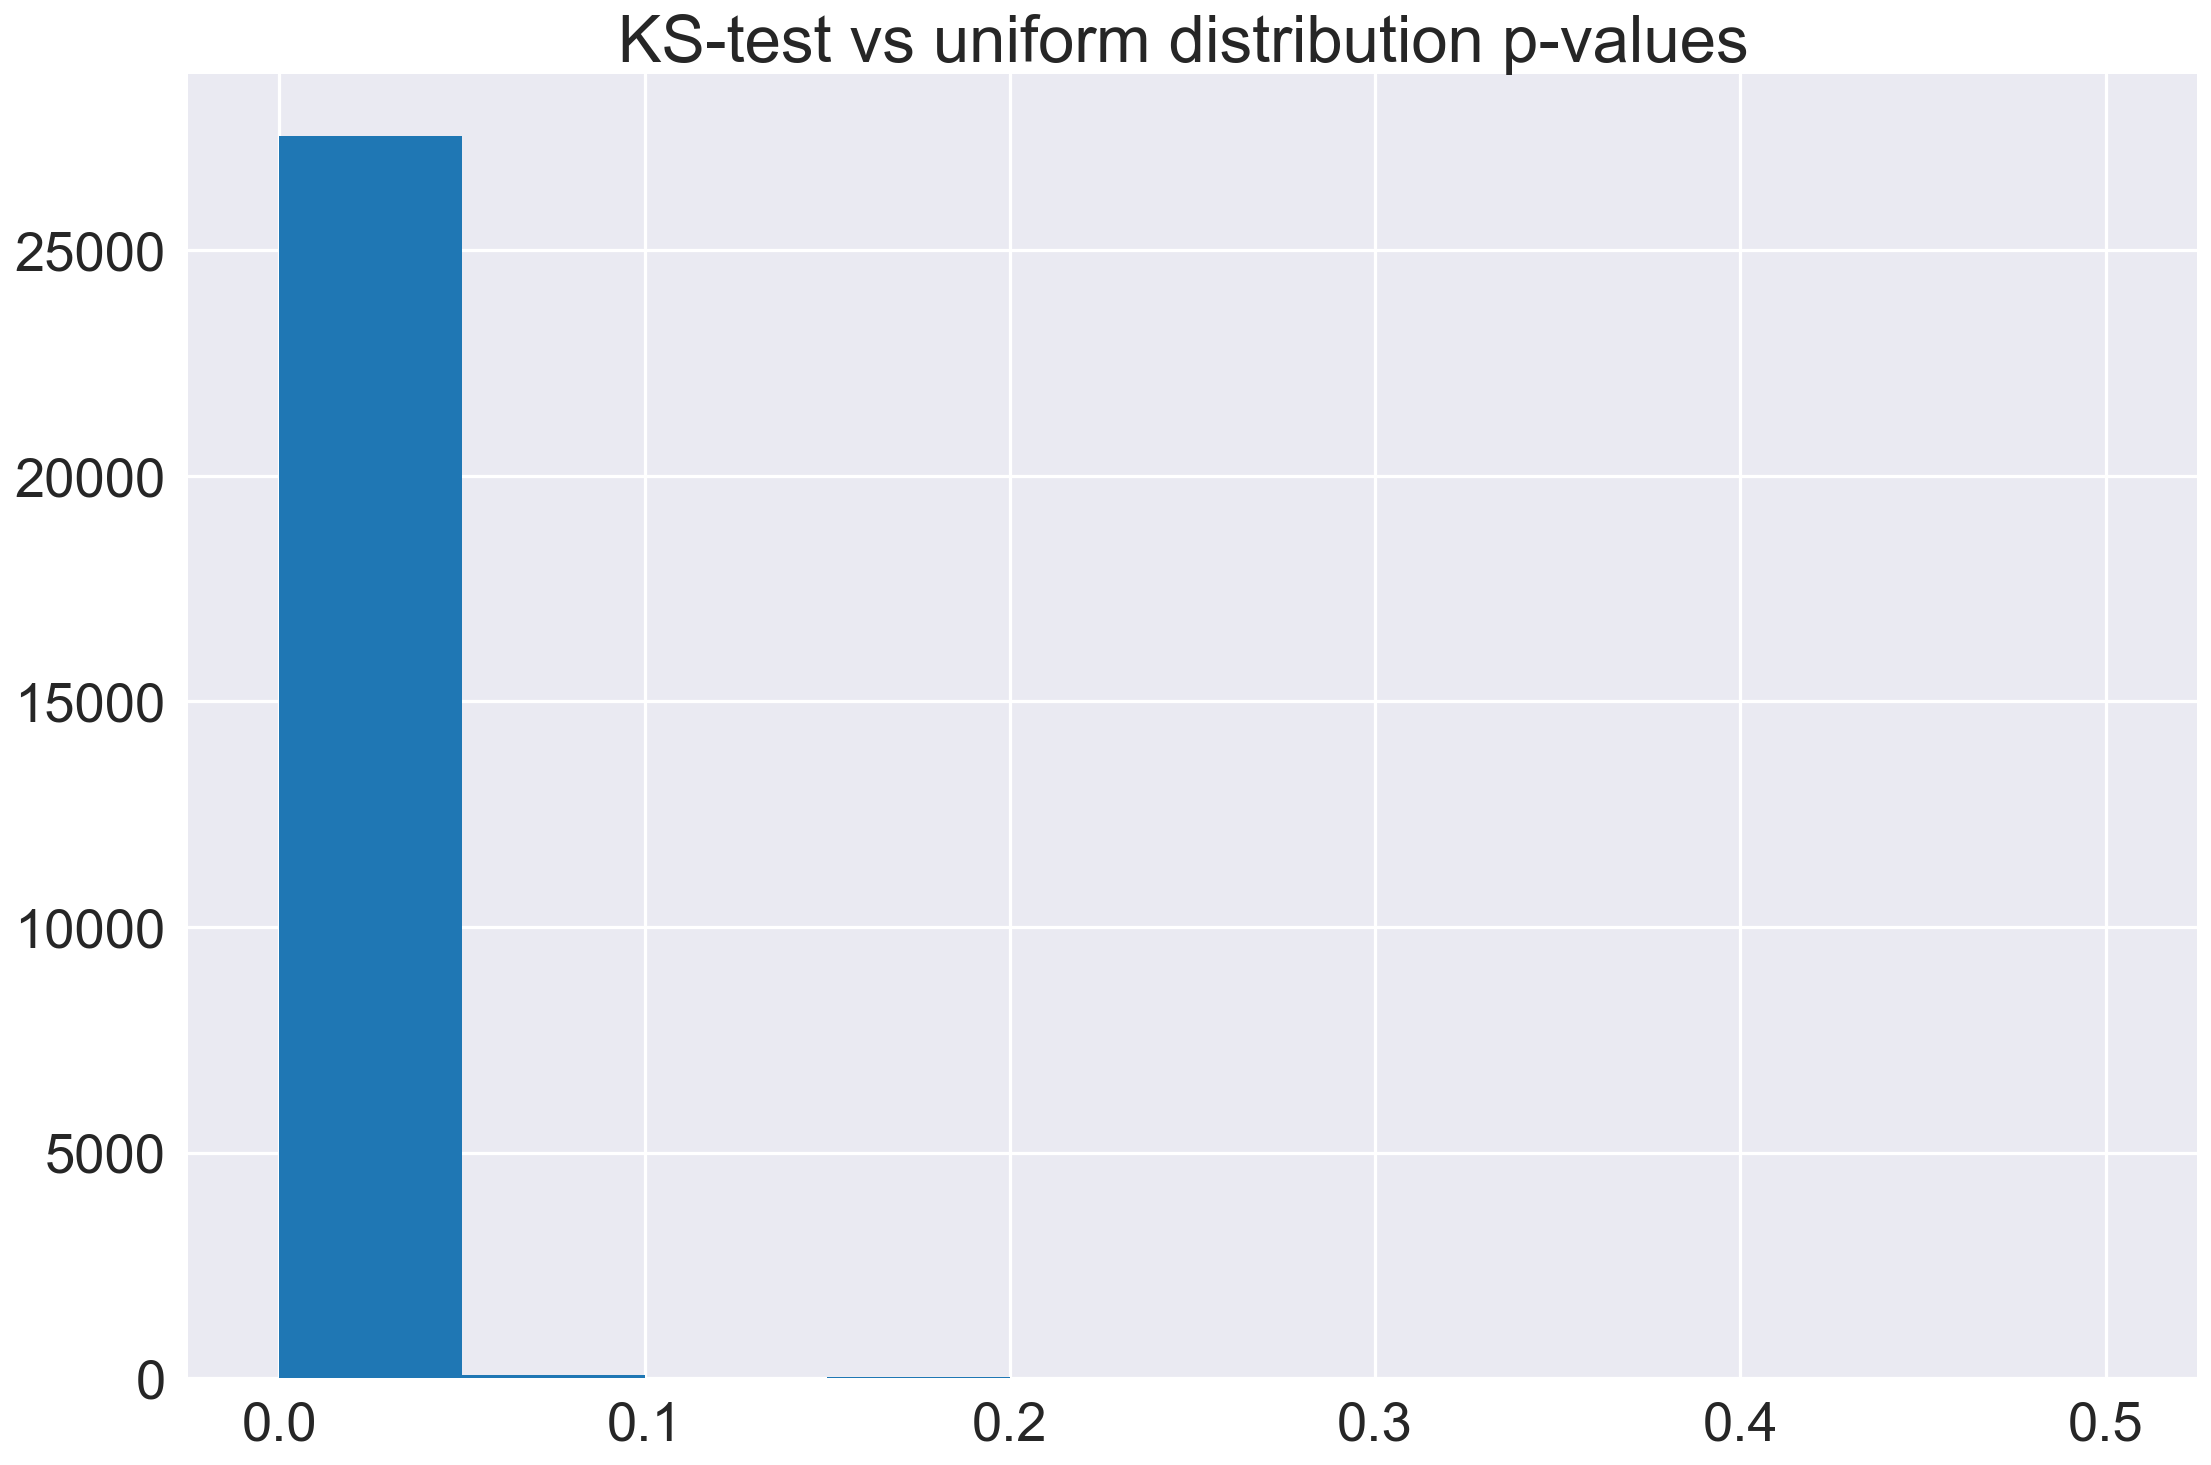

In [91]:
plt.hist(y1.pvalues)
plt.title('KS-test vs uniform distribution p-values ')

Text(0.5,1,u'KS-test statistic')

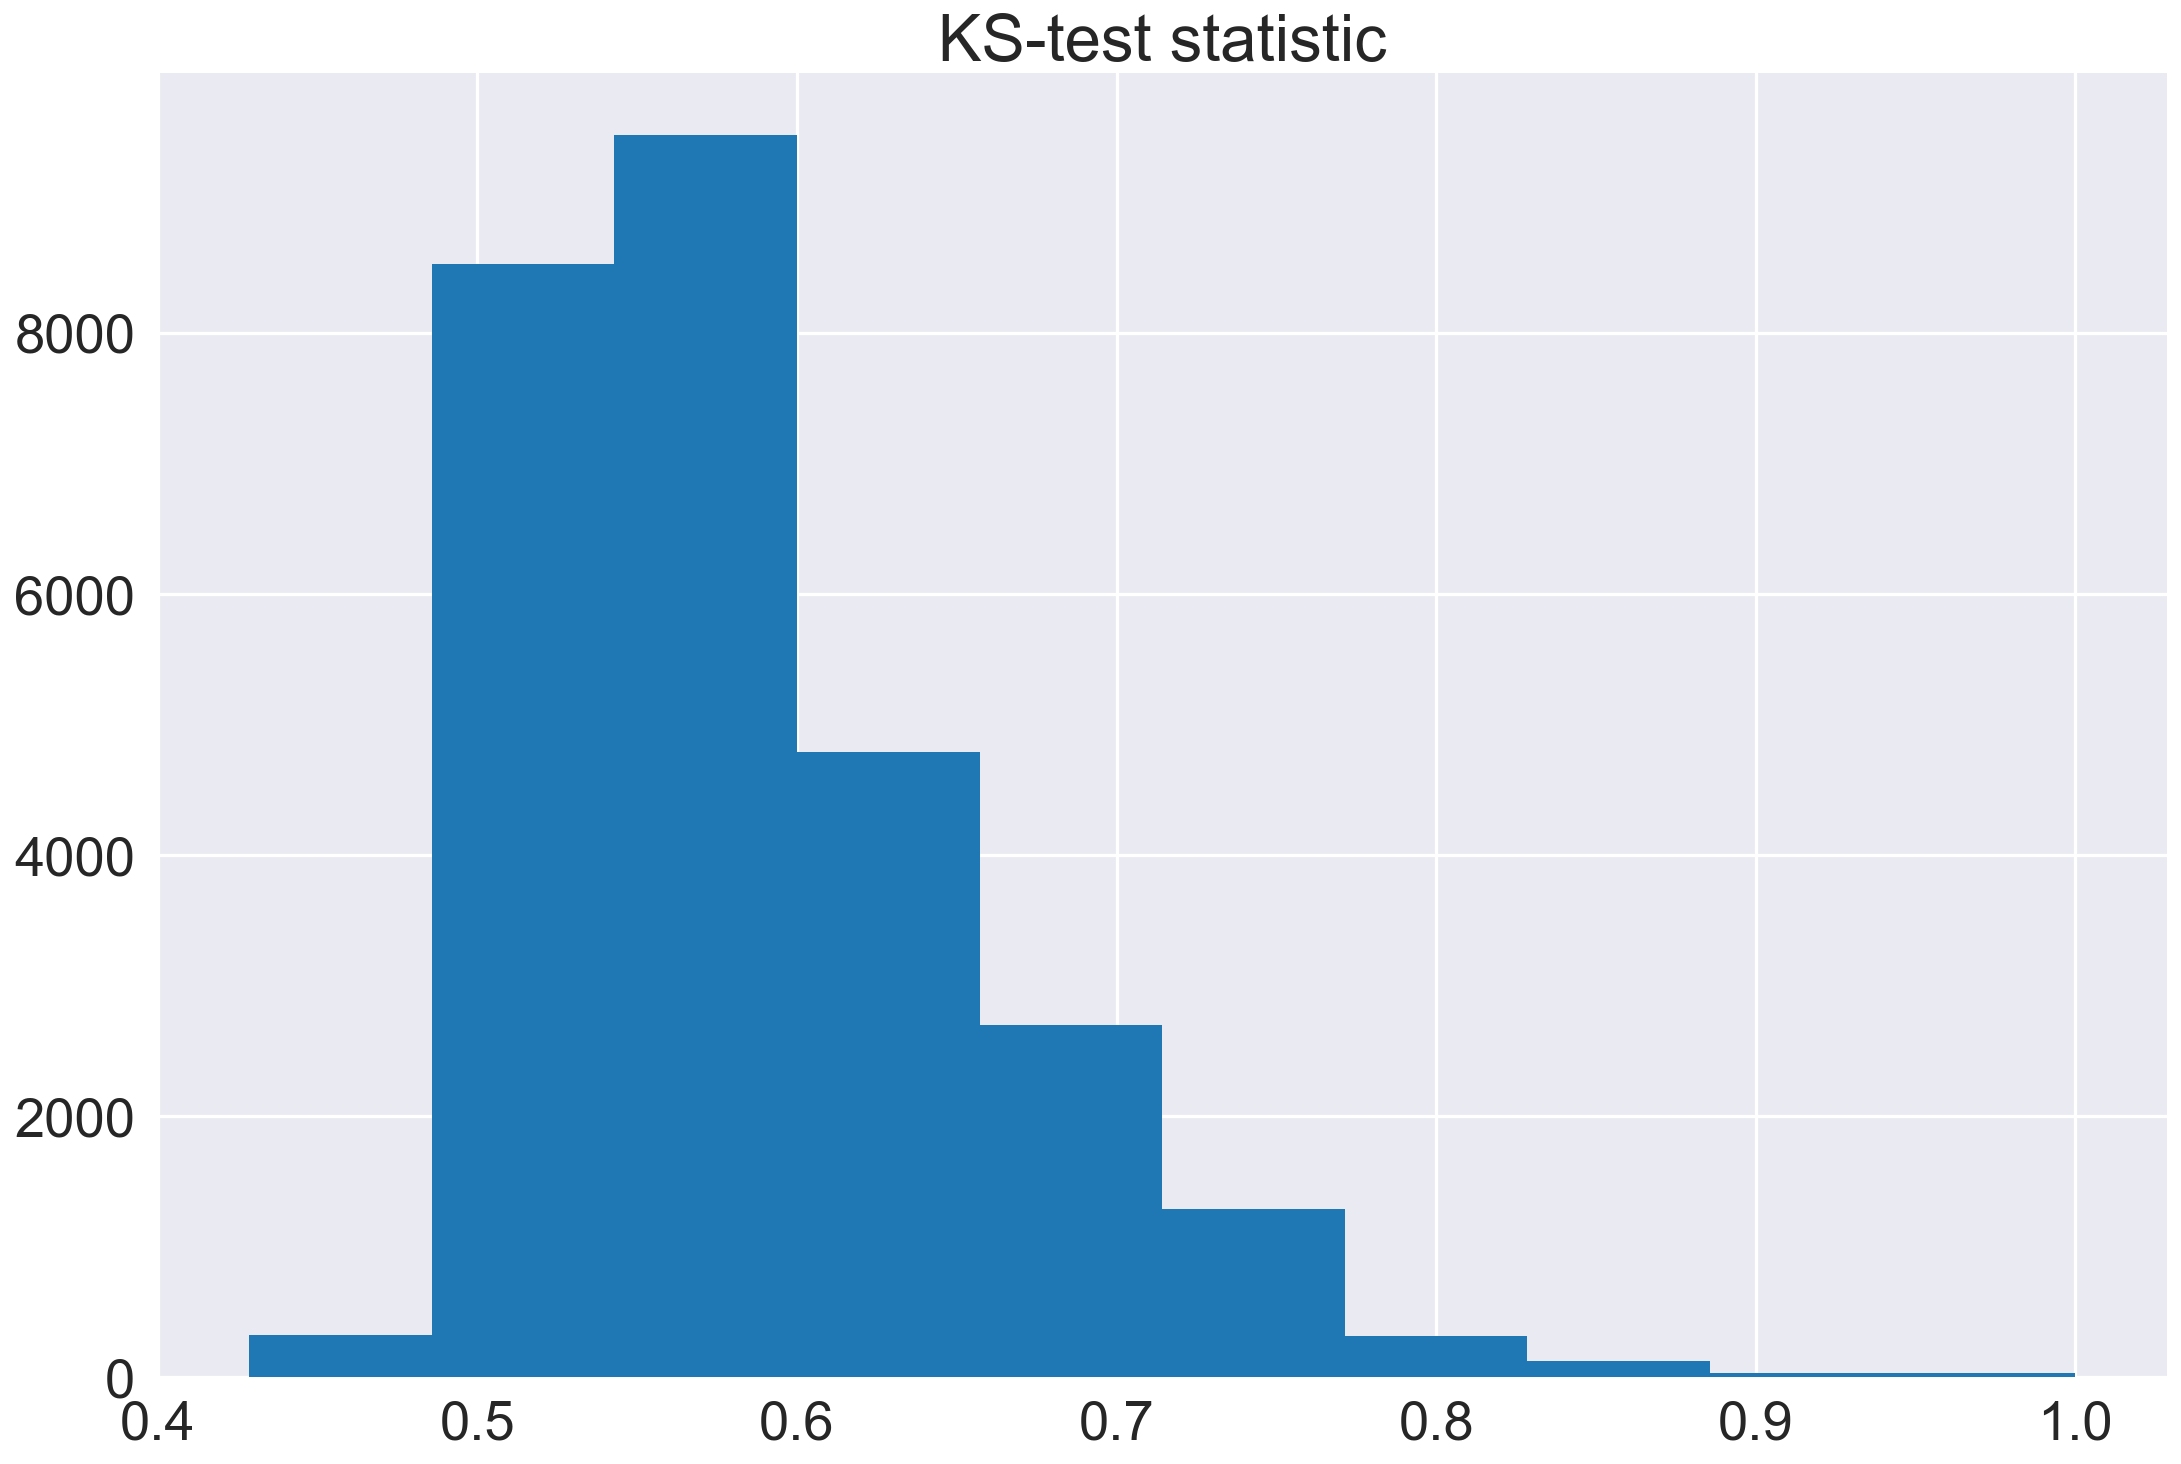

In [23]:
plt.hist(y1.ksstatistic)
plt.title('KS-test statistic')

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:2876: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


(0.001, 50)

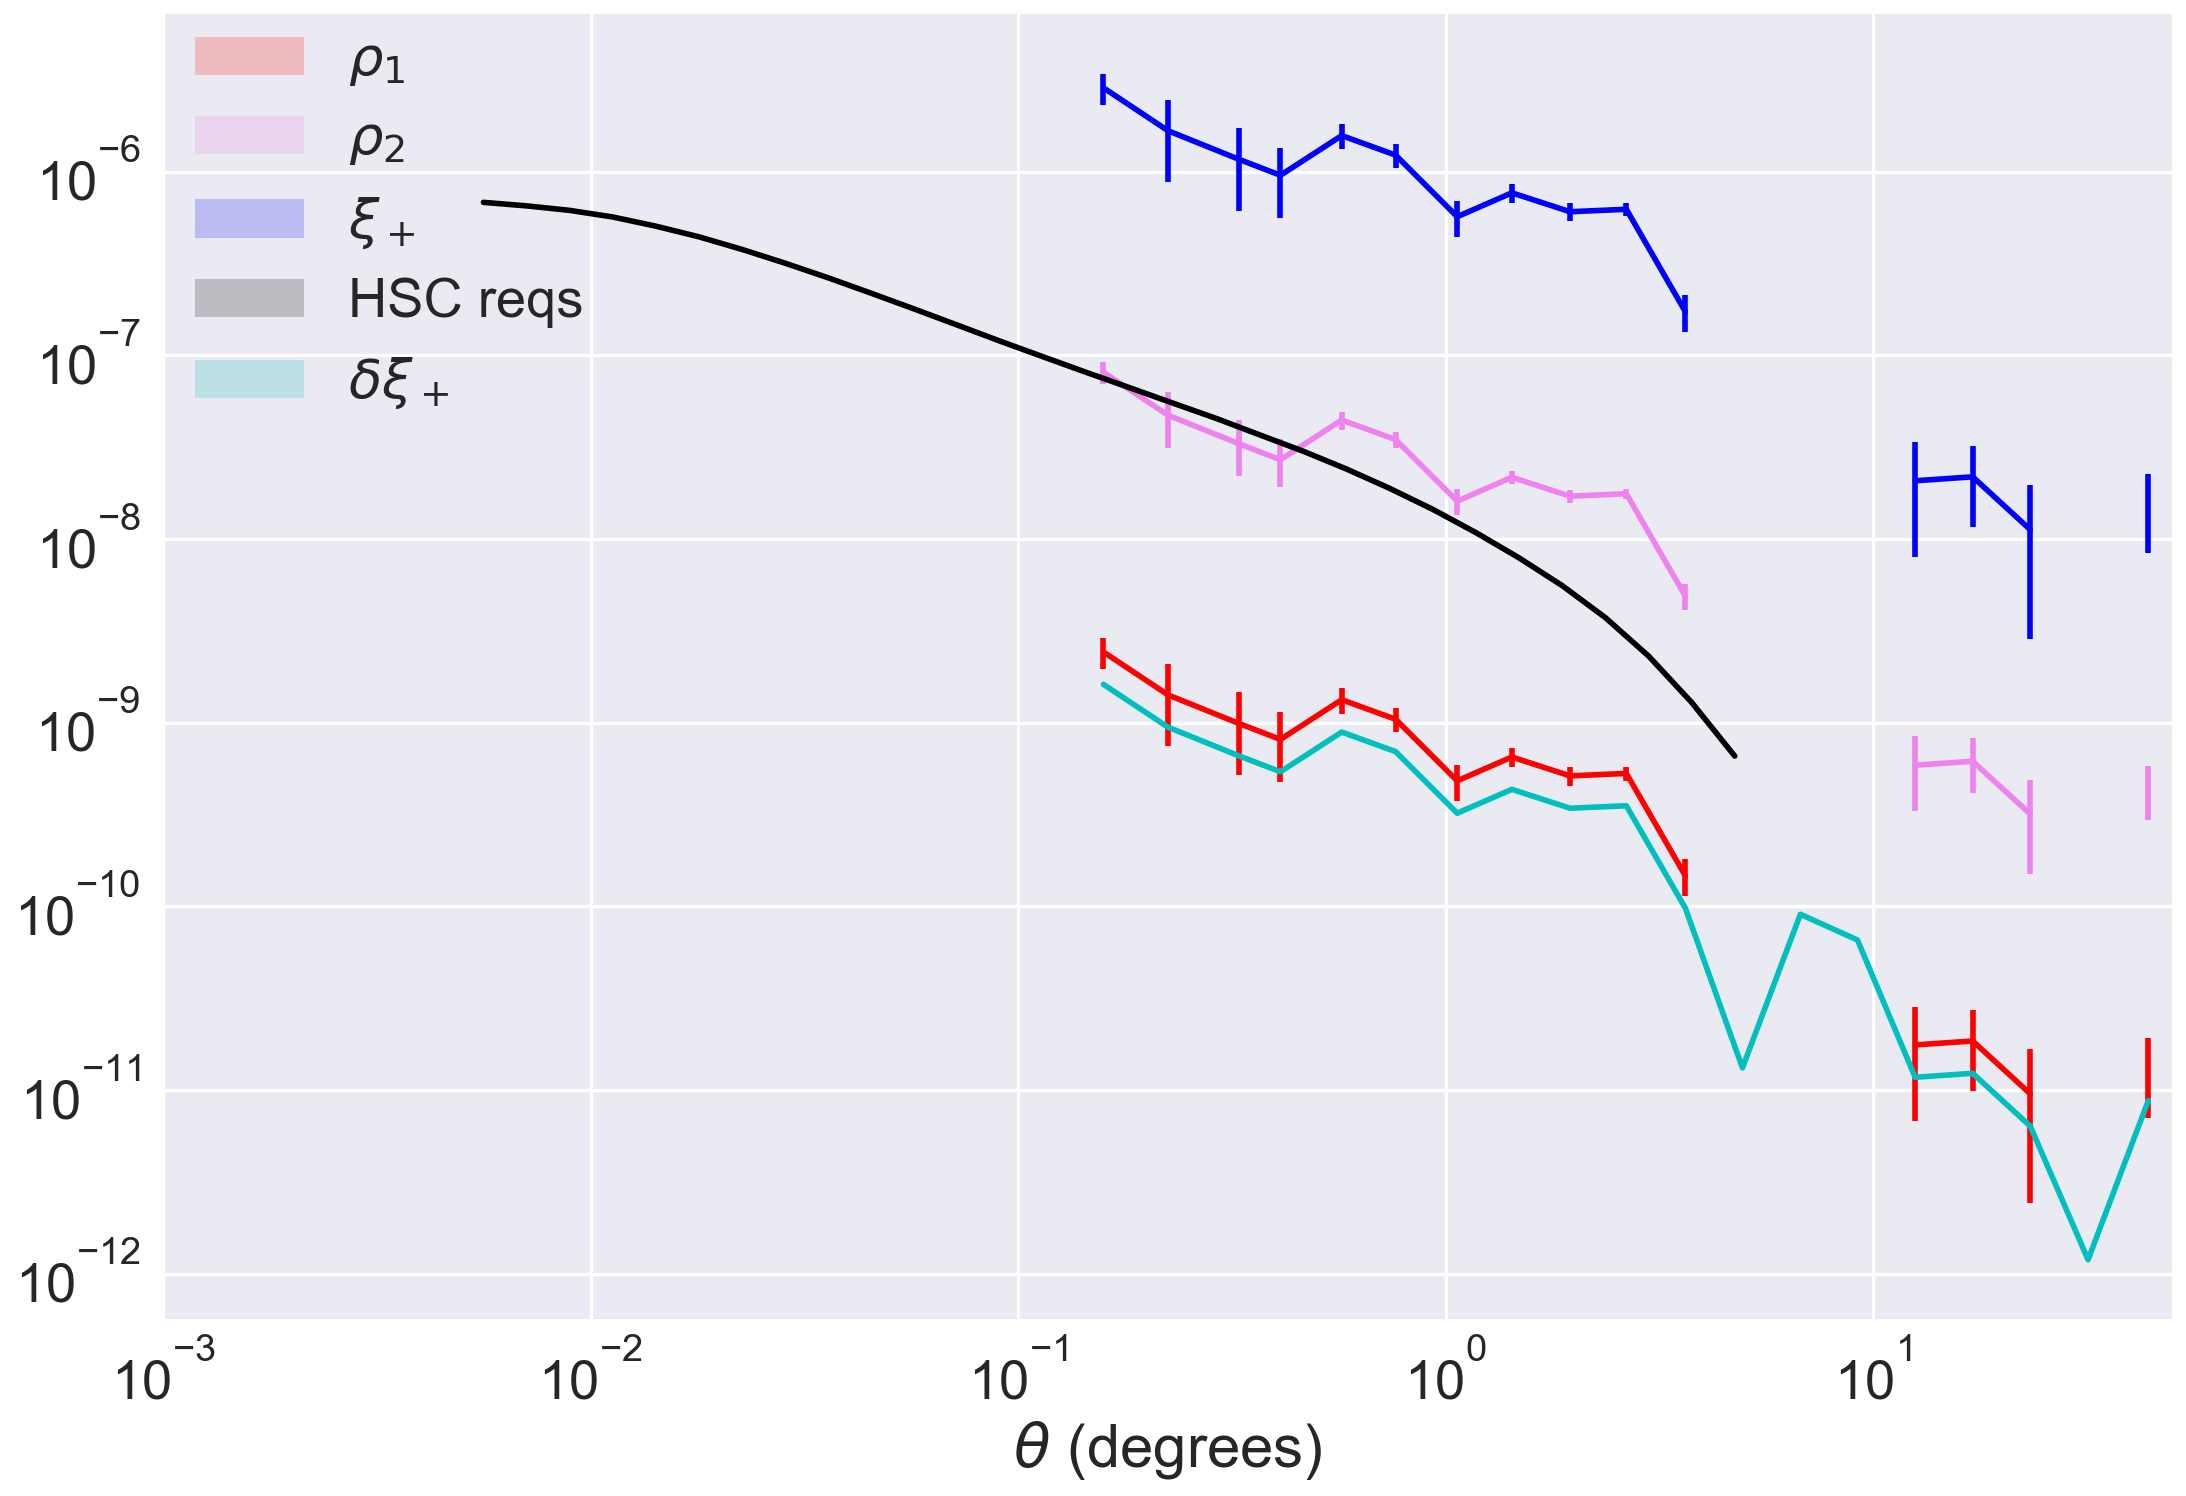

In [34]:
corrplot(y1.r, y1.rho1, y1.rho1_sigma,color='r',scale='log')
corrplot(y1.r, y1.rho2, y1.rho2_sigma,color='violet',scale='log')
corrplot(y1.r, y1.xip, y1.xip_sigma,color='b',scale='log')
corrplot(r2d(1)*y1.reqs_r, y1.rho134_reqs, color='black',scale='log')
corrplot(y1.r, abs(y1.delta_xip), color='c')
plt.legend([r'$\rho_1$',r'$\rho_2$',r'$\xi_+$',r'HSC reqs',r'$\delta \xi_+$'],bbox_to_anchor=(0.22, 1), loc='upper right', borderaxespad=0.)
plt.xlim((0.001, 50))


### How much better is $\rho_1$ at y10 than y1?

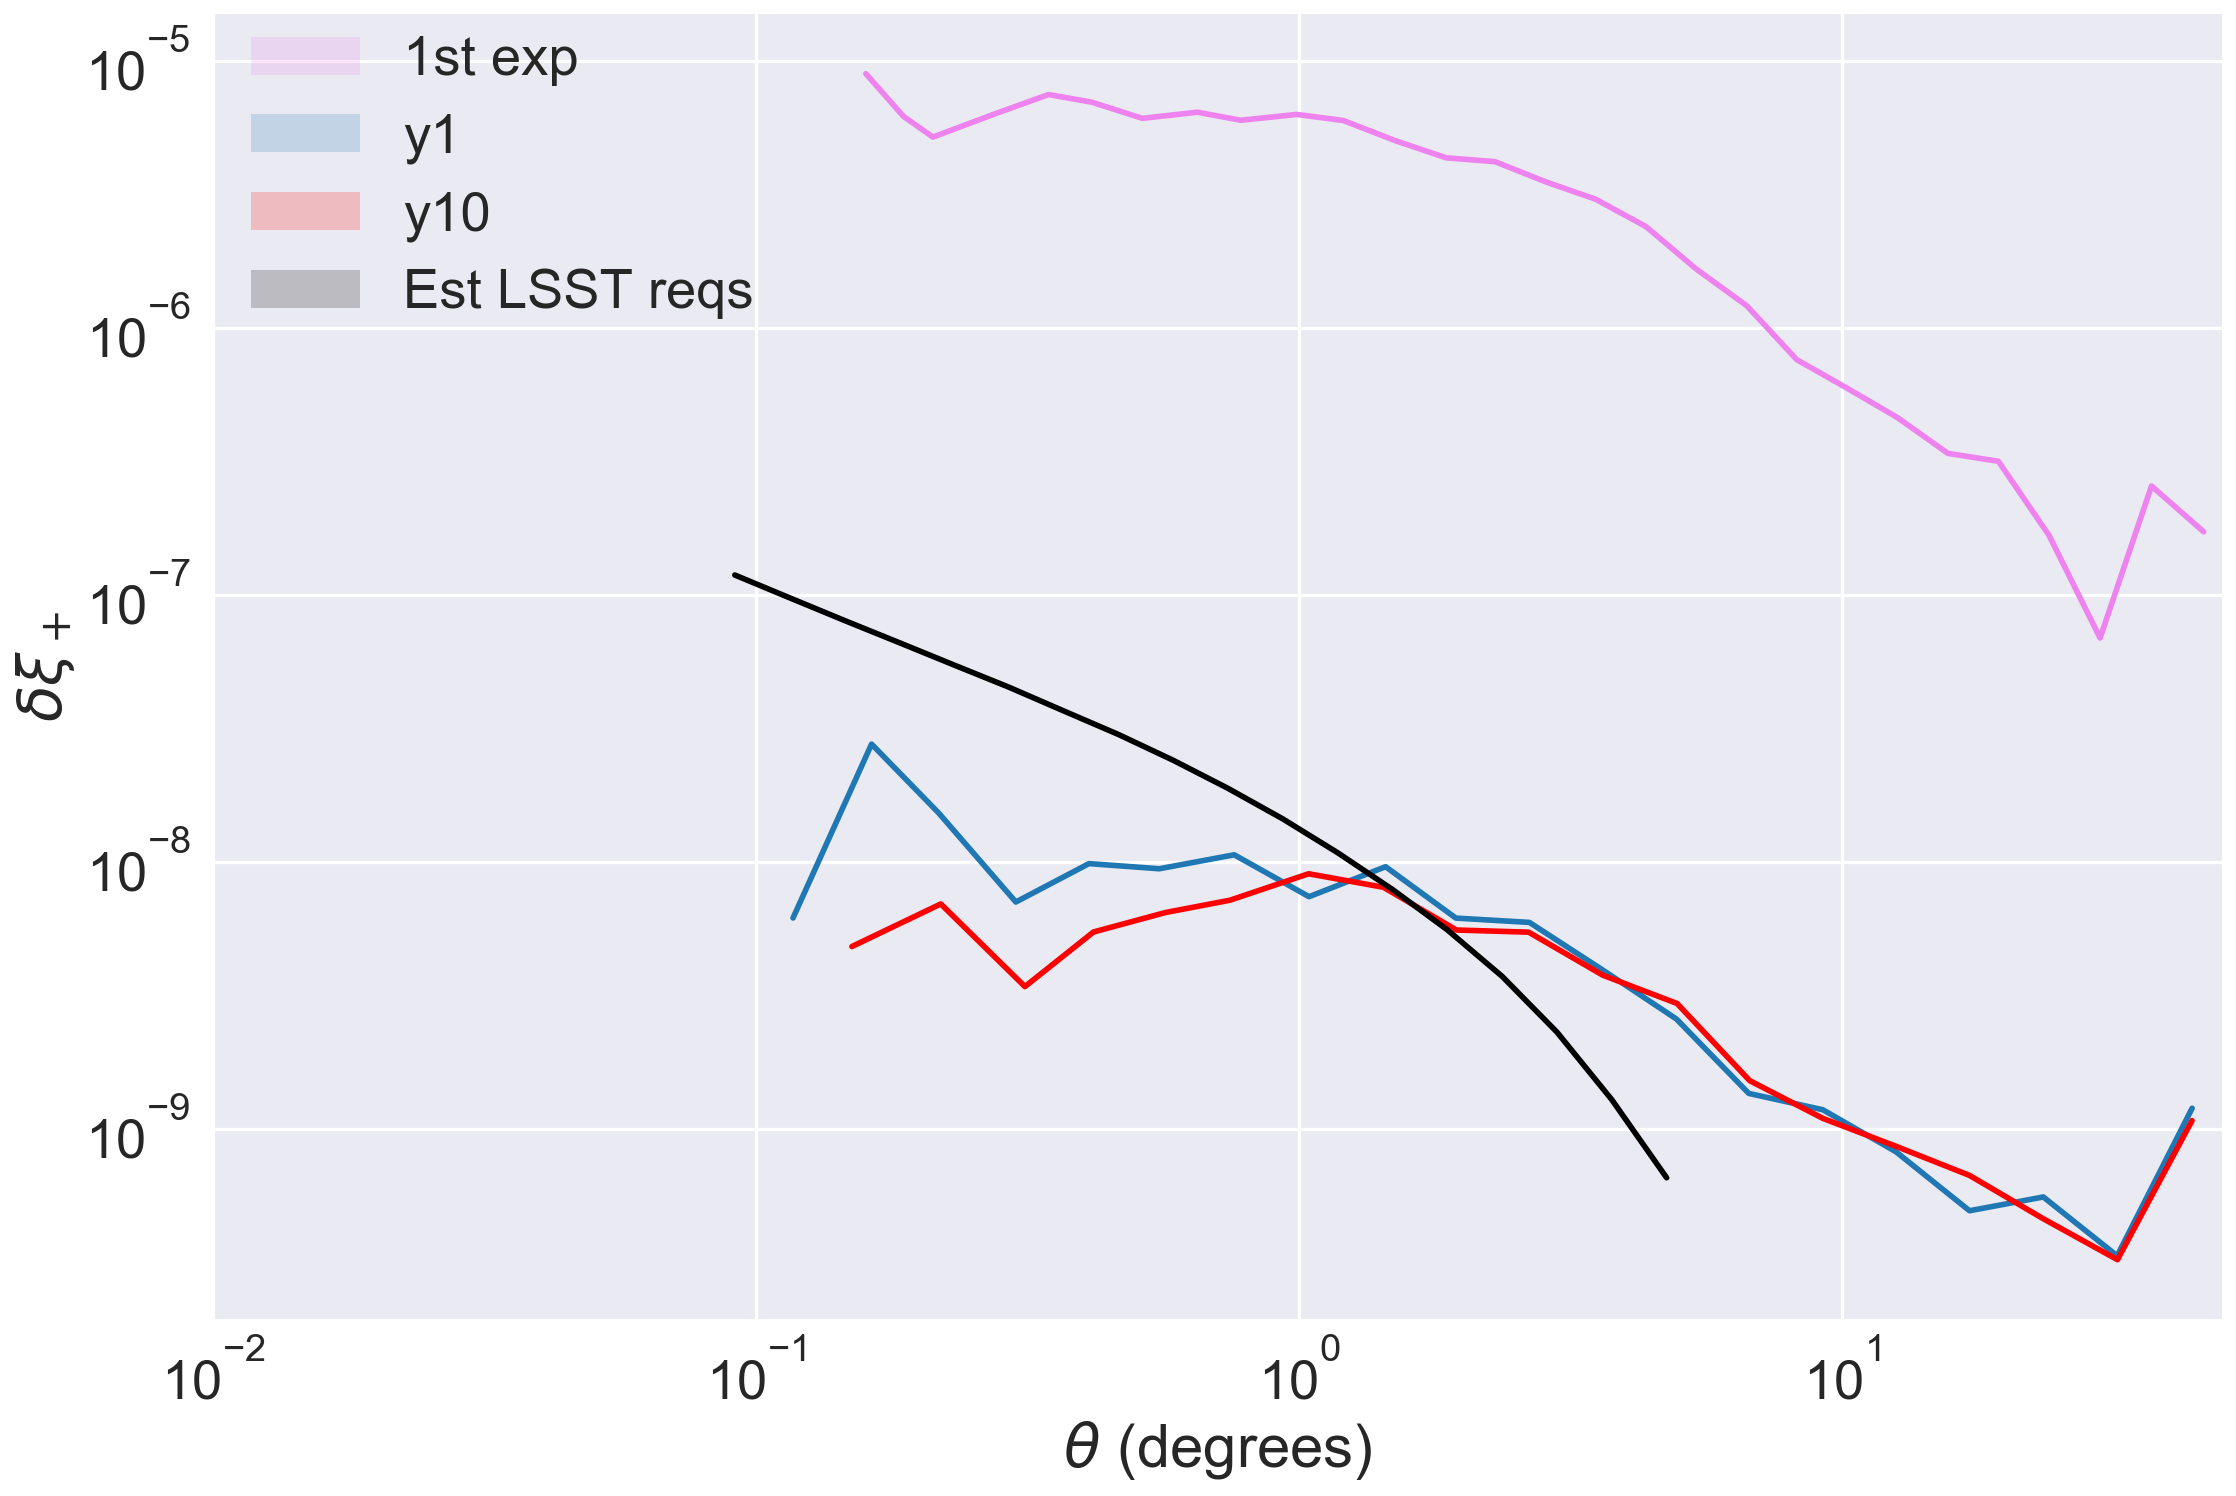

In [127]:
sns.tsplot(abs(worst_case.delta_xip), worst_case.r,color='violet')
sns.tsplot(abs(y1.delta_xip),y1.r)#,err_style='std_bars')
sns.tsplot(abs(best_case.delta_xip),best_case.r,color='r')#,err_style='std_bars')
sns.tsplot(abs(best_case.rho134_reqs[12:]),r2d(1)*best_case.reqs_r[12:],color='black')
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel(r'$\delta \xi_+$')
plt.xscale('log')
plt.yscale('log')
# plt.title(r'\')
plt.xlim((0.01,50))
plt.legend([r'1st exp',r'y1',r'y10',r'Est LSST reqs'],bbox_to_anchor=(0.28, 1), loc='upper right', borderaxespad=0.)

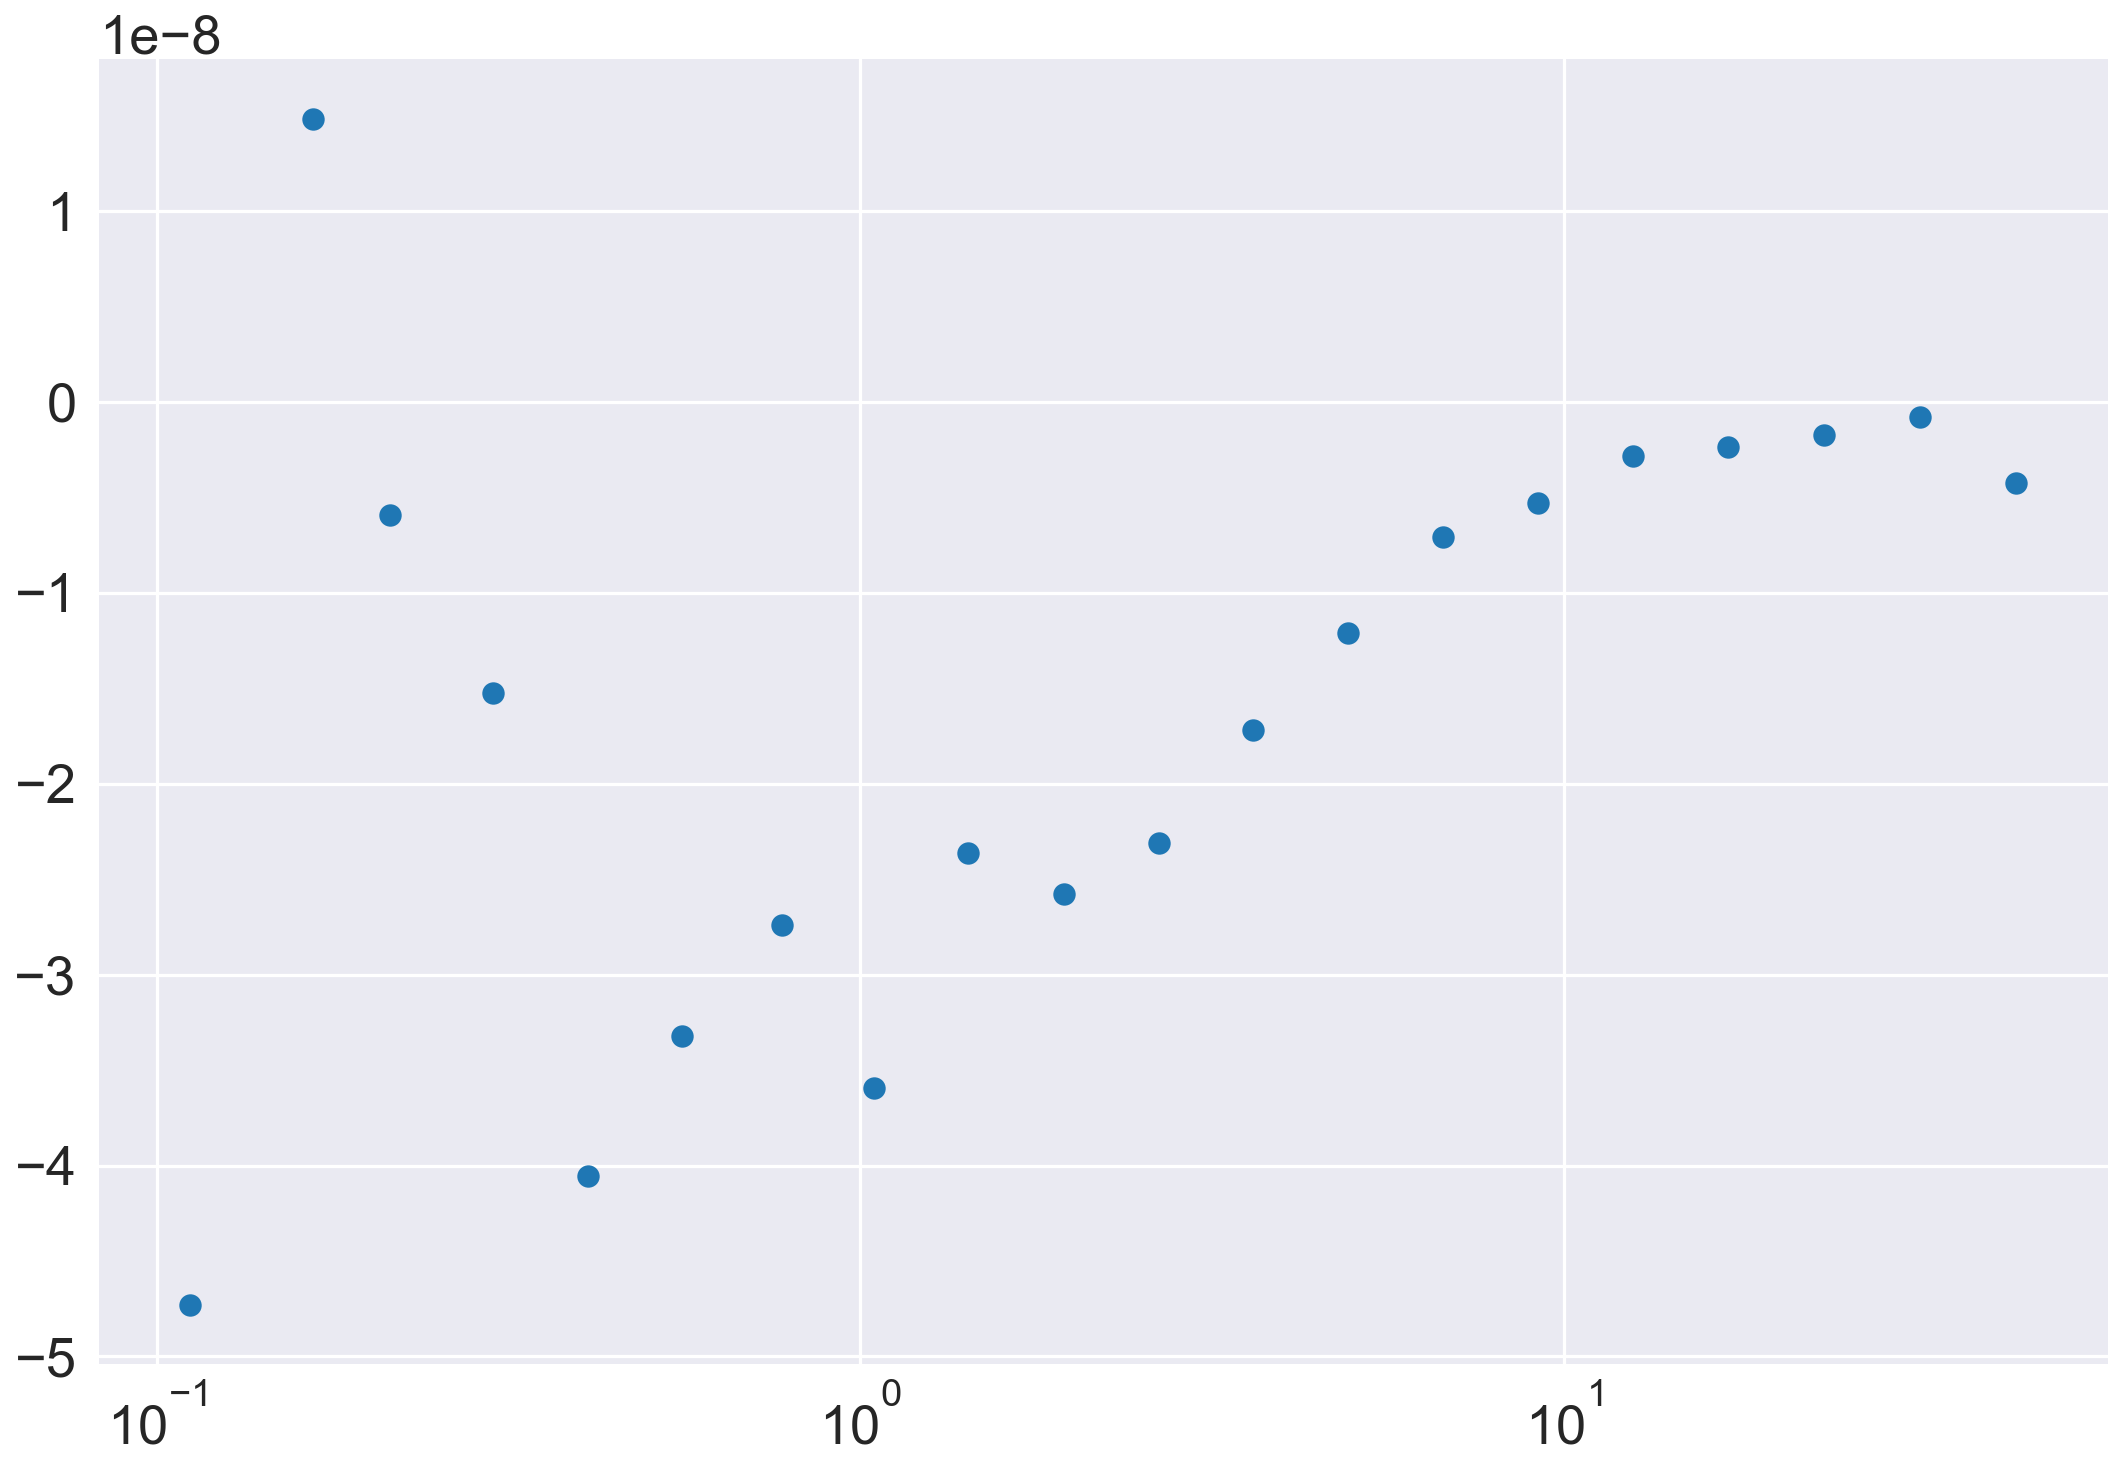

In [193]:
delta_xip = y1.delta_xip

plt.plot(y1.r,delta_xip,'o')
plt.xscale('log')
# plt.yscale('symlog')
# plt.yscale('log')

## Finally, doing the same but for 1st exposures only:

In [42]:
worst_case = ModelErrors('radial',True)

In [43]:
%%time
worst_case.process(sqlWhere='filter = "r" and night < 1000 and fieldRA < %f and fieldDec > %f and fieldRA > 0 and fieldDec < 0' % (np.radians(200), np.radians(-50)))

getting the dither positions from the database
number of stars dither positions:  67110
creating the models at every dither, this will take a while


KeyboardInterrupt: 

## Star whisker plot at 1st exposures

Text(0,0.5,u'dec (degrees)')

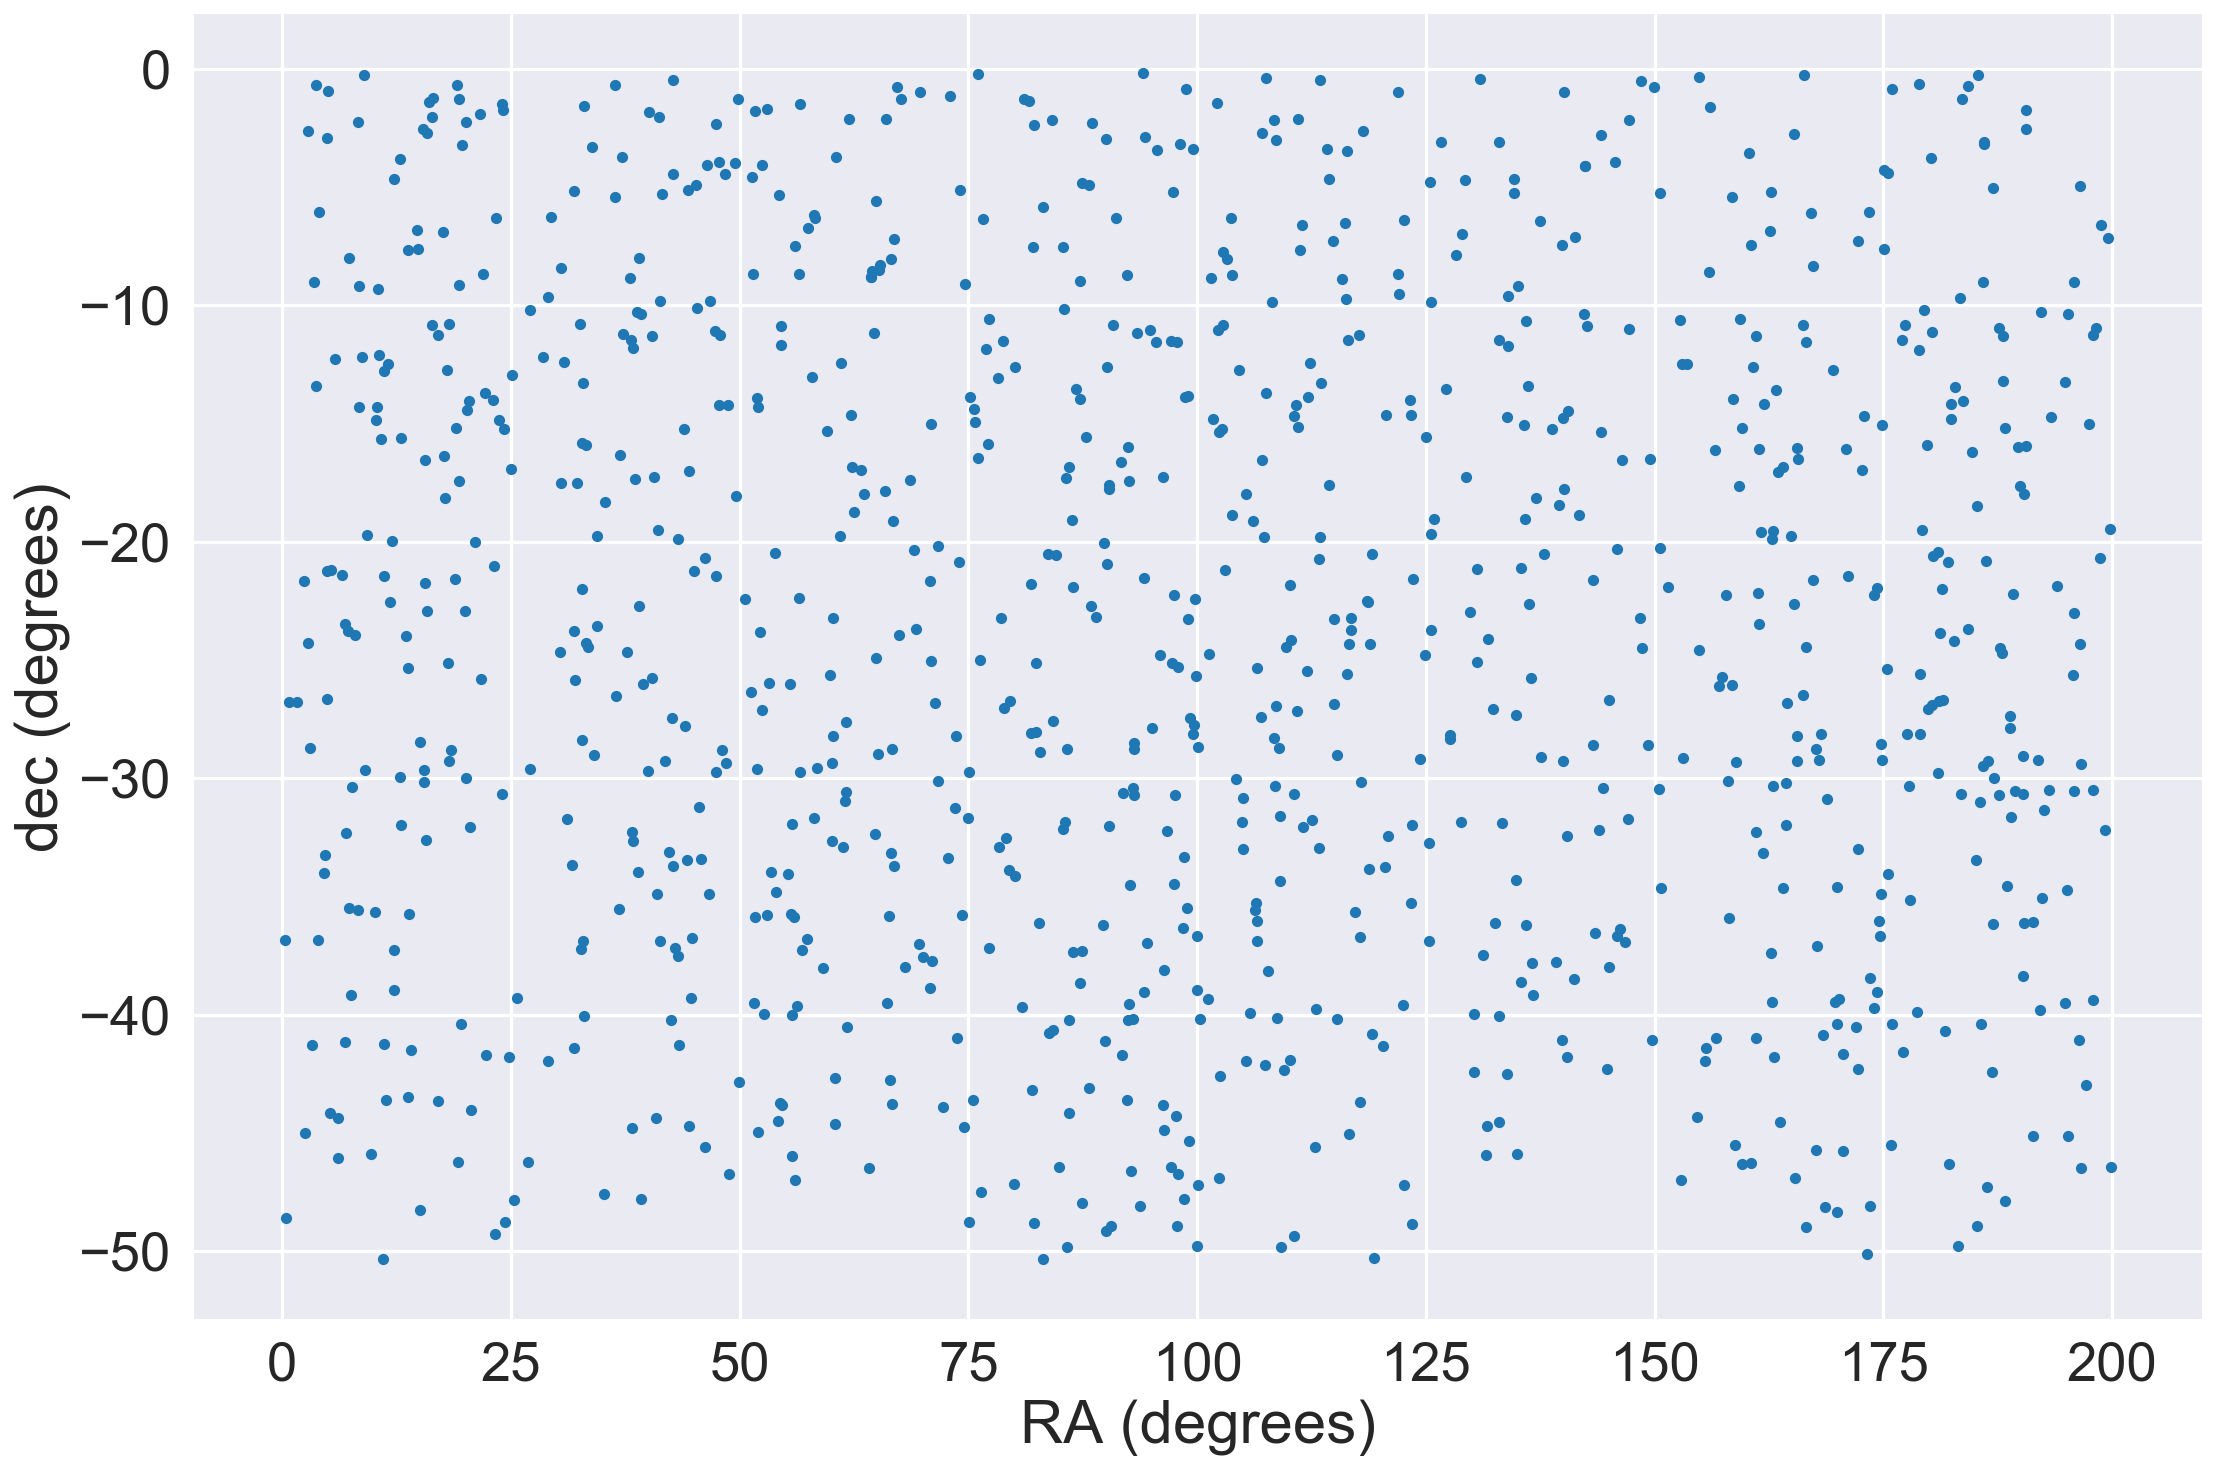

In [10]:
plt.plot(worst_case.stars[:,0]*r2d(1),worst_case.stars[:,1]*r2d(1),'.')
plt.xlabel('RA (degrees)')
plt.ylabel('dec (degrees)')

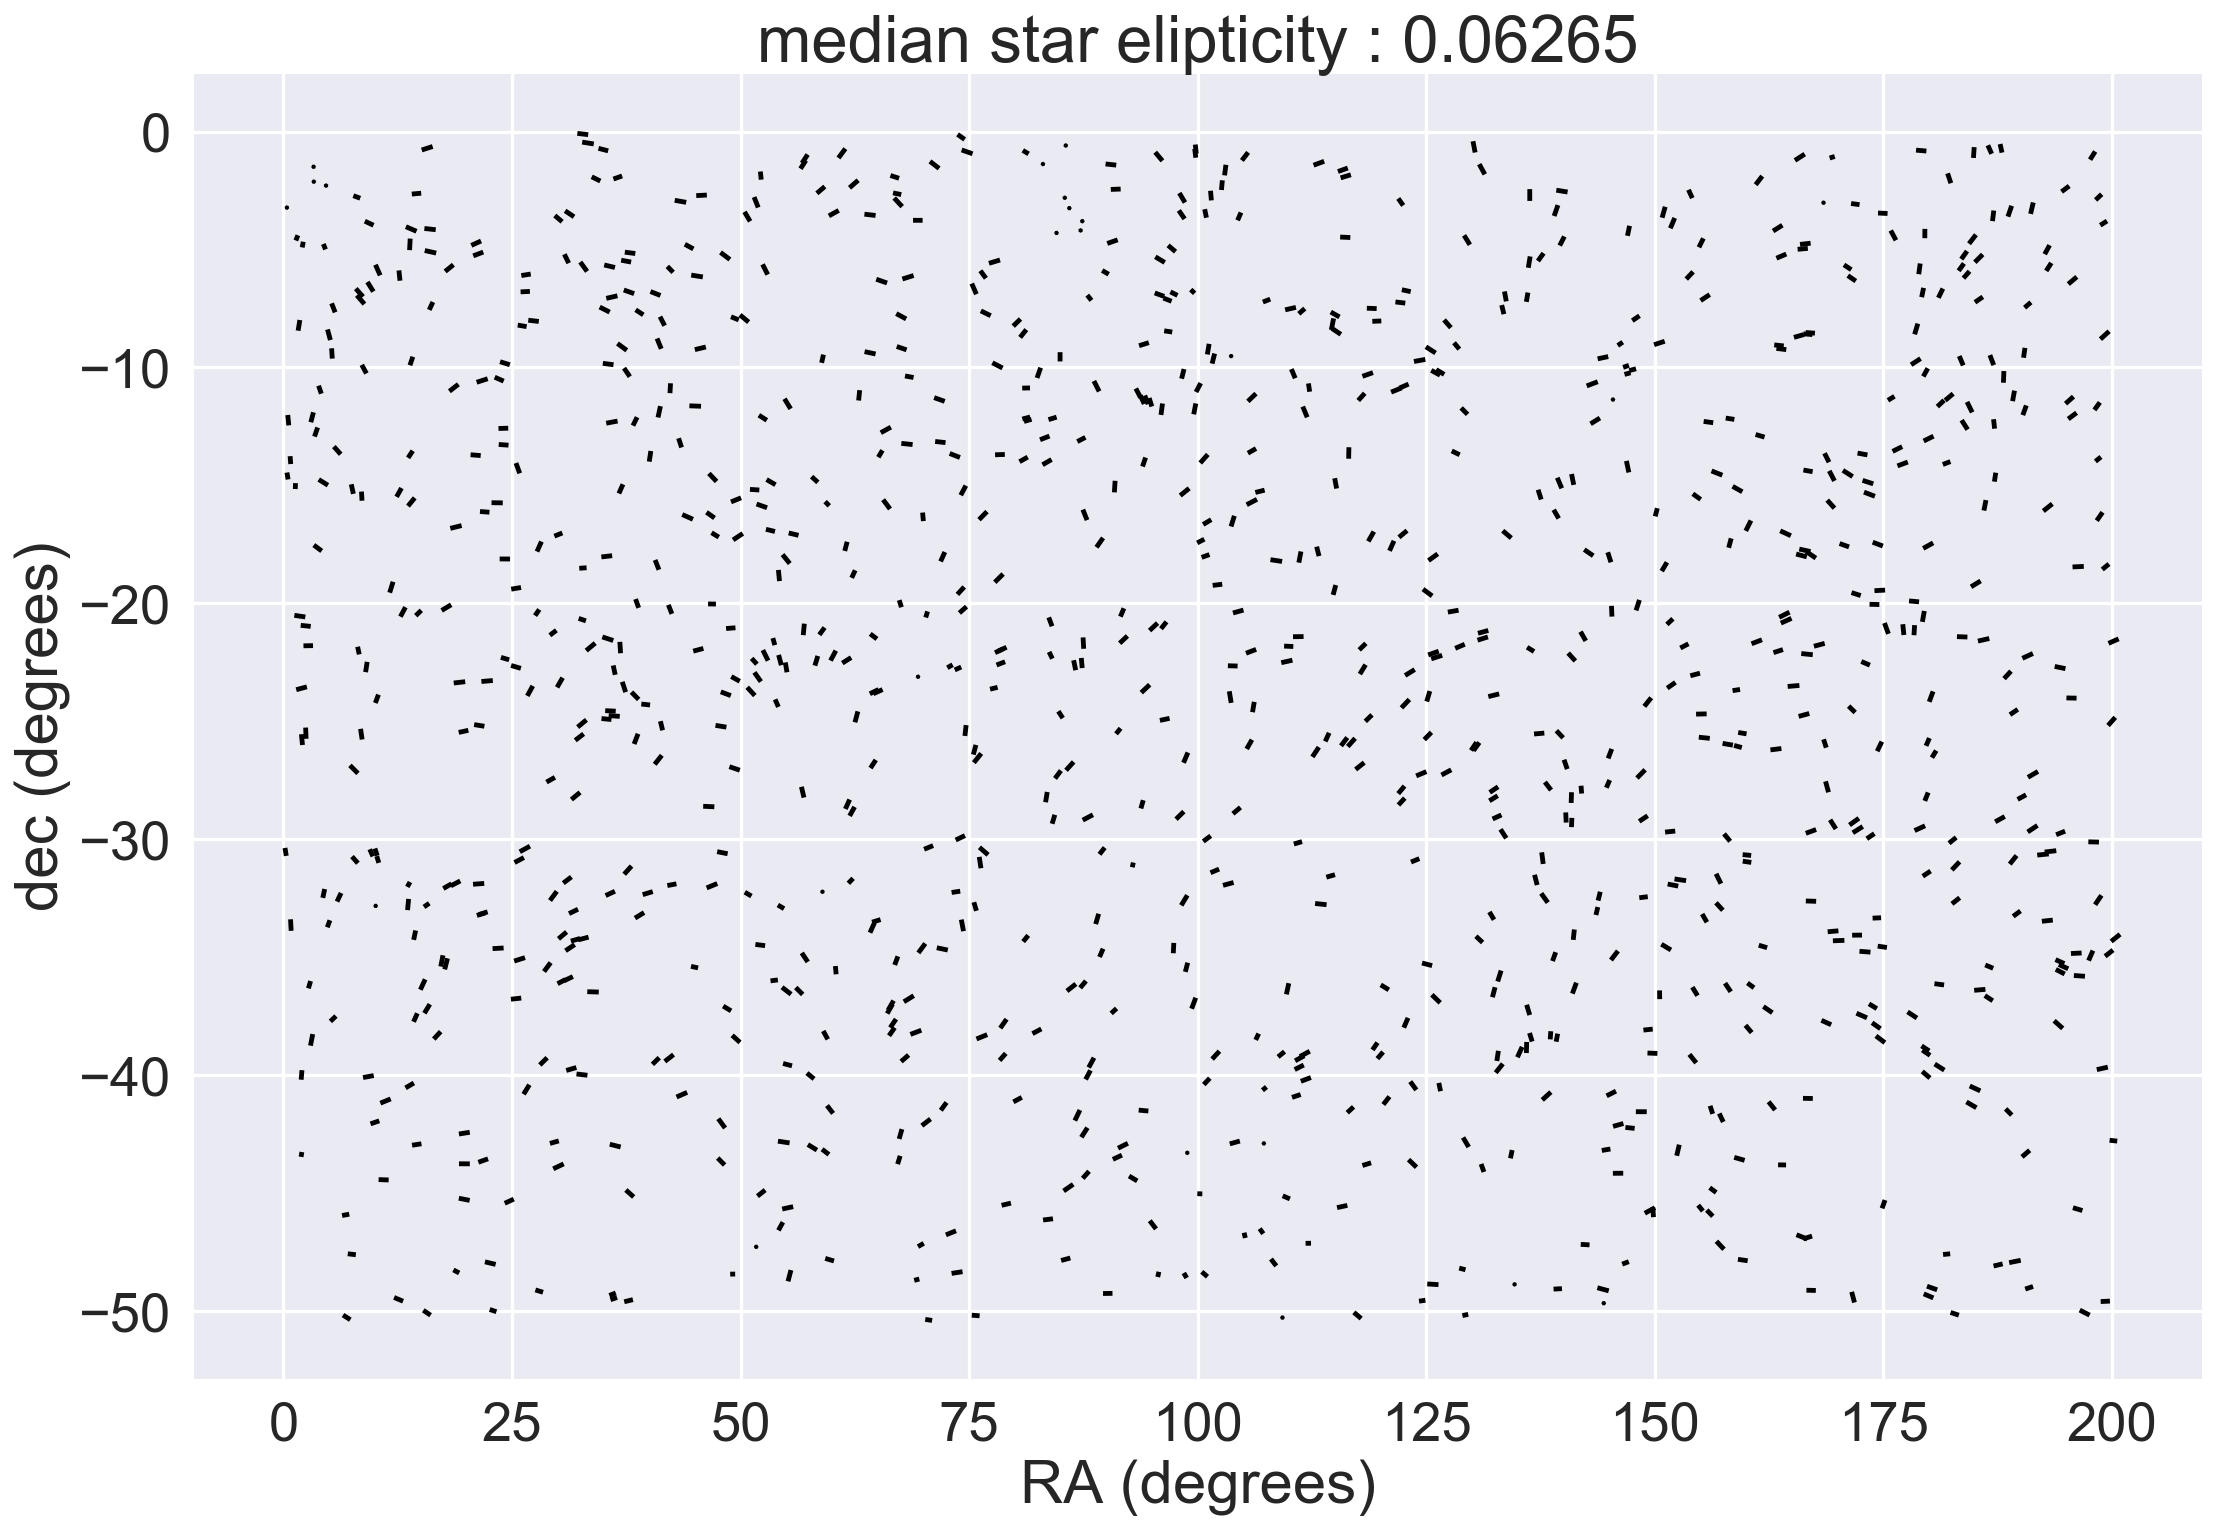

In [37]:
ditherplot(worst_case.STAR, statistic='median',scale=8)

## Residuals whisker plot at 1st exposures

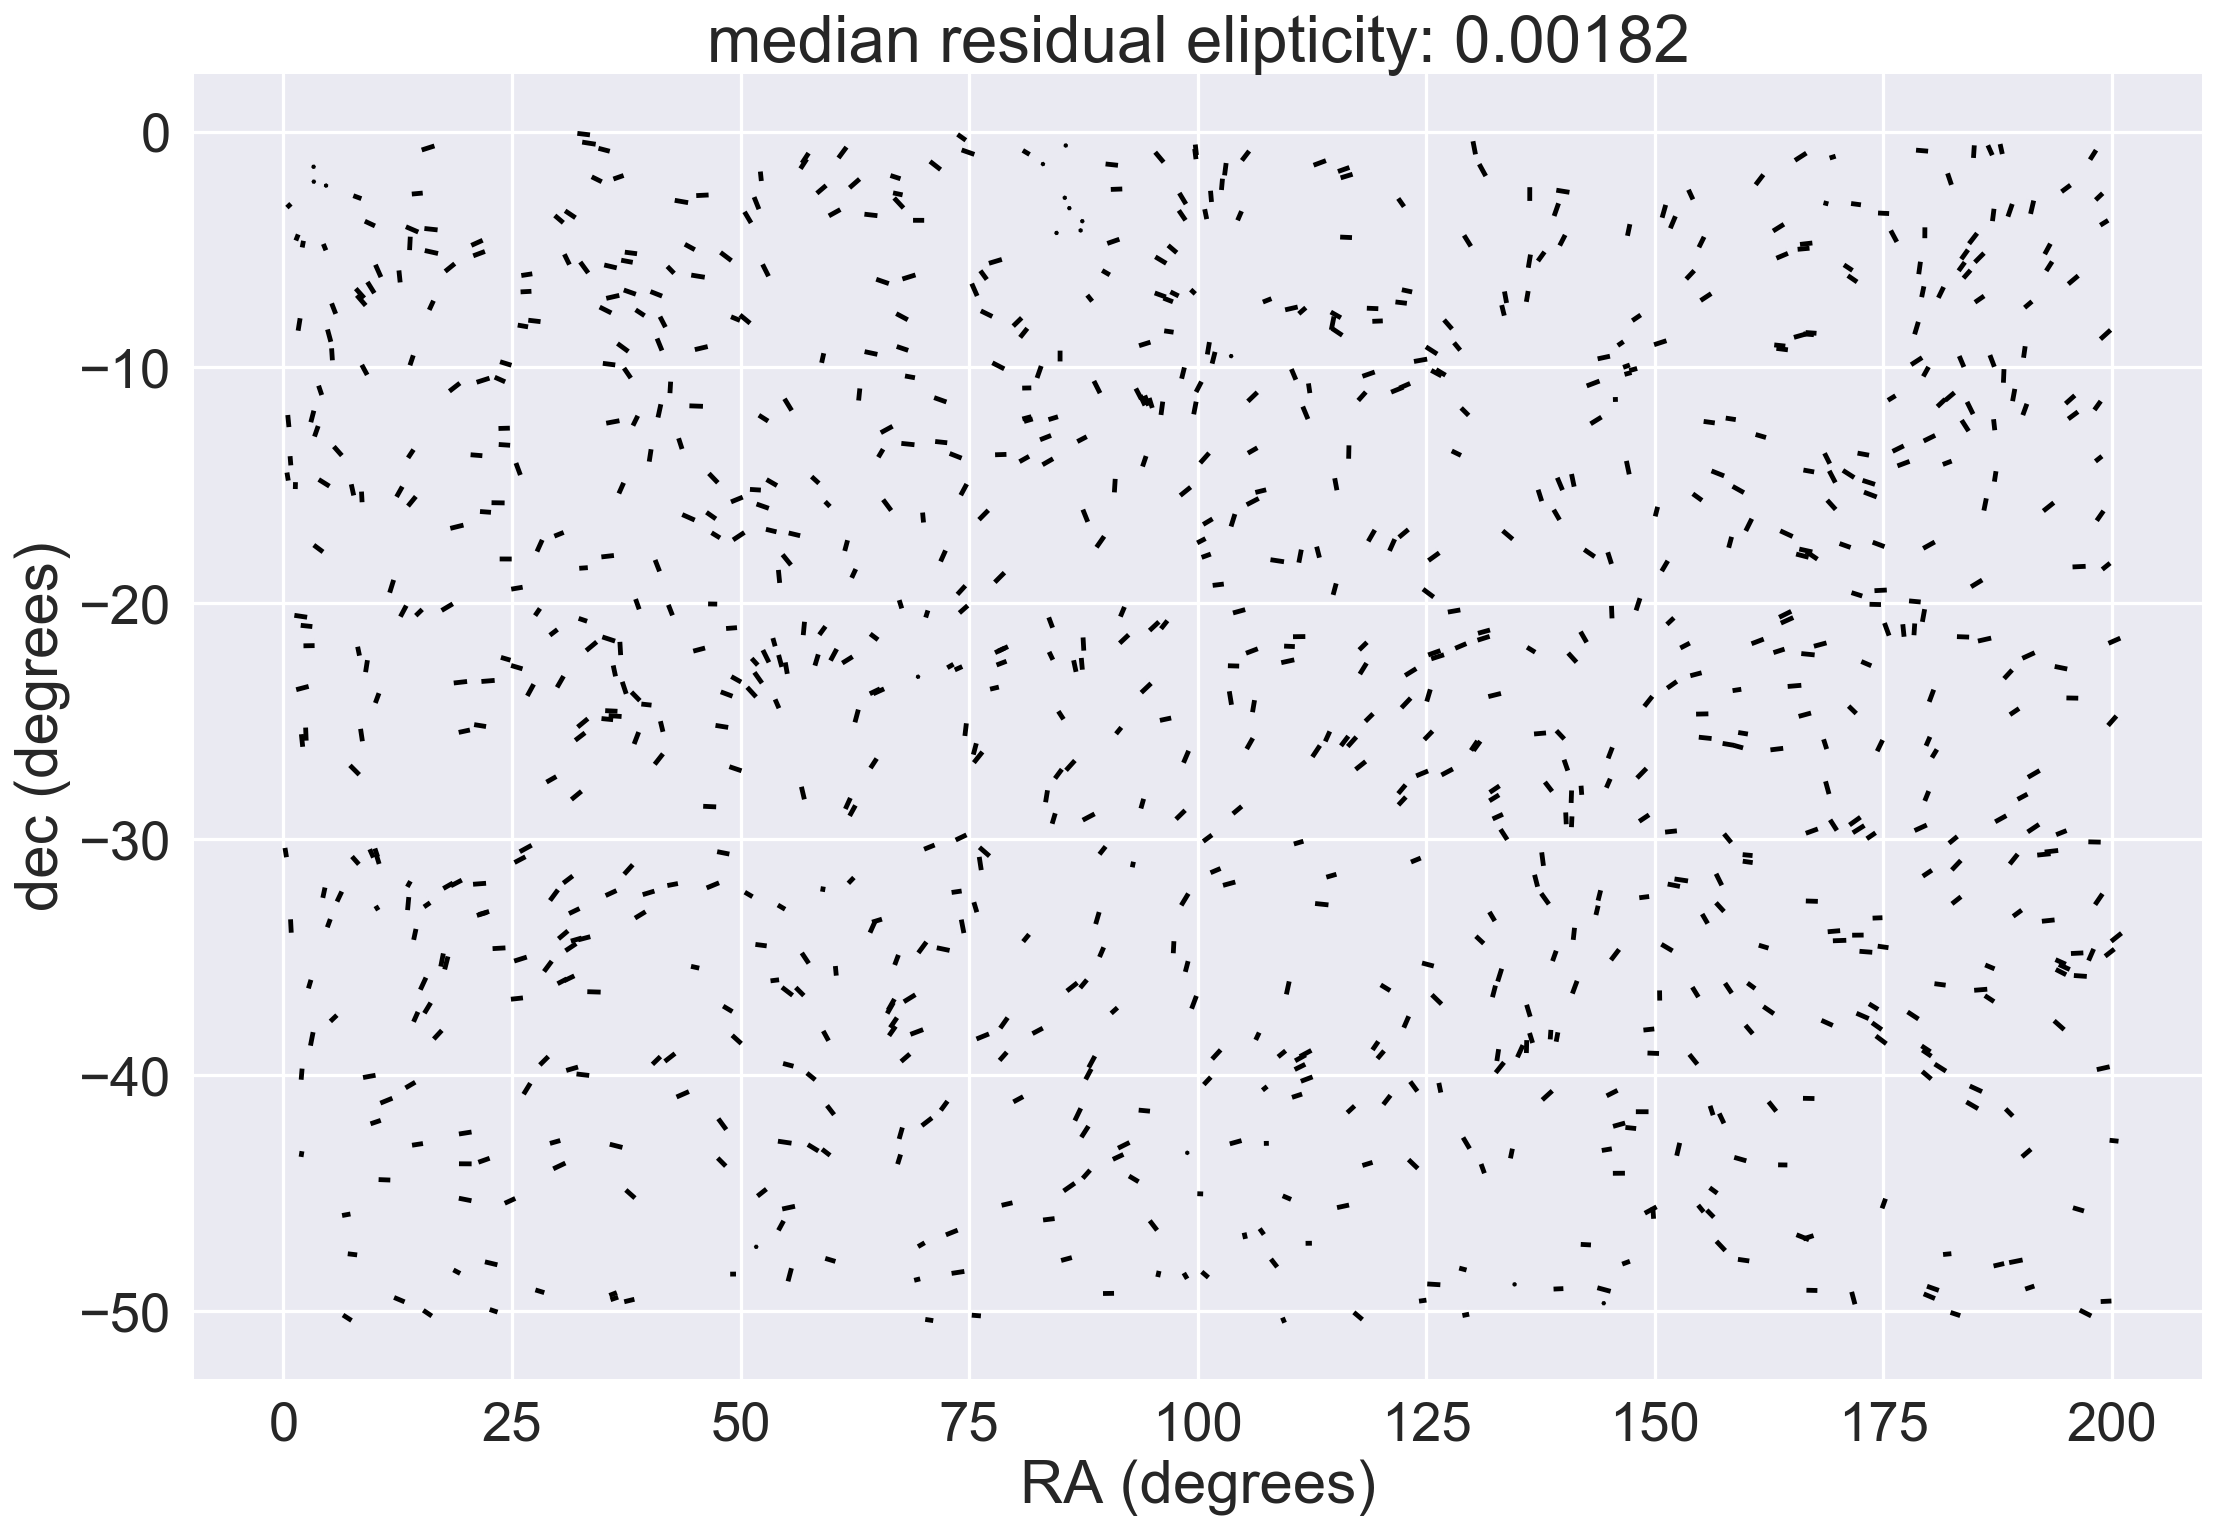

In [38]:
ditherplot(worst_case.DELTA, statistic='median',scale=0.2)

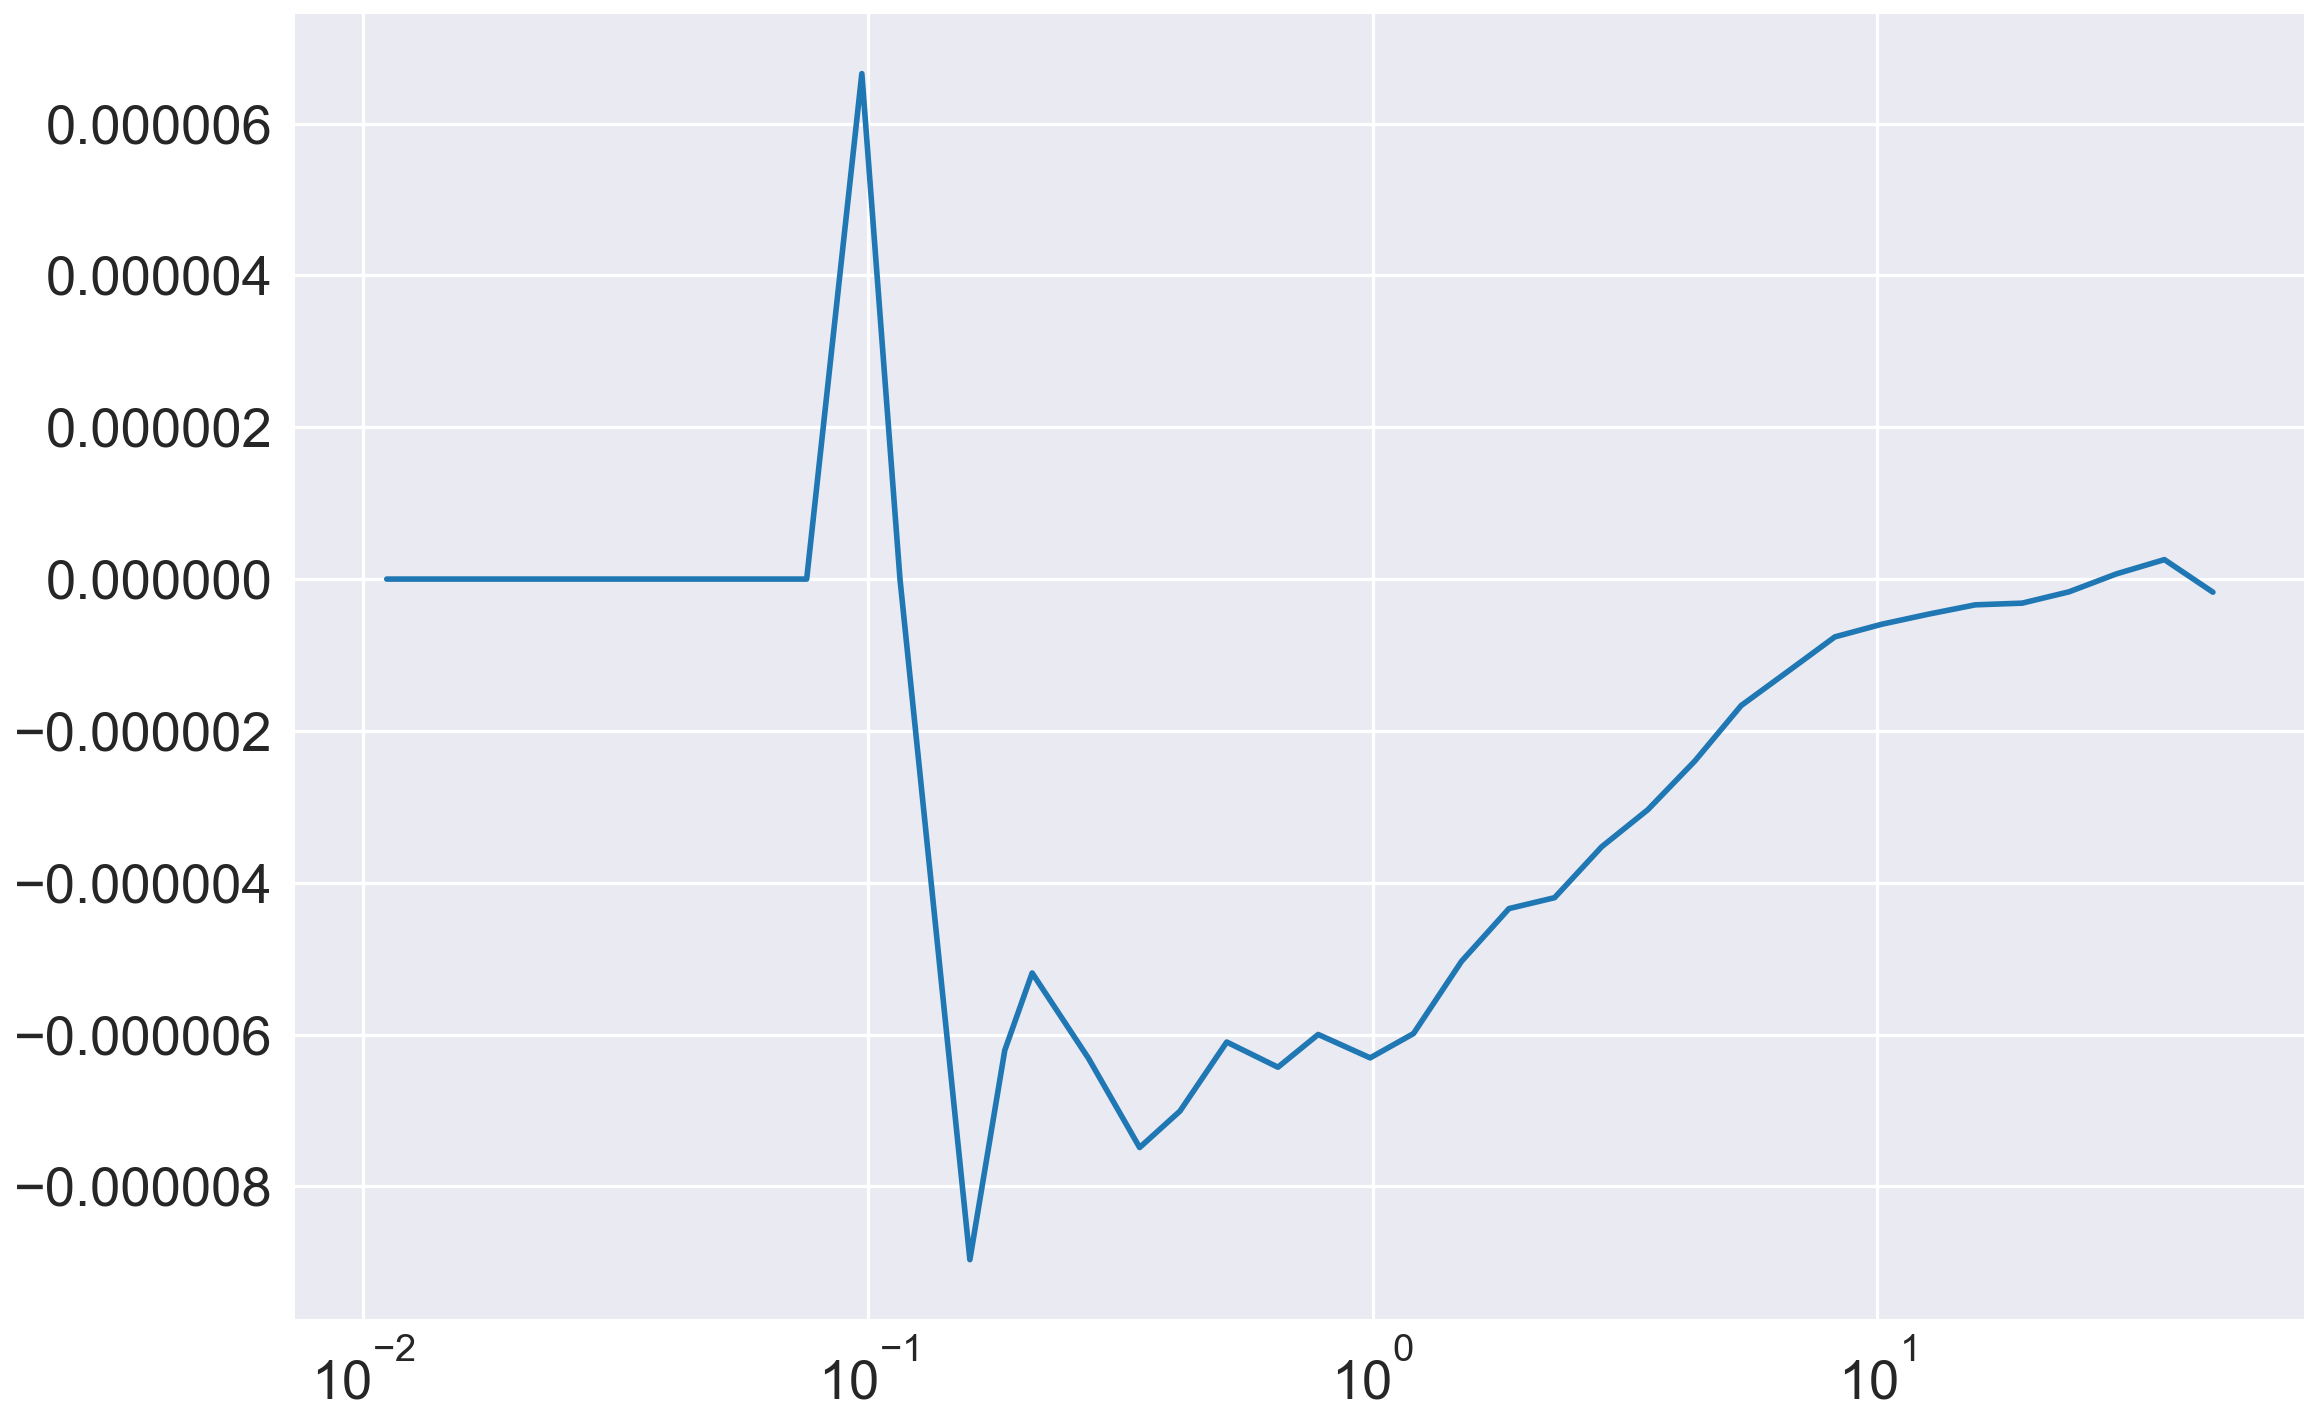

In [39]:
plt.plot(worst_case.r, worst_case.delta_xip)
plt.xscale('log')

AttributeError: ModelErrors instance has no attribute 'delta_reqs'

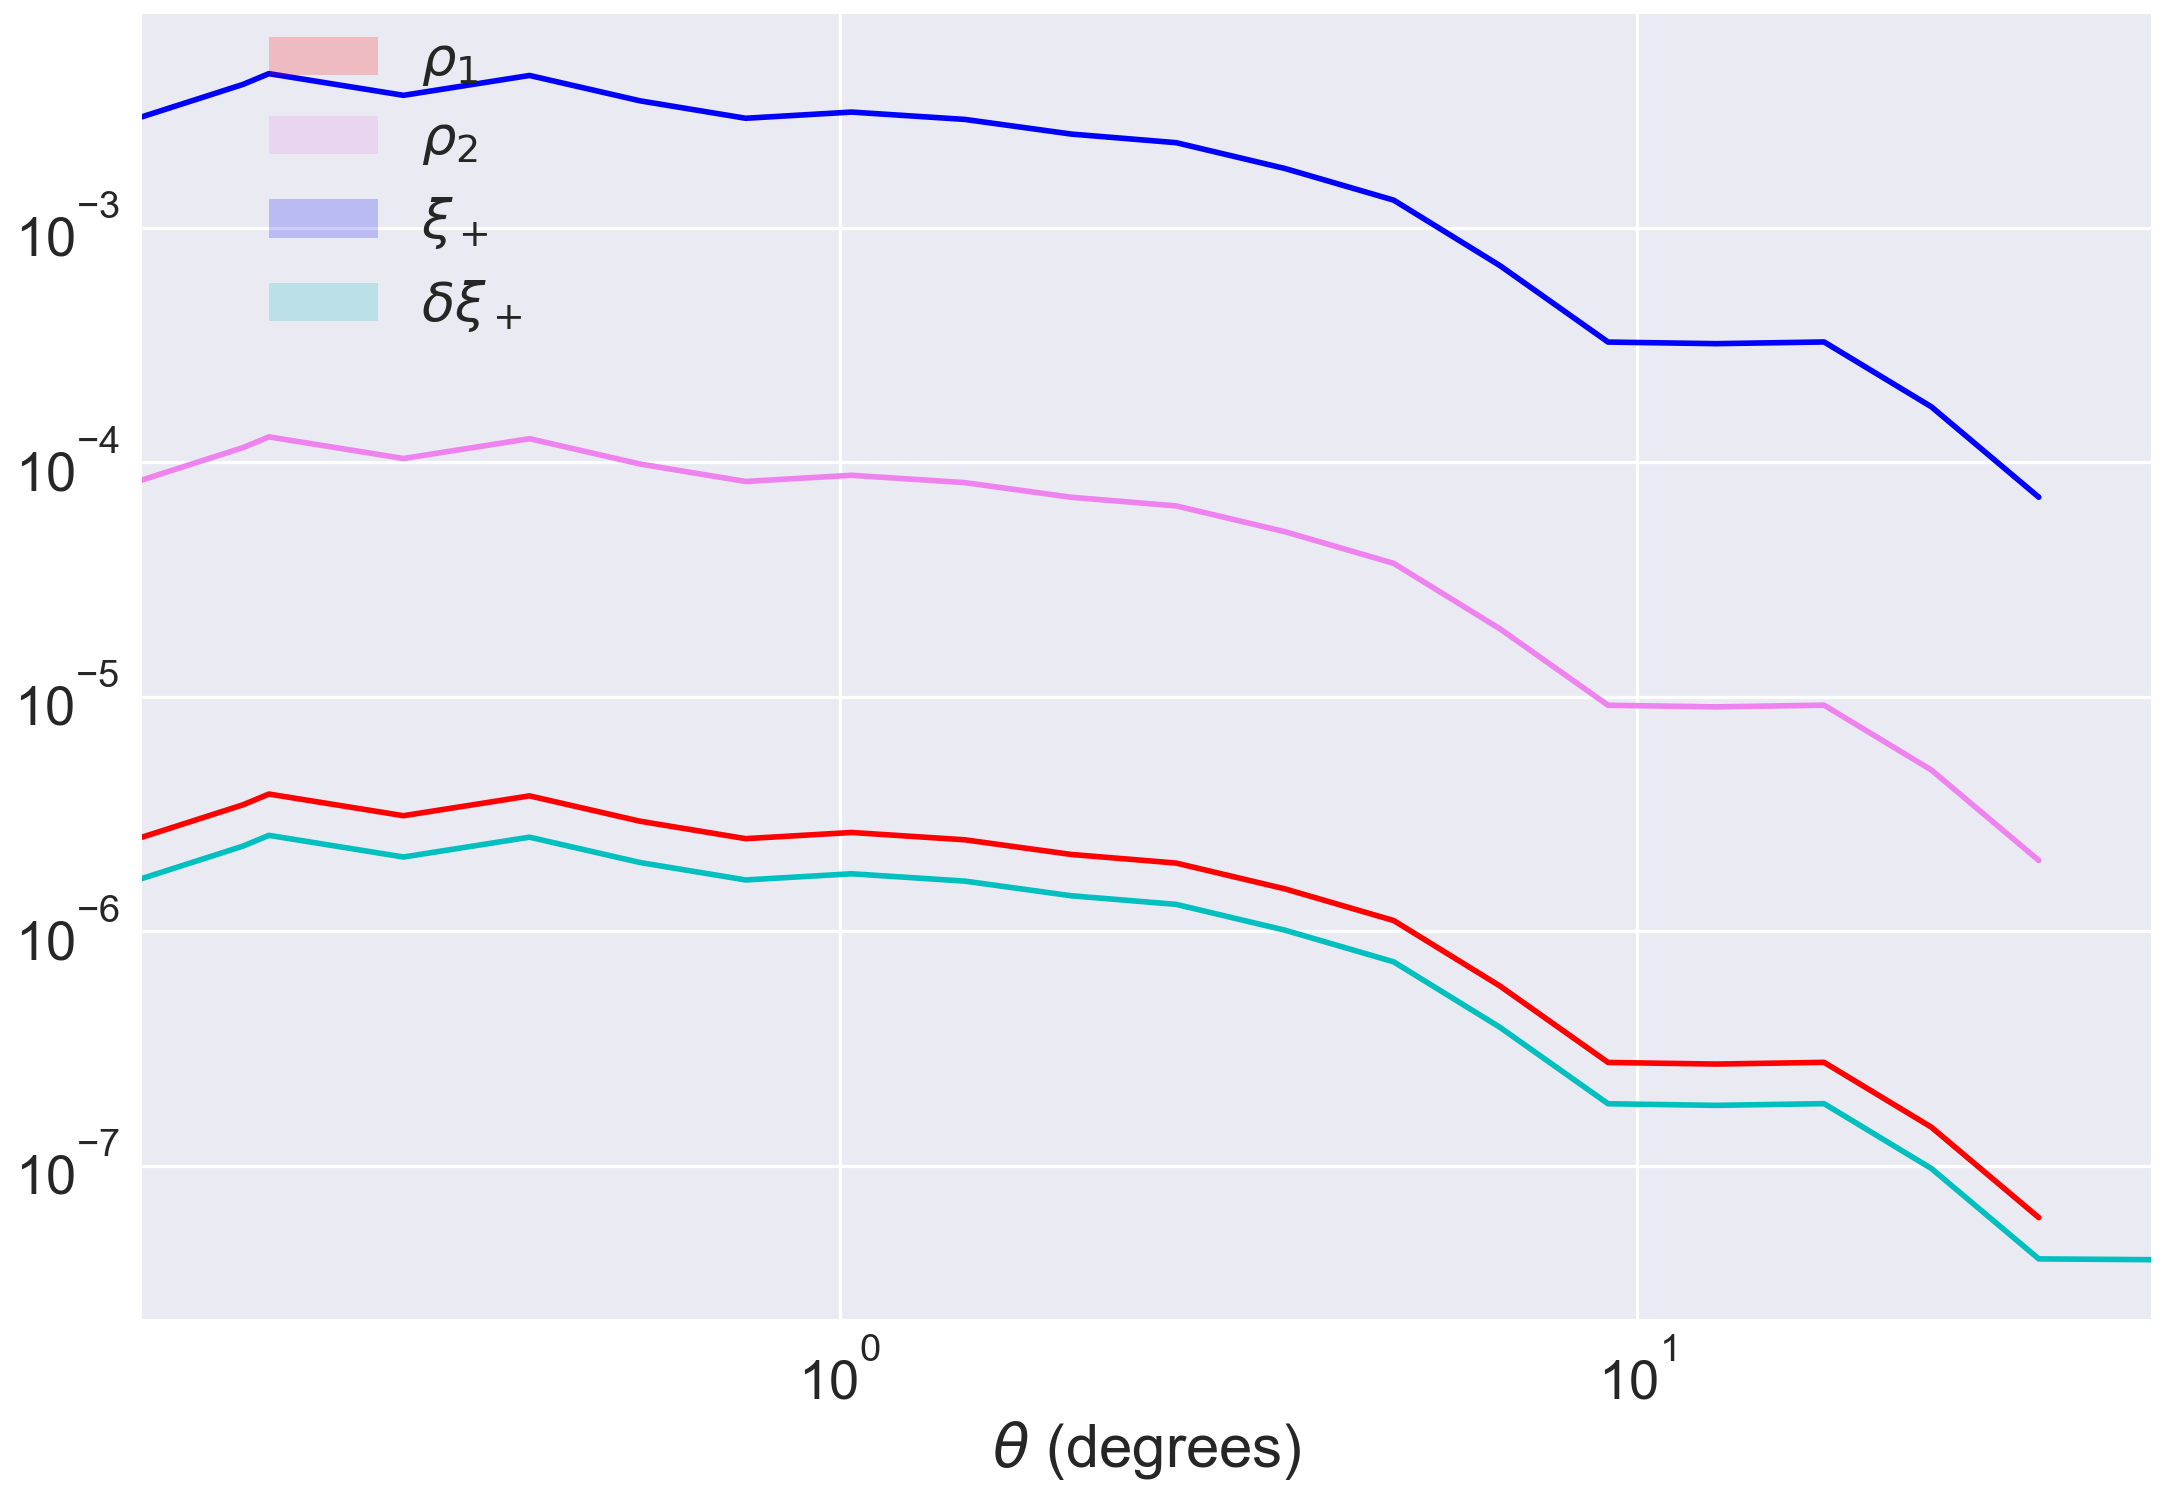

In [50]:
sns.set_style('darkgrid')
corrplot(worst_case.r, worst_case.rho1, color='r',scale='log')
corrplot(worst_case.r, worst_case.rho2, color='violet',scale='log')
corrplot(worst_case.r, worst_case.xip, color='b',scale='log')
corrplot(worst_case.r, abs(worst_case.delta_xip), color='c',scale='log')
plt.legend([r'$\rho_1$',r'$\rho_2$',r'$\xi_+$',r'$\delta \xi_+$'],bbox_to_anchor=(0.2, 1), loc='upper right', borderaxespad=0.)
corrplot(r2d(1)*worst_case.reqs_r, abs(worst_case.delta_reqs), color='black',scale='log')
plt.xlim((0.0001,50))



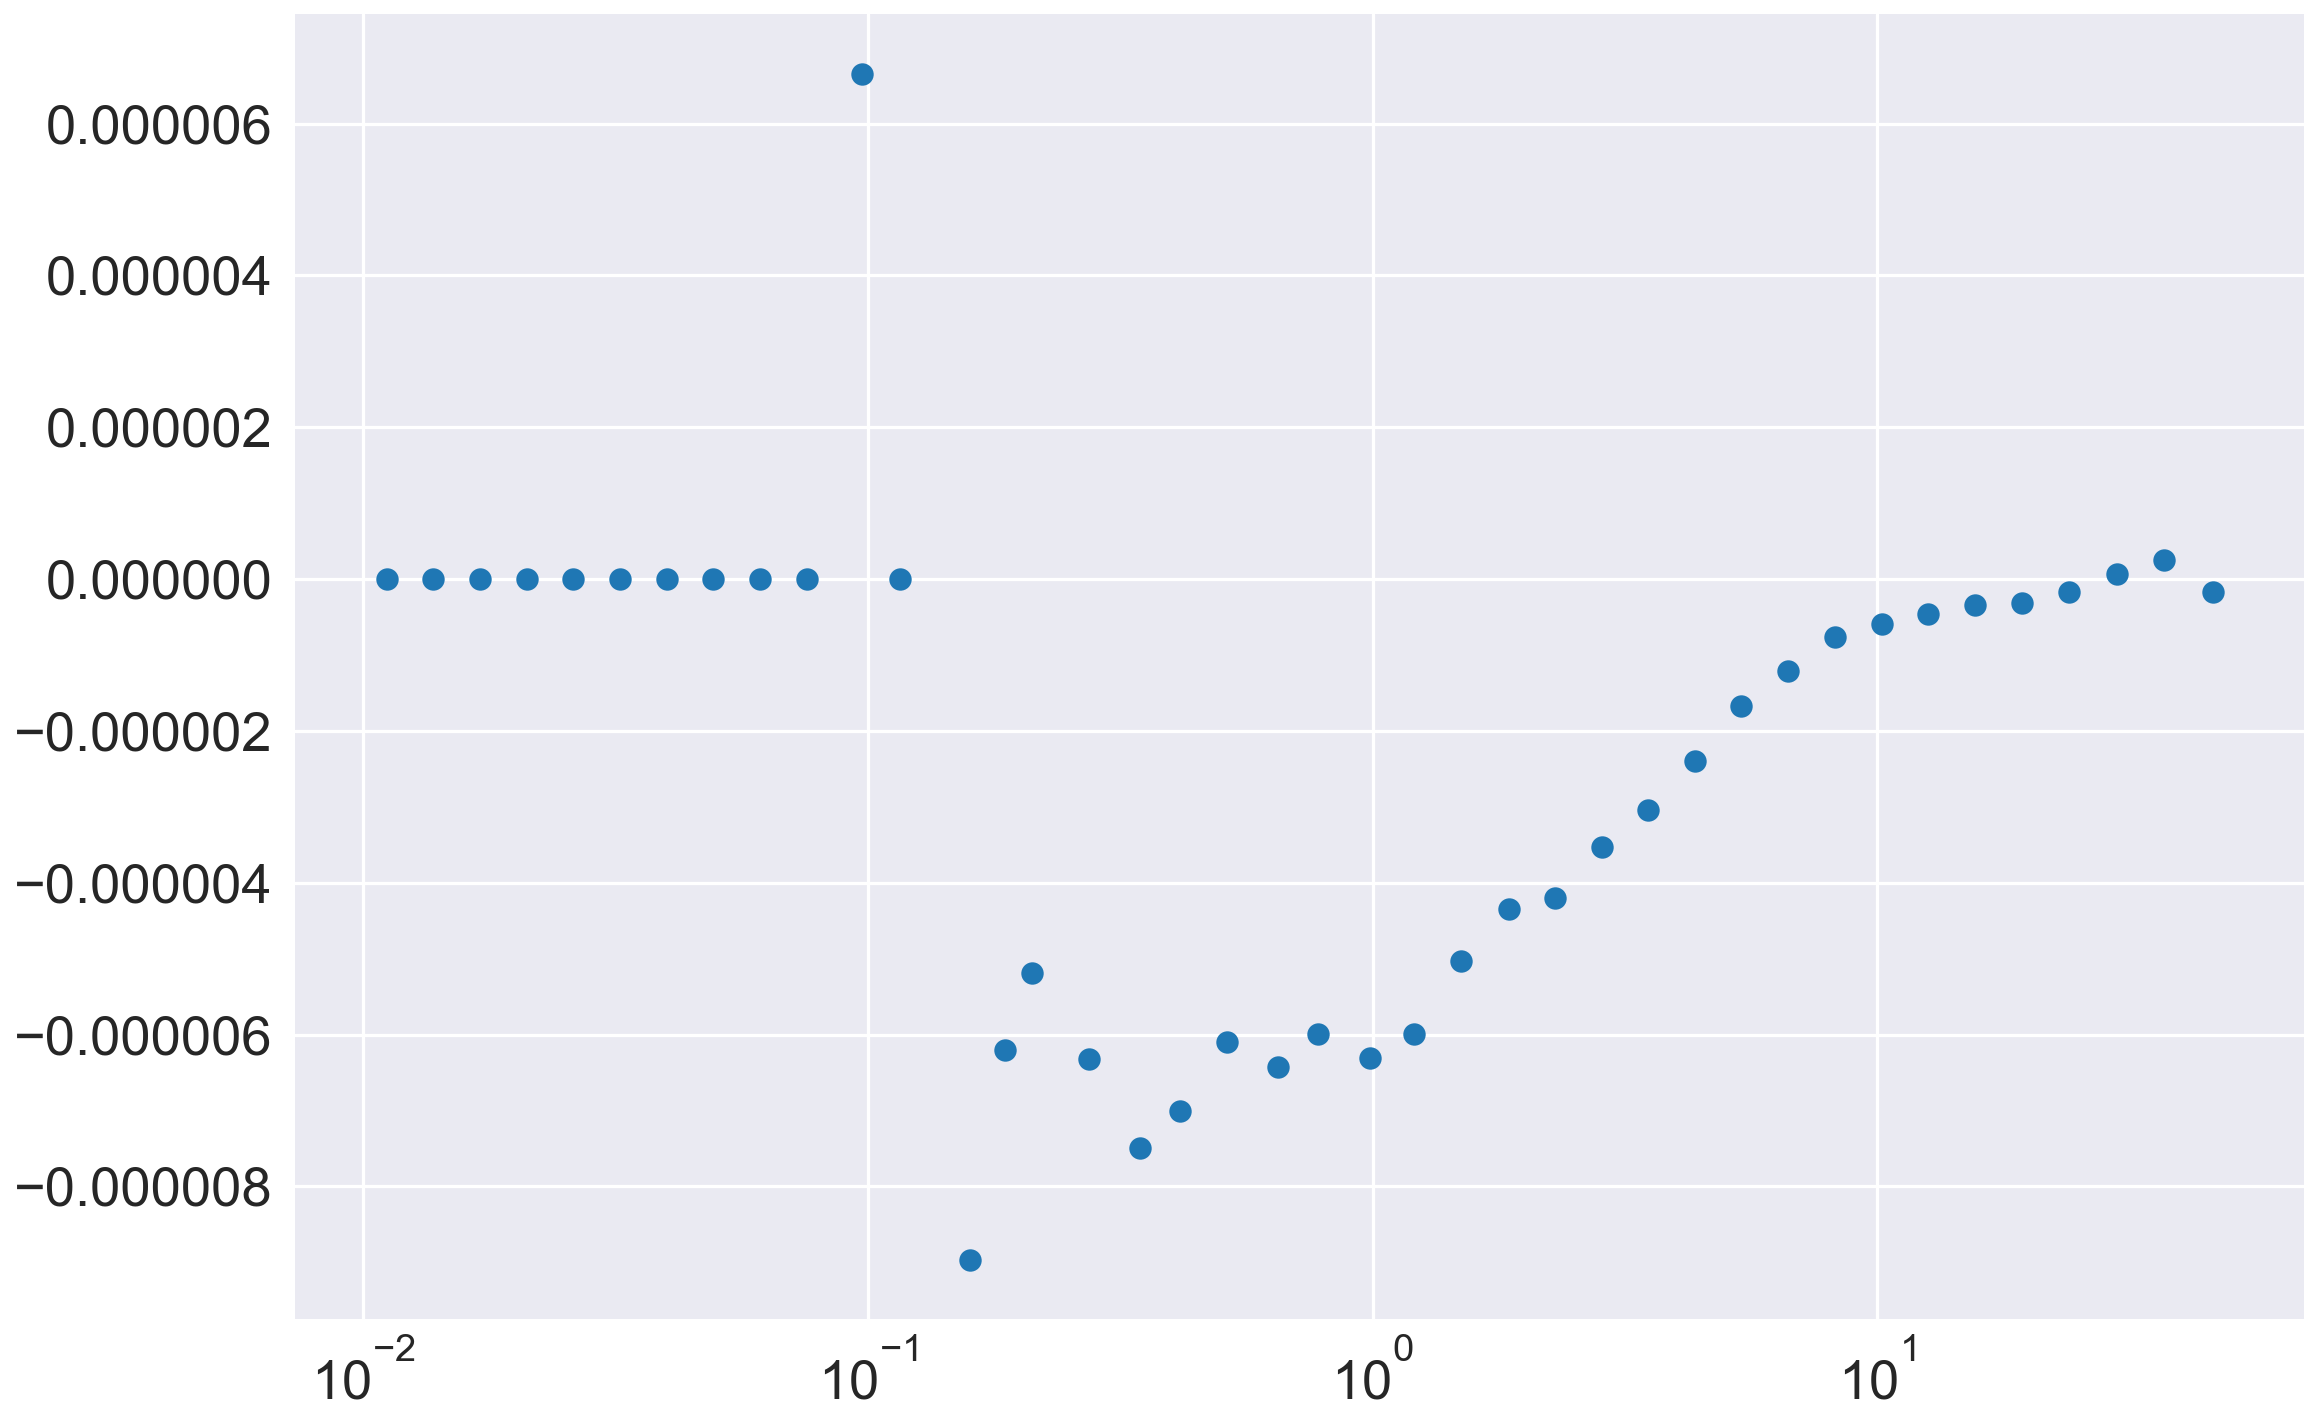

In [44]:
delta_xip = worst_case.delta_xip

plt.plot(worst_case.r,delta_xip,'o')
plt.xscale('log')
# plt.yscale('symlog')
# plt.yscale('log')

## Comparison between all $\rho_1$ & $\xi_+$ for all instances.

AttributeError: ModelErrors instance has no attribute 'delta_reqs'

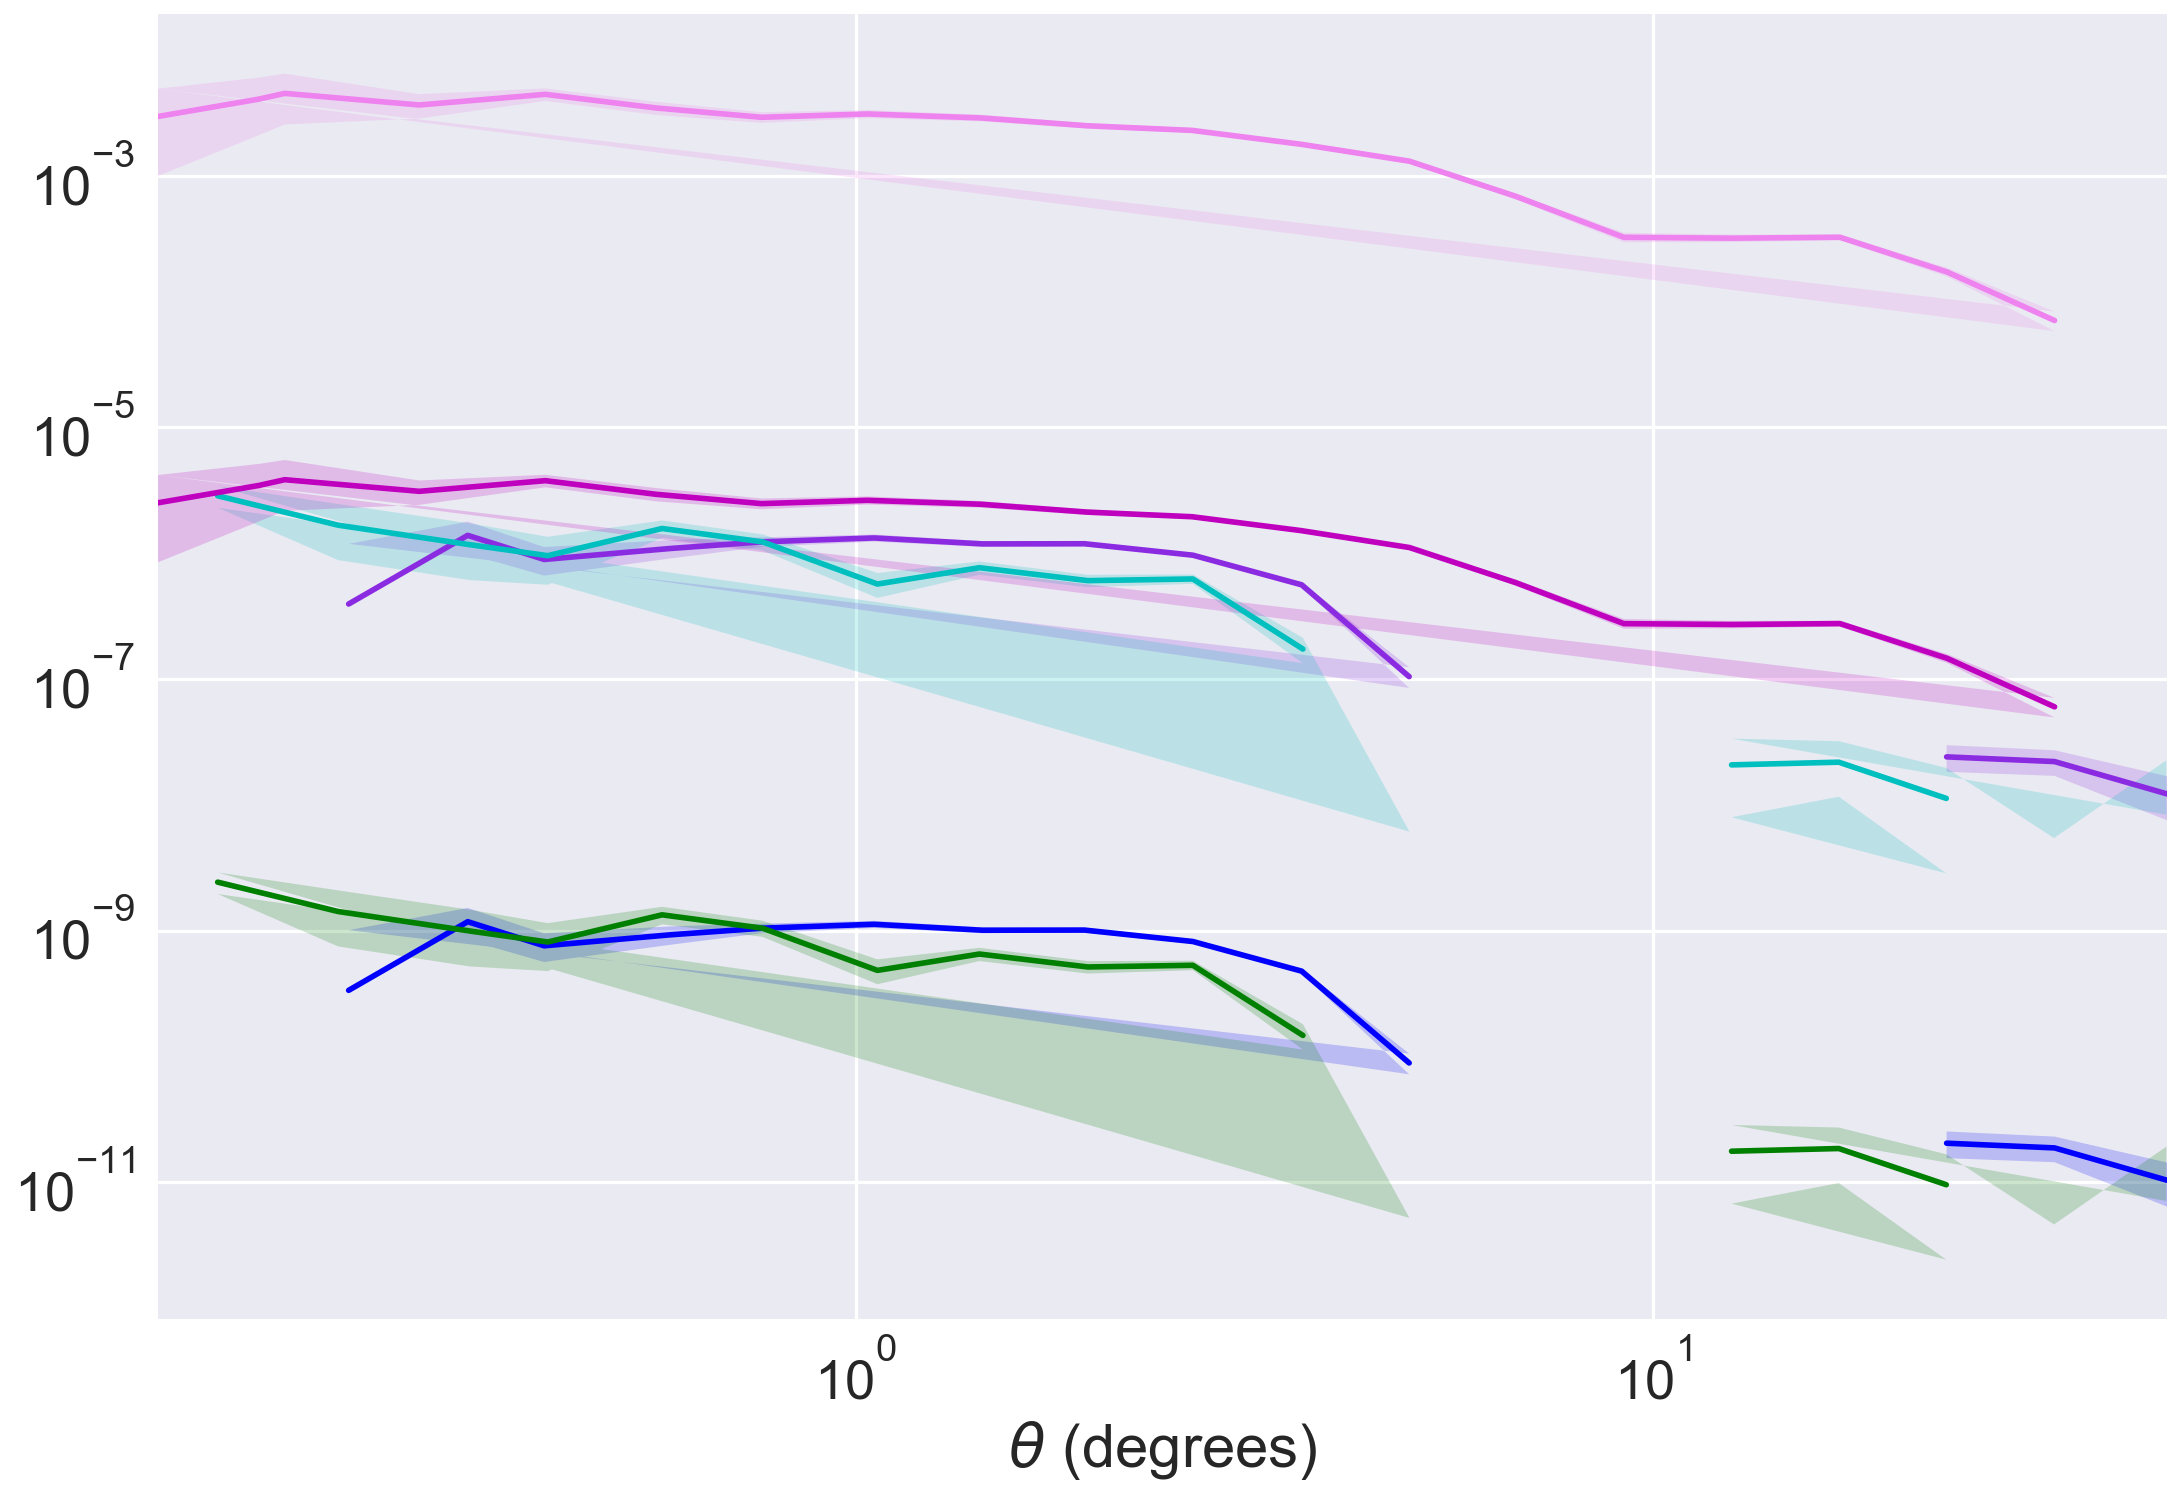

In [51]:
rho1 = best_case.rho1
sigma = best_case.rho1_sigma
r = best_case.r

def _plot_std_bars(std=None, central_data=None, ci=None, data=None,*args, **kwargs):
    std = sigma
    ci = np.asarray((central_data - std, central_data + std))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)
seaborn.timeseries._plot_std_bars = _plot_std_bars

sns.tsplot(rho1,r,err_style='std_bars',color='b')
plt.xlabel(r'$\theta$ (degrees)')
# plt.ylabel(r'$\_1$')
plt.xscale('log')
plt.yscale('log')
#plt.yscale('symlog')
#plt.ylim(-1E-5, 1.5E-5)
#plt.legend([r'$\xi_+$',r'$\xi_-$'],bbox_to_anchor=(0.98, 1), loc='upper right', borderaxespad=0.)

xip = best_case.xip
sigma = best_case.xip_sigma

def _plot_std_bars(std=None, central_data=None, ci=None, data=None,*args, **kwargs):
    std = sigma
    ci = np.asarray((central_data - std, central_data + std))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)
seaborn.timeseries._plot_std_bars = _plot_std_bars
sns.tsplot(xip,r,err_style='std_bars',color='blueviolet')

rho1 = y1.rho1
sigma = y1.rho1_sigma
r = y1.r

def _plot_std_bars(std=None, central_data=None, ci=None, data=None,*args, **kwargs):
    std = sigma
    ci = np.asarray((central_data - std, central_data + std))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)
seaborn.timeseries._plot_std_bars = _plot_std_bars

sns.tsplot(rho1,r,err_style='std_bars',color='g')

xip = y1.xip
sigma = y1.xip_sigma

def _plot_std_bars(std=None, central_data=None, ci=None, data=None,*args, **kwargs):
    std = sigma
    ci = np.asarray((central_data - std, central_data + std))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)
seaborn.timeseries._plot_std_bars = _plot_std_bars
sns.tsplot(xip,r,err_style='std_bars',color='c')

rho1 = worst_case.rho1
sigma = worst_case.rho1_sigma
r = worst_case.r

def _plot_std_bars(std=None, central_data=None, ci=None, data=None,*args, **kwargs):
    std = sigma
    ci = np.asarray((central_data - std, central_data + std))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)
seaborn.timeseries._plot_std_bars = _plot_std_bars

sns.tsplot(rho1,r,err_style='std_bars',color='m')

xip = worst_case.xip
sigma = worst_case.xip_sigma

def _plot_std_bars(std=None, central_data=None, ci=None, data=None,*args, **kwargs):
    std = sigma
    ci = np.asarray((central_data - std, central_data + std))
    kwargs.update({"central_data": central_data, "ci": ci, "data": data})
    seaborn.timeseries._plot_ci_band(*args, **kwargs)
seaborn.timeseries._plot_std_bars = _plot_std_bars
sns.tsplot(xip,r,err_style='std_bars',color='violet')

corrplot(r2d(1)*worst_case.reqs_r, abs(worst_case.delta_reqs), color='c',scale='log')
plt.xlim((0.0001,50))
plt.legend([r'$\rho_1$  @y10',r'$\xi_+$ @y10',r'$\rho_1$  @y1',r'$\xi_+$ @y1',r'$\rho_1$  @1st exp',r'$\xi_+$ @1st exp'],bbox_to_anchor=(0.98, 1.01), loc='upper right', borderaxespad=0.)

### Different Dither Patterns

In [304]:
myBundles = {}
nside = 128
metric = metrics.CountMetric('expMJD')
slicer0 = slicers.HealpixSlicer(lonCol='fieldRA', latCol='fieldDec', nside=nside)  
sqlconstraint = 'filter="r"'
stackerList = [stackers.SpiralDitherFieldPerNightStacker(nCoils=7)]
slicer3 = slicers.HealpixSlicer(lonCol='spiralDitherFieldPerNightRa', latCol='spiralDitherFieldPerNightDec', nside=nside)
myBundles['spiral dither'] = metricBundles.MetricBundle(metric, slicer3, sqlconstraint, 
                                                       stackerList=stackerList, runName=runName,
                                                       metadata='spiral dither')

opsdb = db.OpsimDatabase('/Users/myhome/Downloads/minion_1016_sqlite.db')
outDir = 'dither_test'
resultsDb = db.ResultsDb(outDir=outDir)
bgroup = metricBundles.MetricBundleGroup(myBundles, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r"
Found 538713 visits
Running:  ['spiral dither']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [465]:
minion_dithers = best_case.positions

In [483]:
bgroup.getData(constraint='filter = "r"')

Querying database with constraint filter = "r"
Found 538713 visits


In [495]:
metricbun = bgroup.bundleDict.items()[0][1]

In [497]:
metricbun.read?

- [x] Take out the deep drilling places → just use minion_1012
- [x] start using propagated error
- [ ] horizontal dithers
- [x] Add something to the last plot -- expectation lines from DES etc

In [225]:
dic = (None)

In [230]:
dic = np.array([None])

In [232]:
print dic.all()

None


In [271]:
np.radians(50)

0.87266462599716477

In [280]:
from scipy import stats

In [318]:
[pvalue for stats.kstest(np.random.randn(1000),'uniform',N=1000).pvalue in range(1000)]

AttributeError: can't set attribute

In [301]:
stats.kstest('uniform','uniform',N=1000).pvalue

0.29053783239469078

In [331]:
pvalues = []
for i in range(1000):
    pvalues.append(stats.kstest(np.random.uniform(size=100000),'uniform',N=100000).statistic)

(array([  61.,  245.,  325.,  169.,  107.,   61.,   22.,    9.,    0.,    1.]),
 array([ 0.00110965,  0.00169039,  0.00227113,  0.00285186,  0.0034326 ,
         0.00401333,  0.00459407,  0.00517481,  0.00575554,  0.00633628,
         0.00691701]),
 <a list of 10 Patch objects>)

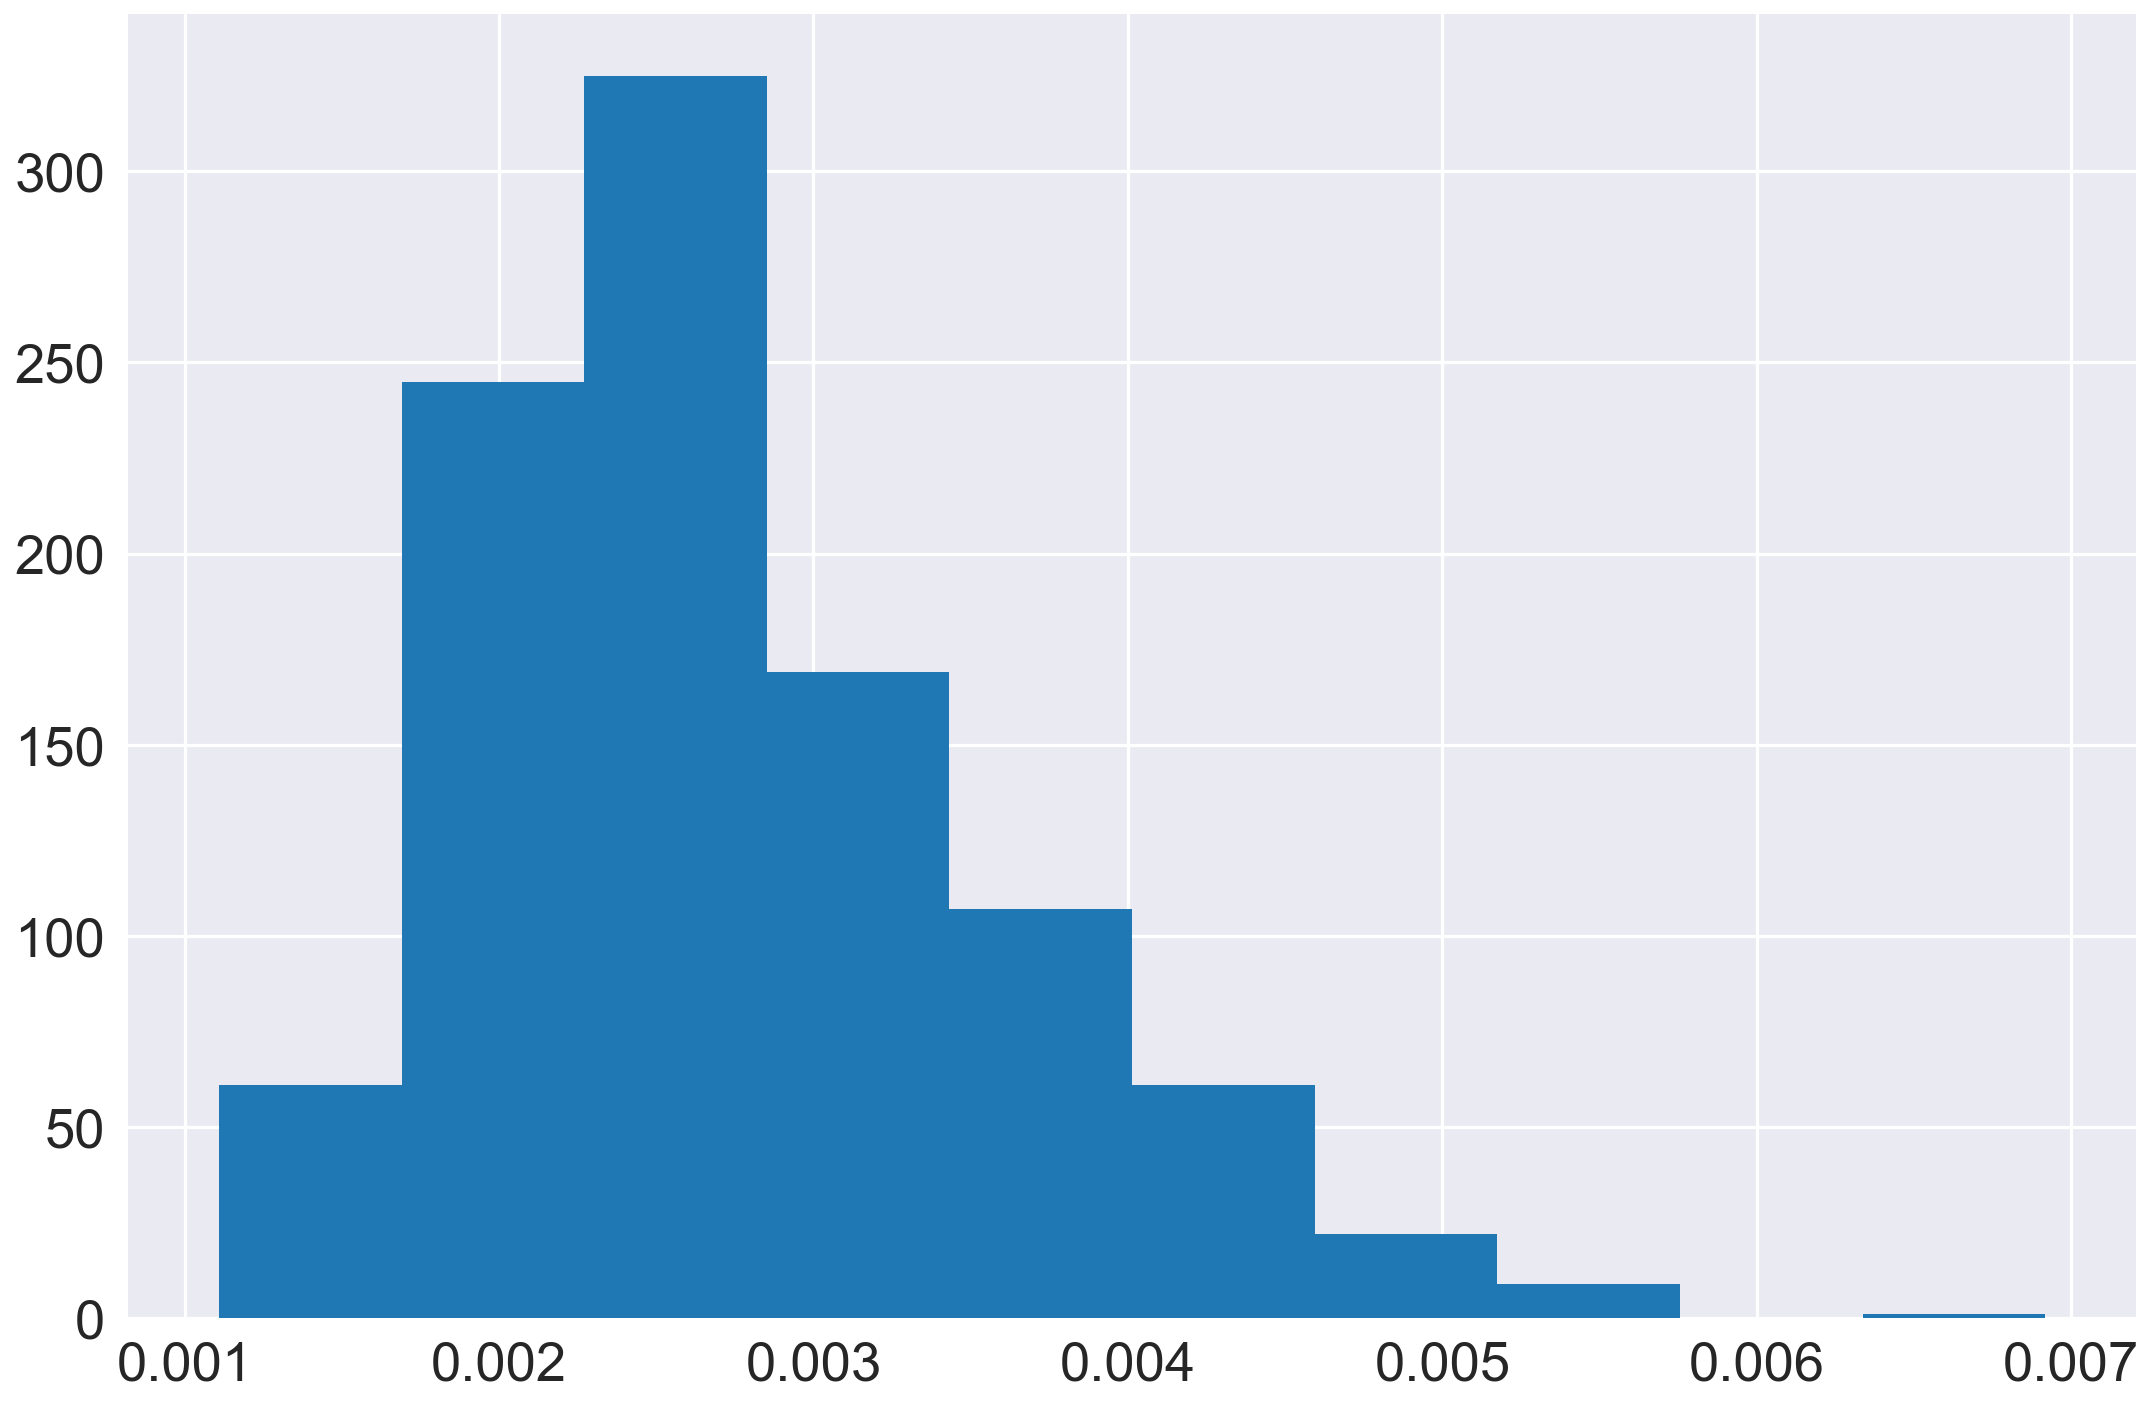

In [332]:
plt.hist(pvalues)